In [1]:
from EXPERIMENT_BIPARTITE import *
from _FigureJiazeHelper import *
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle
from scipy.sparse.linalg import eigs, eigsh
from scipy.linalg import eig
from _CommunityDetect import *
from spectralOperator import BetheHessian
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


In [2]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=16)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['lines.markersize'] = 12

%config InlineBackend.figure_format = 'retina'

$SNR_{AA}<1$ for sparse case ($d << n1$) 

Range of delta (-0.0125, 0.025)
pB of diagonal is 0.021666666666666667, off-diagonal is 0.0016666666666666661, SNR_AA=8.533333333333332e-05, SNR_A=25
150368
3150842.0


([], [])

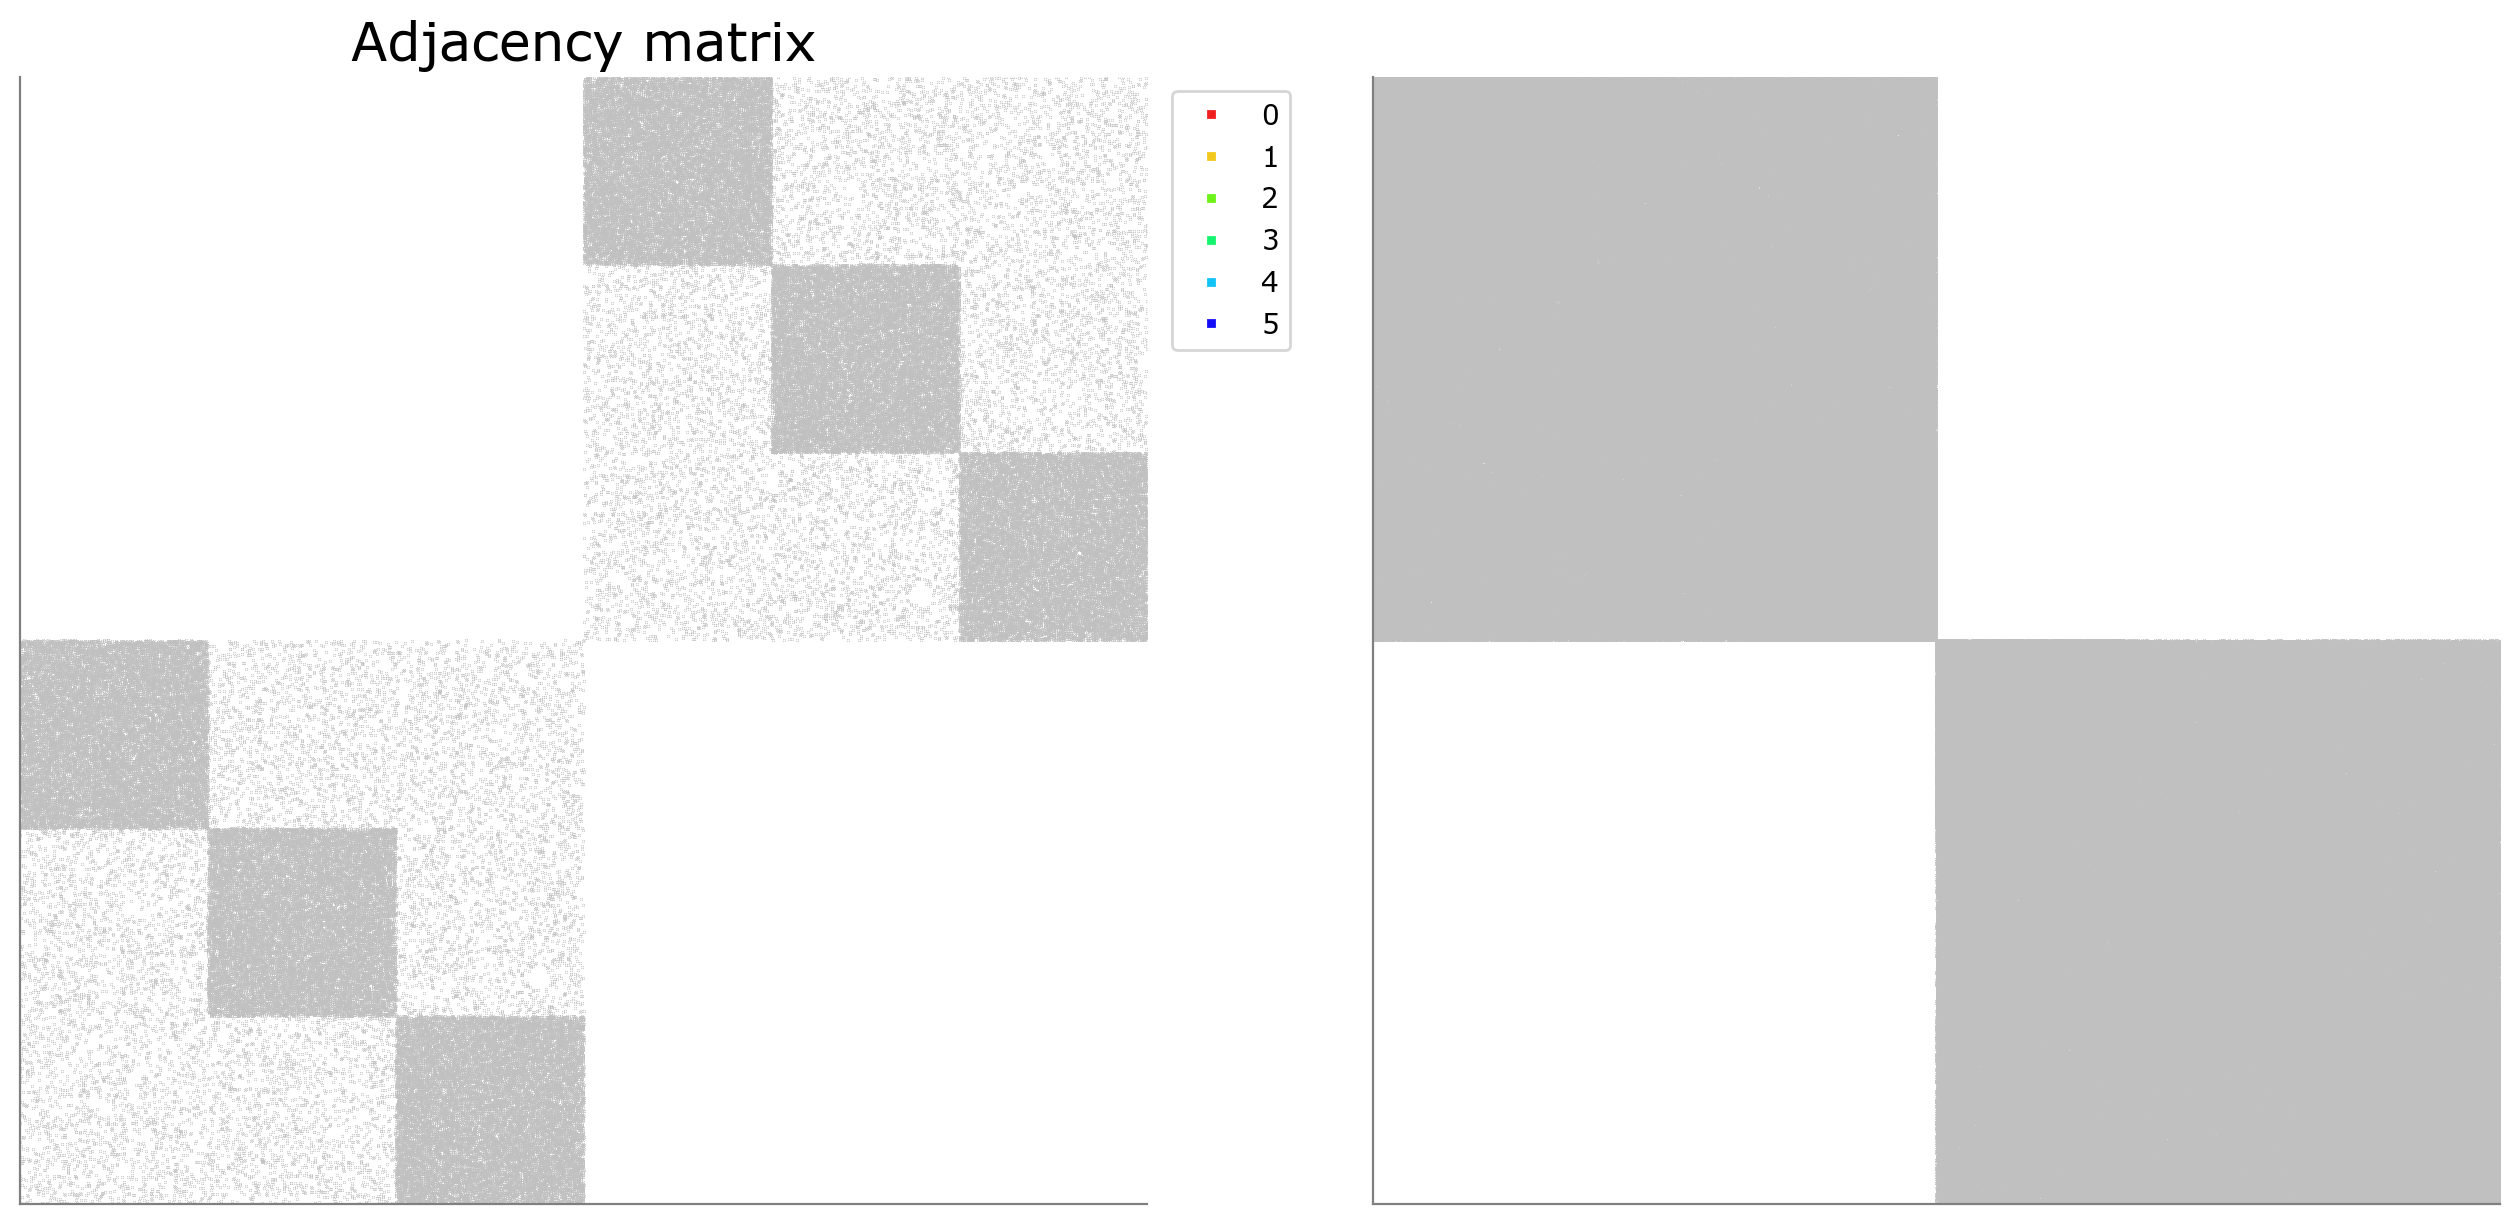

In [30]:
n1 = 3000
k1 = 3
d = 25
min_delta, max_delta = range_delta(n1, k1, d)
print(f'Range of delta ({min_delta}, {max_delta})')
delta = 0.02

pBo = d / n1 - delta / k1
pBd = pBo + delta

SNR_AA = 1/k1 * (pBd-pBo)**4 / (pBd+(k1-1)*pBo)**2
SNR_A = d
print(f'pB of diagonal is {pBd}, off-diagonal is {pBo}, SNR_AA={SNR_AA}, SNR_A={SNR_A}')

bsbm = symmetric_bipartite(n1, k1, pBd, pBo)
A = bsbm.A
AA = bsbm.A.dot(bsbm.A)

fig = plt.figure(figsize=(16, 8))
widths = [4, 4]
heights = [4]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
print(A.sum())
color = gen_colors(start=colors_red[0], end=colors_blue[0], n=len(bsbm.sizes))
plot_block_matrix(A.toarray(), partition_names=list(range(len(bsbm.sizes))), partition_counts=bsbm.sizes, colors=color, ms=0.001)

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
color = gen_colors(start=colors_red[0], end=colors_blue[0], n=len(bsbm.sizes))
x, y = np.nonzero(AA.toarray())
plotAA = np.zeros(np.shape(AA))
for _x, _y in zip(x, y):
    plotAA[_x, _y] = 1
print(plotAA.sum())
plt.spy(plotAA, markersize=1e-7, rasterized=True, color=gray)
plt.xticks([])
plt.yticks([])
# plot_block_matrix(plotAA, partition_names=list(range(len(bsbm.sizes))), partition_counts=bsbm.sizes, colors=color, ms=0.01)

In [23]:
start = time.time()
cd = CommunityDetect(bsbm.A)
BHpartition, BHnumgroups = cd.BetheHessian()
Acm, _ = get_confusionmatrix(bsbm.groupId, BHpartition, k1 * 2, BHnumgroups)
ami = adjusted_mutual_info_score(bsbm.groupId, BHpartition)
print(f"BH result in A: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(Acm)}) is: \n{Acm}")

number of groups = 6, Kpos=3, Kneg=3
True index is [0 1 2 3 4 5], Community detected index is [5 4 3 2 0 1]
BH result in A: 1.0. Time=1.2366058826446533. Confusion Matrix((6, 6)) is: 
[[1000.    0.    0.    0.    0.    0.]
 [   0. 1000.    0.    0.    0.    0.]
 [   0.    0. 1000.    0.    0.    0.]
 [   0.    0.    0. 1000.    0.    0.]
 [   0.    0.    0.    0. 1000.    0.]
 [   0.    0.    0.    0.    0. 1000.]]


In [24]:
start = time.time()
AA = bsbm.A.dot(bsbm.A)
cd = CommunityDetect(AA)
WBHpartition, WBHnumgroups = cd.BetheHessian(weighted=True)
AAcm, _ = get_confusionmatrix(bsbm.groupId, WBHpartition, k1 * 2, WBHnumgroups)
ami = adjusted_mutual_info_score(bsbm.groupId, WBHpartition)
print(f"Weighted BH in AA result: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(AAcm)}) is: \n{AAcm}")

r=25.43144379175774, Weighted BH build.
r=-25.43144379175774, Weighted BH build.
Try first 100 eigenvalue...
Try first 1000 eigenvalue...
Try first 5999 eigenvalue...
number of groups = 5102, Kpos=5102, Kneg=0
True index is [0 1 2 3 4 5], Community detected index is [1111   17  244  148   89  734]
Weighted BH in AA result: 0.030803368781926316. Time=3133.881715297699. Confusion Matrix((6, 5102)) is: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [32]:
start = time.time()
AA = bsbm.A.dot(bsbm.A)
cd = CommunityDetect(AA)
WBHpartition, WBHnumgroups = cd.BetheHessian(num_groups=6, weighted=True)
AAcm, _ = get_confusionmatrix(bsbm.groupId, WBHpartition, k1 * 2, WBHnumgroups)
ami = adjusted_mutual_info_score(bsbm.groupId, WBHpartition)
print(f"Weighted BH in AA result: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(AAcm)}) is: \n{AAcm}")

r=25.53647717808129, Weighted BH build.
r=-25.53647717808129, Weighted BH build.
True index is [0 1 2 3 4 5], Community detected index is [2 3 5 1 4 0]
Weighted BH in AA result: 1.0. Time=50.53740739822388. Confusion Matrix((6, 6)) is: 
[[1000.    0.    0.    0.    0.    0.]
 [   0. 1000.    0.    0.    0.    0.]
 [   0.    0. 1000.    0.    0.    0.]
 [   0.    0.    0. 1000.    0.    0.]
 [   0.    0.    0.    0. 1000.    0.]
 [   0.    0.    0.    0.    0. 1000.]]


In [25]:
start = time.time()
cd = CommunityDetect(plotAA)
plotAABHpartition, plotAABHnumgroups = cd.BetheHessian()
plotAAcm, _ = get_confusionmatrix(bsbm.groupId, plotAABHpartition, k1 * 2, plotAABHnumgroups)
ami = adjusted_mutual_info_score(bsbm.groupId, plotAABHpartition)
print(f"BH result in plotAA: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(plotAAcm)}) is: \n{plotAAcm}")

Input matrix not in sparse format, transforming to sparse matrix
Input matrix not in sparse format, transforming to sparse matrix
Try first 100 eigenvalue...
Try first 1000 eigenvalue...
number of groups = 121, Kpos=121, Kneg=0
True index is [0 1 2 3 4 5], Community detected index is [ 77  11 103  79  19   2]
BH result in plotAA: 0.4695208200845614. Time=135.59043312072754. Confusion Matrix((6, 121)) is: 
[[ 0.  0. 59.  0. 45. 38.  0.  3.  1.  0.  2.  0.  0.  0.  0.  0. 48.  0.
   0.  0.  4.  0.  1.  2.  0.  0.  5.  0.  3. 25. 52.  0.  0. 45.  0.  0.
   0.  1.  1.  0.  1. 55.  0.  1. 52.  8.  0.  0.  1.  0.  0.  0.  0.  2.
   0. 54.  0.  1.  1.  2.  0.  0.  0.  0.  0. 25. 41. 39.  0. 43.  0.  0.
  53.  0.  0.  0.  0.  0.  0.  0.  0.  0. 23.  0. 40.  3.  2. 57. 55.  0.
   1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  2.
   0.  7.  1.  0.  5.  0.  0.  0.  3.  0. 47. 37.  0.]
 [ 0.  0.  1.  0.  0.  2.  0.  3.  1.  0. 43. 73.  0.  0.  0.  0.  1.  0.
   2.  1. 44.  0. 

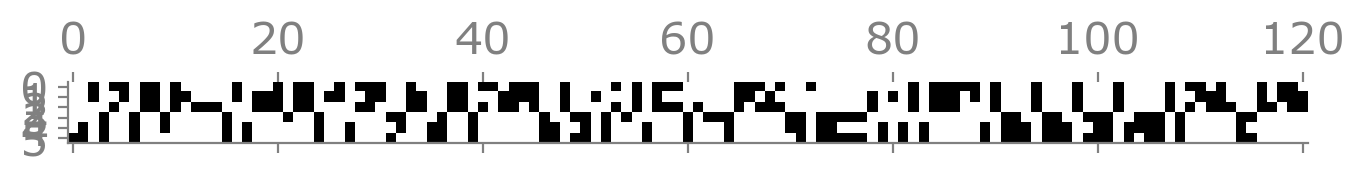

In [29]:
plt.spy(plotAAcm)

In [26]:
start = time.time()
AA = bsbm.A.dot(bsbm.A)
nodiagonalAA = AA - diags(np.diag(AA.toarray()), 0)  # remove diagonal
cd = CommunityDetect(nodiagonalAA)
WBHpartition, WBHnumgroups = cd.BetheHessian(weighted=True)
AAcm, _ = get_confusionmatrix(bsbm.groupId, WBHpartition, k1 * 2, WBHnumgroups)
ami = adjusted_mutual_info_score(bsbm.groupId, WBHpartition)
print(f"Weighted BH in nodiagonalAA result: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(AAcm)}) is: \n{AAcm}")

r=24.936118382779625, Weighted BH build.
r=-24.936118382779625, Weighted BH build.
Try first 100 eigenvalue...
Try first 1000 eigenvalue...
Try first 5999 eigenvalue...
Try first 100 eigenvalue...
Try first 1000 eigenvalue...
Try first 5999 eigenvalue...
number of groups = 5351, Kpos=2016, Kneg=3335
True index is [0 1 2 3 4 5], Community detected index is [ 367    8 2746  838 1027  106]
Weighted BH in nodiagonalAA result: 0.009631504243937042. Time=6138.100223064423. Confusion Matrix((6, 5351)) is: 
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [1. 1. 0. ... 1. 0. 0.]]


In [27]:
x, y = np.nonzero(nodiagonalAA.toarray())
nodiagonalplotAA = np.zeros(np.shape(nodiagonalAA))
for _x, _y in zip(x, y):
    nodiagonalplotAA[_x, _y] = 1
start = time.time()
cd = CommunityDetect(nodiagonalplotAA)
nodiagonalplotAABHpartition, nodiagonalplotAABHnumgroups = cd.BetheHessian()
nodiagonalplotAAcm, _ = get_confusionmatrix(bsbm.groupId, nodiagonalplotAABHpartition, k1 * 2, nodiagonalplotAABHnumgroups)
ami = adjusted_mutual_info_score(bsbm.groupId, nodiagonalplotAABHpartition)
print(f"BH result in plotAA: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(nodiagonalplotAAcm)}) is: \n{nodiagonalplotAAcm}")

Input matrix not in sparse format, transforming to sparse matrix
Input matrix not in sparse format, transforming to sparse matrix
Try first 100 eigenvalue...
Try first 1000 eigenvalue...
number of groups = 101, Kpos=101, Kneg=0
True index is [0 1 2 3 4 5], Community detected index is [ 55   1   9   8  23 100]
BH result in plotAA: 0.4783608707126974. Time=141.33756685256958. Confusion Matrix((6, 101)) is: 
[[26. 71.  0.  0.  0. 14.  0. 26.  1.  0.  1.  0.  0. 52.  0.  0.  1. 56.
   0.  1.  0.  0. 53.  0.  0.  0.  0.  1.  0. 10.  0.  2.  0.  0.  0. 56.
   0.  0.  5.  1.  0. 59.  0.  0.  0.  1.  2.  0.  0.  0.  3.  0. 56.  2.
   0.  0.  0.  0.  0.  0.  0. 36.  2.  0.  0.  0.  0. 43.  0. 48. 42.  1.
   0. 57.  2. 70.  0. 58.  2.  0.  0.  0.  0.  0. 46.  0.  0.  0.  0. 42.
  44.  3.  0.  0.  3.  0.  0.  1.  0.  0.  0.]
 [ 7.  0.  0.  0.  0. 24.  0. 22. 73.  2.  1.  0.  0.  1.  0.  0.  0.  3.
   0. 73.  0.  0.  1.  0.  0.  3.  0. 61.  0. 29.  0.  3.  0.  0.  0.  0.
   0.  0. 35.  1.  0.  1. 

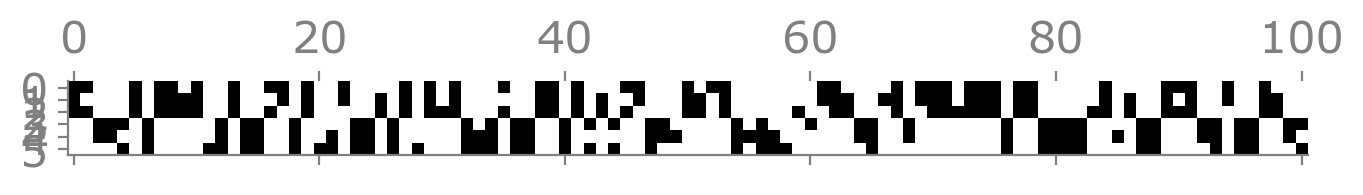

In [28]:
plt.spy(nodiagonalplotAAcm)

# TEST AMI for # of detected group

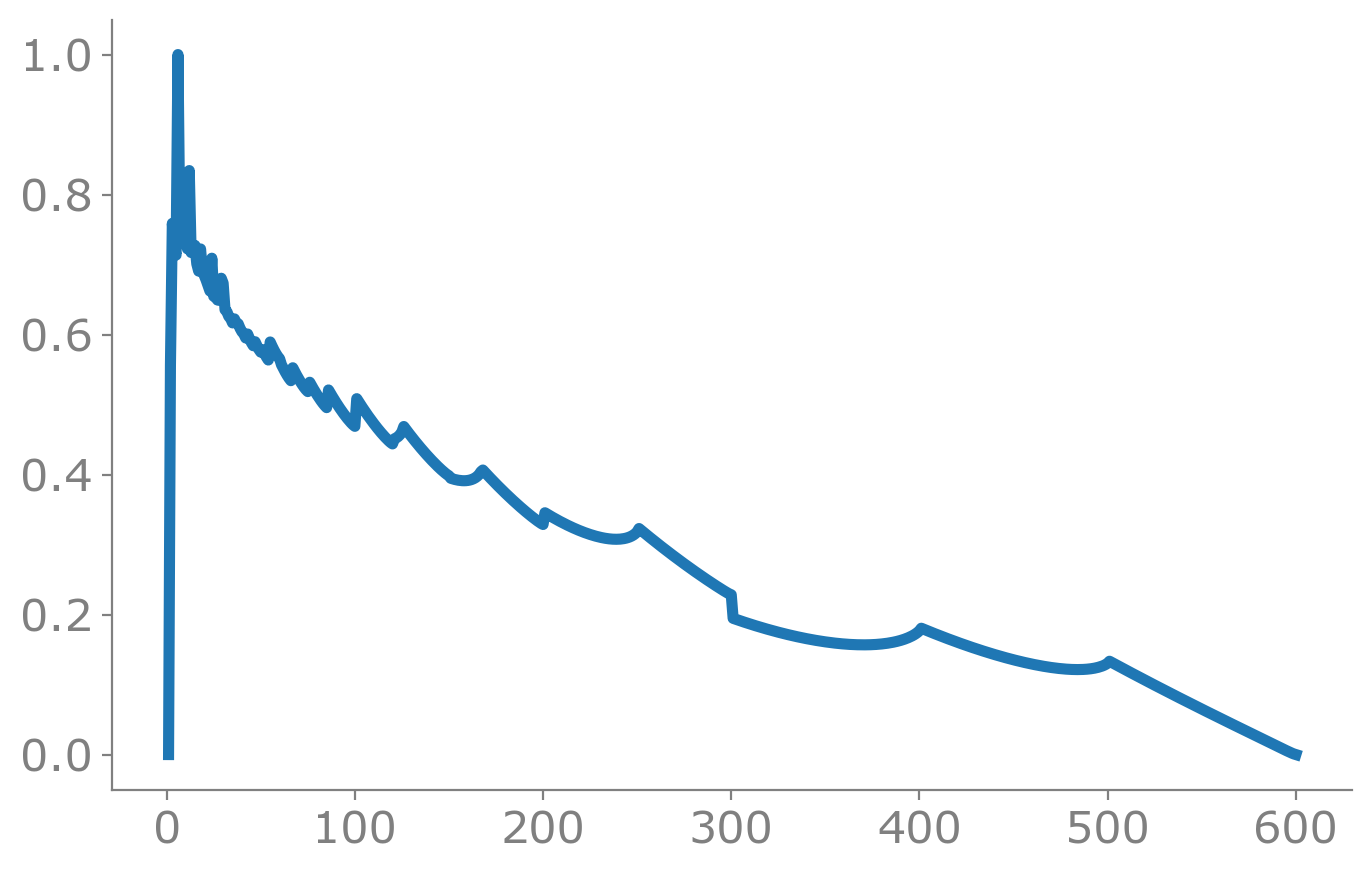

In [14]:
TruePartition = []
for i in range(6):
    TruePartition += [i] * 100
N = len(TruePartition)
NumberGroup = np.linspace(1, 600, 600)
AMIs = []
# print(NumberGroup)
for n in  NumberGroup:
    n = int(n)
    groupLabel = list(range(n))
    DetectPartition = []
    for i in range(n - 1):
        DetectPartition += [i] * int(N / n)
    DetectPartition += [n - 1] * int(N - len(DetectPartition))
    AMIs.append(adjusted_mutual_info_score(TruePartition, DetectPartition))
#     print(f'Detected Number of Group {n}, In Symmetric case AMI={AMIs[-1]}')
plt.plot(NumberGroup, AMIs)

# Always $SNR_{AA}<1$ 

--For case n1=300, k1=3, d=3, Range of delta (-0.015, 0.03)
Now delta=0.02 which make p_diagonal_B=0.023333333333333334, p_offdiagonal_B=0.003333333333333333
--In this case by theory, SNR_A=d=3, SNR_AA=5.925925925925926e-05, SNR_H=1.3333333333333333, SNR_HH=SNR_AA
1820
5308.0


([], [])

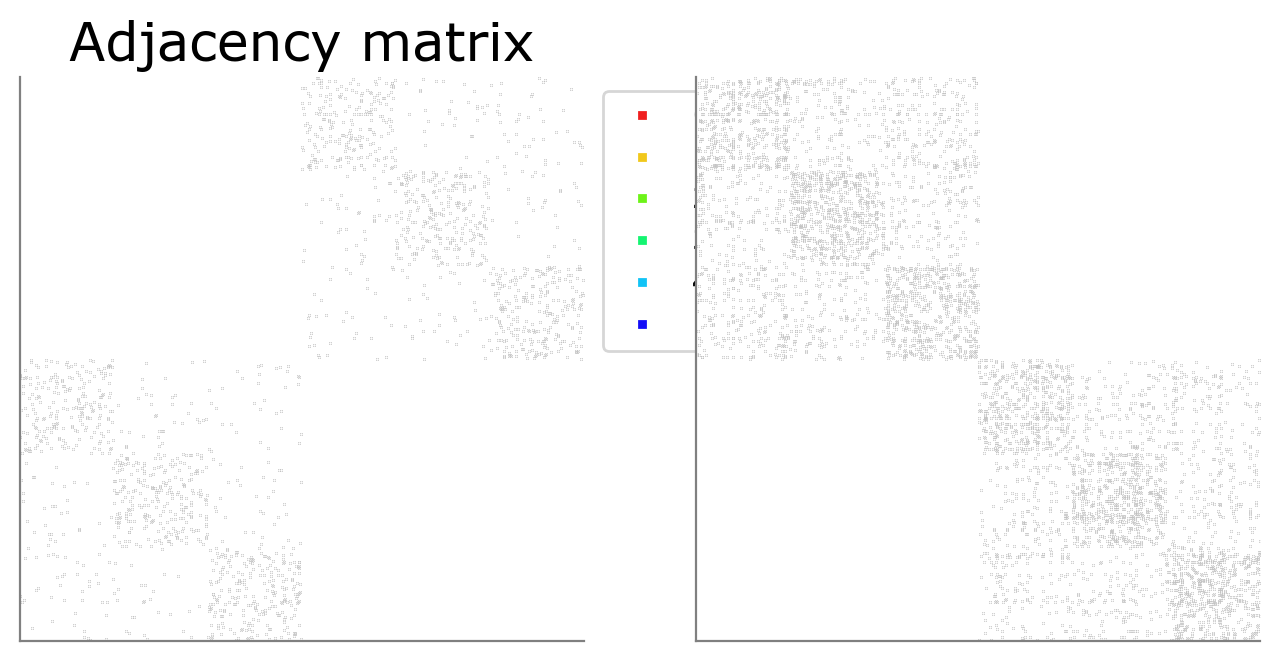

In [5]:
n1 = 300
k1 = 3
d = 3
min_delta, max_delta = range_delta(n1, k1, d)
print(f'--For case n1={n1}, k1={k1}, d={d}, Range of delta ({min_delta}, {max_delta})')
delta = 0.02

pBo = d / n1 - delta / k1
pBd = pBo + delta


# SNR_A, SNR_AA, SNR_H, SNR_HH = get_SNR_bbipartite(n1, k1, d, delta)
print(f'Now delta={delta} which make p_diagonal_B={pBd}, p_offdiagonal_B={pBo}')
SNRs = get_SNR_bbipartite(n1, k1, d, delta)
print(f'--In this case by theory, SNR_A=d={SNRs[0]}, SNR_AA={SNRs[1]}, SNR_H={SNRs[2]}, SNR_HH=SNR_AA')
# print(f'pB of diagonal is {pBd}, off-diagonal is {pBo}, SNR_AA={SNR_AA}, SNR_A={SNR_A}')

bsbm = symmetric_bipartite(n1, k1, pBd, pBo)
A = bsbm.A
AA = bsbm.A.dot(bsbm.A)
AA = AA - diags(np.diag(AA.toarray()), 0)  # remove diagonal

fig = plt.figure(figsize=(8, 4))
widths = [4, 4]
heights = [4]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
print(A.sum())
color = gen_colors(start=colors_red[0], end=colors_blue[0], n=len(bsbm.sizes))
plot_block_matrix(A.toarray(), partition_names=list(range(len(bsbm.sizes))), partition_counts=bsbm.sizes, colors=color, ms=0.001)

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
color = gen_colors(start=colors_red[0], end=colors_blue[0], n=len(bsbm.sizes))
x, y = np.nonzero(AA.toarray())
plotAA = np.zeros(np.shape(AA))
for _x, _y in zip(x, y):
    plotAA[_x, _y] = 1
print(plotAA.sum())
plt.spy(plotAA, markersize=1e-7, rasterized=True, color=gray)
plt.xticks([])
plt.yticks([])
# plot_block_matrix(plotAA, partition_names=list(range(len(bsbm.sizes))), partition_counts=bsbm.sizes, colors=color, ms=0.01)

In [6]:
start = time.time()
cd = CommunityDetect(bsbm.A)
BHpartition, BHnumgroups = cd.BetheHessian()
Acm, _ = get_confusionmatrix(bsbm.groupId, BHpartition, k1 * 2, BHnumgroups)
ami = adjusted_mutual_info_score(bsbm.groupId, BHpartition)
print(f"BH result in A: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(Acm)}) is: \n{Acm}")

number of groups = 4, Kpos=2, Kneg=2
True index is [1 2 4 5], Community detected index is [2 1 3 0]
BH result in A: 0.4779777449108583. Time=0.39563465118408203. Confusion Matrix((6, 4)) is: 
[[32. 55.  0. 13.]
 [86.  5.  0.  9.]
 [21. 76.  0.  3.]
 [ 0.  0. 14. 86.]
 [ 0.  0. 65. 35.]
 [ 0.  0.  8. 92.]]


In [12]:
start = time.time()
AA = bsbm.A.dot(bsbm.A)
cd = CommunityDetect(AA)
WBHpartition, WBHnumgroups = cd.BetheHessian(weighted=True)
AAcm, _ = get_confusionmatrix(bsbm.groupId, WBHpartition, k1 * 2, WBHnumgroups)
ami = adjusted_mutual_info_score(bsbm.groupId, WBHpartition)
print(f"Weighted BH in AA result: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(AAcm)}) is: \n{AAcm}")

r=3.4703506066870724, Weighted BH build.
r=-3.4703506066870724, Weighted BH build.
Try first 100 eigenvalue...
Try first 599 eigenvalue...
number of groups = 438, Kpos=437, Kneg=1
True index is [0 1 2 3 4 5], Community detected index is [159 101   4 219  41  30]
Weighted BH in AA result: 0.035000863956036105. Time=3.806851863861084. Confusion Matrix((6, 438)) is: 
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 2. ... 0. 0. 0.]]


In [29]:
start = time.time()
AA = bsbm.A.dot(bsbm.A)
cd = CommunityDetect(AA)
WBHpartition, WBHnumgroups = cd.BetheHessian(num_groups=2, weighted=True)
AAcm, _ = get_confusionmatrix(bsbm.groupId, WBHpartition, k1 * 2, WBHnumgroups)
ami = adjusted_mutual_info_score(bsbm.groupId, WBHpartition)
print(f"Weighted BH in AA result: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(AAcm)}) is: \n{AAcm}")

r=3.4703506066870724, Weighted BH build.
r=-3.4703506066870724, Weighted BH build.
True index is [0 5], Community detected index is [0 1]
Weighted BH in AA result: 0.23740245591739295. Time=0.3120846748352051. Confusion Matrix((6, 2)) is: 
[[100.   0.]
 [100.   0.]
 [100.   0.]
 [ 40.  60.]
 [ 37.  63.]
 [ 36.  64.]]


(0.0, 100.0)

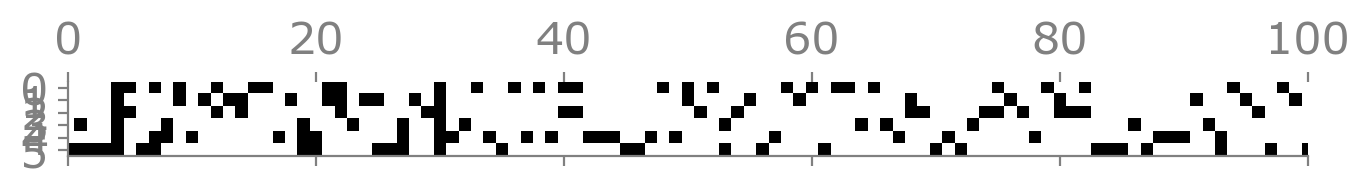

In [28]:
plt.spy(AAcm)
plt.xlim(0, 100)

In [13]:
start = time.time()
cd = CommunityDetect(plotAA)
plotAABHpartition, plotAABHnumgroups = cd.BetheHessian()
plotAAcm, _ = get_confusionmatrix(bsbm.groupId, plotAABHpartition, k1 * 2, plotAABHnumgroups)
ami = adjusted_mutual_info_score(bsbm.groupId, plotAABHpartition)
print(f"BH result in plotAA: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(plotAAcm)}) is: \n{plotAAcm}")

Input matrix not in sparse format, transforming to sparse matrix
Input matrix not in sparse format, transforming to sparse matrix
Try first 100 eigenvalue...
number of groups = 24, Kpos=24, Kneg=0
True index is [0 1 2 3 4 5], Community detected index is [21 15 14  7  4 17]
BH result in plotAA: 0.2800539453455927. Time=0.37113237380981445. Confusion Matrix((6, 24)) is: 
[[ 0. 10. 11.  9. 15. 11.  1.  1.  0.  0.  0.  1.  0.  1.  7. 27.  0.  0.
   2.  0.  0.  0.  0.  4.]
 [ 0. 10.  1.  5. 10.  1. 11. 16.  0.  0.  0. 11.  0.  4.  1. 27.  0.  0.
   1.  0.  0.  0.  0.  2.]
 [ 0. 16. 11.  6. 10.  2.  1.  3.  0.  0.  0.  0.  0.  2. 17. 21.  0.  0.
   5.  0.  0.  0.  0.  6.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 17.  2. 12.  0.  5.  0.  0. 44.  8.  2.
   0.  5.  2.  1.  2.  0.]
 [ 2.  0.  0.  0.  0.  0.  0.  0.  2. 13. 10.  0. 12.  0.  0. 33.  0. 19.
   0.  2.  2.  3.  2.  0.]
 [ 7.  0.  0.  0.  0.  0.  0.  0.  4.  2.  1.  0.  2.  0.  0. 30.  2.  4.
   0.  0.  9. 21. 18.  0.]]


In [11]:
Omega_ = np.dot(bsbm.ps, bsbm.ps) / n1
print(f'Omega_=\n{Omega_}')
print(f'Link P = \n{Omega_ * n1}')
print(f'Expected Edges = \n{Omega_ * n1 * n1 * n1}')

Omega_=
[[1.88888889e-06 5.55555556e-07 5.55555556e-07 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.55555556e-07 1.88888889e-06 5.55555556e-07 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.55555556e-07 5.55555556e-07 1.88888889e-06 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.88888889e-06
  5.55555556e-07 5.55555556e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.55555556e-07
  1.88888889e-06 5.55555556e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.55555556e-07
  5.55555556e-07 1.88888889e-06]]
Link P = 
[[0.00056667 0.00016667 0.00016667 0.         0.         0.        ]
 [0.00016667 0.00056667 0.00016667 0.         0.         0.        ]
 [0.00016667 0.00016667 0.00056667 0.         0.         0.        ]
 [0.         0.         0.         0.00056667 0.00016667 0.00016667]
 [0.         0.         0.         0.00016667 0.00056667 0.00016667]
 [0.         0.         0.         0.00016667 0.00016667 0.0005666

# Thoery
In this kind of case. The network
$$
A=\left [ 
\begin{matrix}
0 & H \\
H^T & 0
\end{matrix}
\right]_{n_1 + n_2}
$$
is generated based on affinity matrix
$$
\Omega = \left [ 
\begin{matrix}
0 & B \\
B^T & 0
\end{matrix}
\right]_{k_1 + k_2}
$$
, where $B = (p_{Bd}-p_{Bo}) * I + p_{Bo} * J$. We have eigenvalue of $B$:
$$
\lambda_1(B)=p_{Bd}+(k_1-1)p_{Bo}, \lambda_2(B)=p_{Bd}-p_{Bo}
$$
and the eigenvalue of $\Omega$ is:
$$
\pm \lambda_1(B), \pm \lambda_2(B)
$$

## 1.

The SNR of $A$ is average degree:
$$
SNR_A=\frac{(-\frac{2n_1}{2k_1} \lambda_1(B))^2}{\frac{2n_1}{2k_1} \lambda_1(B)} =\frac{n_1}{k_1}(p_{Bd}+(k_1-1)p_{Bo})=d
$$
The SNR of $H$ is (Which is also $\lambda_3^2/\lambda_1$ or $\lambda_4^2/\lambda_1$ of $PQ$ of $A$, `Relationship to Minority detectability`):
$$
SNR_H=\frac{n_1}{k_1}\frac{\lambda_2(B)^2}{\lambda_1(B)}=\frac{n_1}{k_1}\frac{(p_{Bd}-p_{Bo})^2}{(p_{Bd}+(k_1-1)p_{Bo})}
$$
**PROBLEM1**: However $H$ is not a symmetric matrix generally, it can't be treat as a undirected network's adjacent matrix. So we can't use BH in H directly. 


## 2. 
Treat $AA$ as a weighted network generated by poisson distribution. Its $PQ$ should be:
$$
PQ=\frac{2n_1}{2k_1} \left [ 
\begin{matrix}
\frac{1}{n_1}BB^T & 0 \\
0 & \frac{1}{n_1}B^TB
\end{matrix}
\right]_{k_1 + k_2}
$$
And eigenvalue is:
$$
\frac{1}{k_1}\lambda_1(B)^2, \frac{1}{k_1}\lambda_2(B)^2, ...
$$
Its SNR is (equal to SNR of $HH^T$):
$$
\begin{aligned}
SNR_{AA}
&=\frac{1}{k_1}\frac{\lambda_2(B)^4}{\lambda_1(B)^2}=\frac{1}{k_1}\frac{(p_{Bd}-p_{Bo})^4}{(p_{Bd}+(k_1-1)p_{Bo})^2}=SNR_{HH^T}
\end{aligned}
$$

## 3
With parameter $d=\frac{n_1}{k_1}(p_{Bd}+(k_1-1)p_{Bo})$ and $\delta=p_{Bd}-p_{Bo}$, we have:
$$
\begin{aligned}
p_{Bo} &= \frac{d}{n1}-\frac{\delta}{k1}\\
p_{Bd} &= p_{Bo} + \delta
\end{aligned}
$$
To make sure $p_{Bd}\in[0, 1], p_{Bo}\in[0, 1]$, we have
$$
\delta\in(max(-\frac{k_1}{k_1-1}\frac{d}{n_1}, k_1(\frac{d}{n_1}-1)), min(k_1\frac{d}{n_1}, \frac{k_1}{k_1-1}(1-\frac{d}{n_1})))
$$
With notation $d$ and $\delta$, we have:
$$
SNR_{AA} = \frac{n_1^2\delta^4}{k_1^3d^2}
$$
We can prove $SNR_{AA}< 1$.

**PROBLEM2**: The weighted BH detect AA or BH detect nonzero(AA) both detect many communities, it take too much time to do these detection.

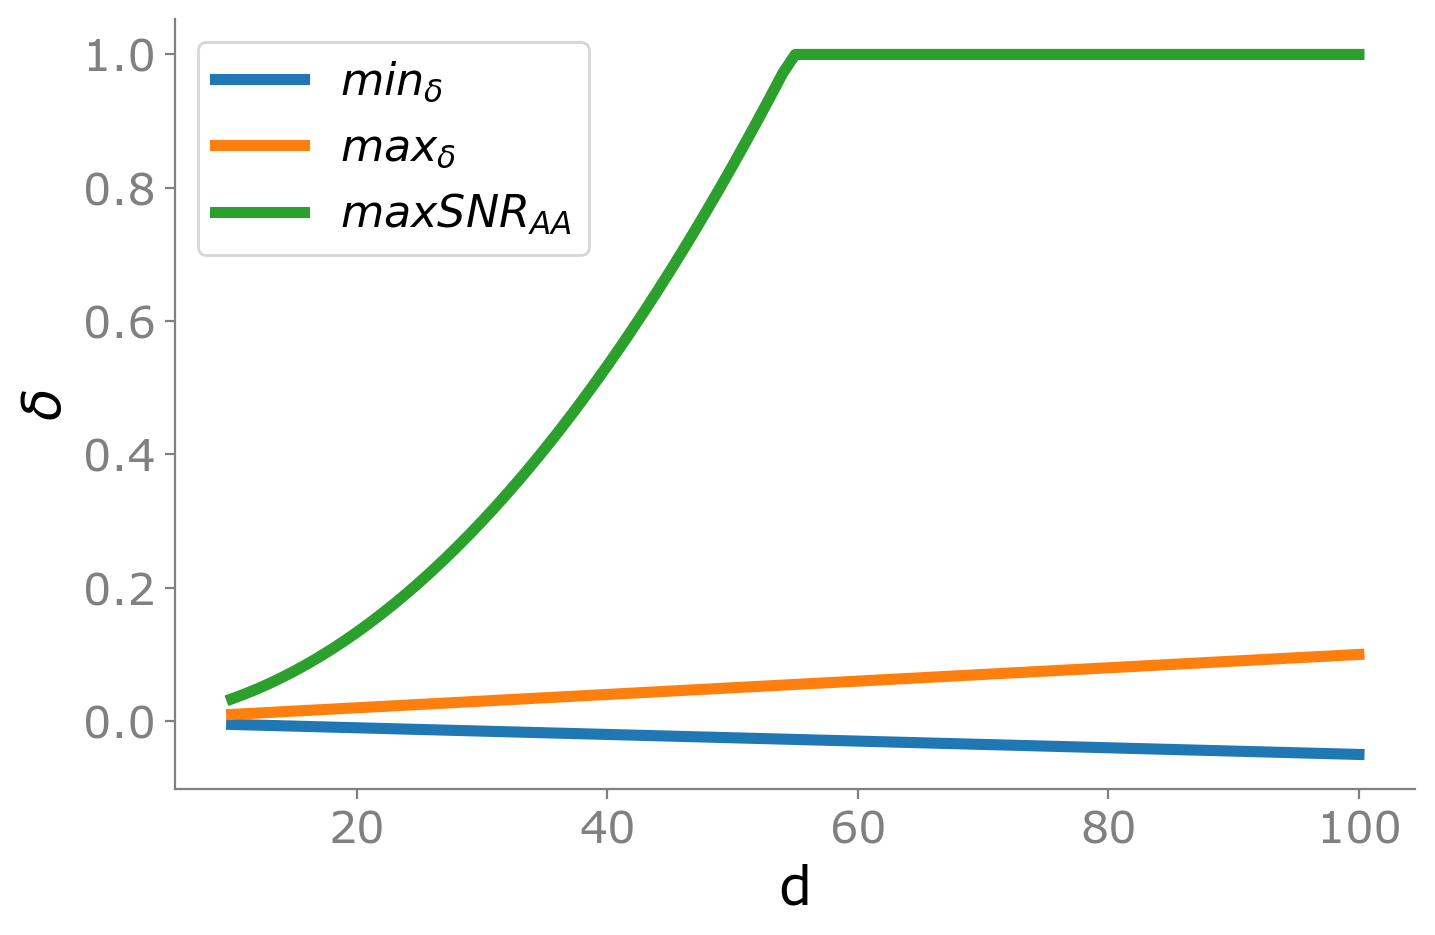

In [9]:
n1 = 3000
k1 = 3
ds = np.around(np.linspace(10, 100, 91), 2)
mindeltas = []
maxdeltas = []
maxSNRAAs = []
for d in ds:
    mindelta, maxdelta = range_delta(n1, k1, d)
    mindeltas.append(mindelta)
    maxdeltas.append(maxdelta)
    maxabsdelta = max(abs(mindelta), abs(maxdelta))
    snraa = n1**3 * maxabsdelta**4 / (k1**4 * d**2)
    snraa = 1 if snraa > 1 else snraa
#     snraa = n1**2 * maxabsdelta**4 / (k1**3 * d**2)
    maxSNRAAs.append(snraa)
plt.plot(ds, mindeltas, label=r'$min_\delta$')
plt.plot(ds, maxdeltas, label=r'$max_\delta$')
plt.plot(ds, maxSNRAAs, label=r'$maxSNR_{AA}$')
plt.xlabel('d')
plt.ylabel(r'$\delta$')
plt.legend()

In [19]:
n1 = 3000
k1 = 3
d = 10
deltas = []
results = []
SNR_Hs = []
with open("./result/detectabilityBipartite/amiExp24.2.22_n1=3000n2=3000_k1=3k2=3_lambda_.txt", 'r') as f:
    for line in f:
        line = line.strip().split(' ')
        if float(line[0]) == d:
            deltas.append(float(line[1]))
            results.append(float(line[3]))
            SNR_Hs.append(n1/k1*float(line[-2])**2/float(line[-3]))
index = np.argsort(deltas)
print(index)
deltas = np.array(deltas)[index]
results = np.array(results)[index]
SNR_Hs = np.array(SNR_Hs)[index]

[ 5  0  1  2  4  3  7  6  8  9 10 11 12 14 13 15 16 17 18 19 20 21 22 23
 24 25 26 28 27]


Text(0, 0.5, 'AMI or SNR>1')

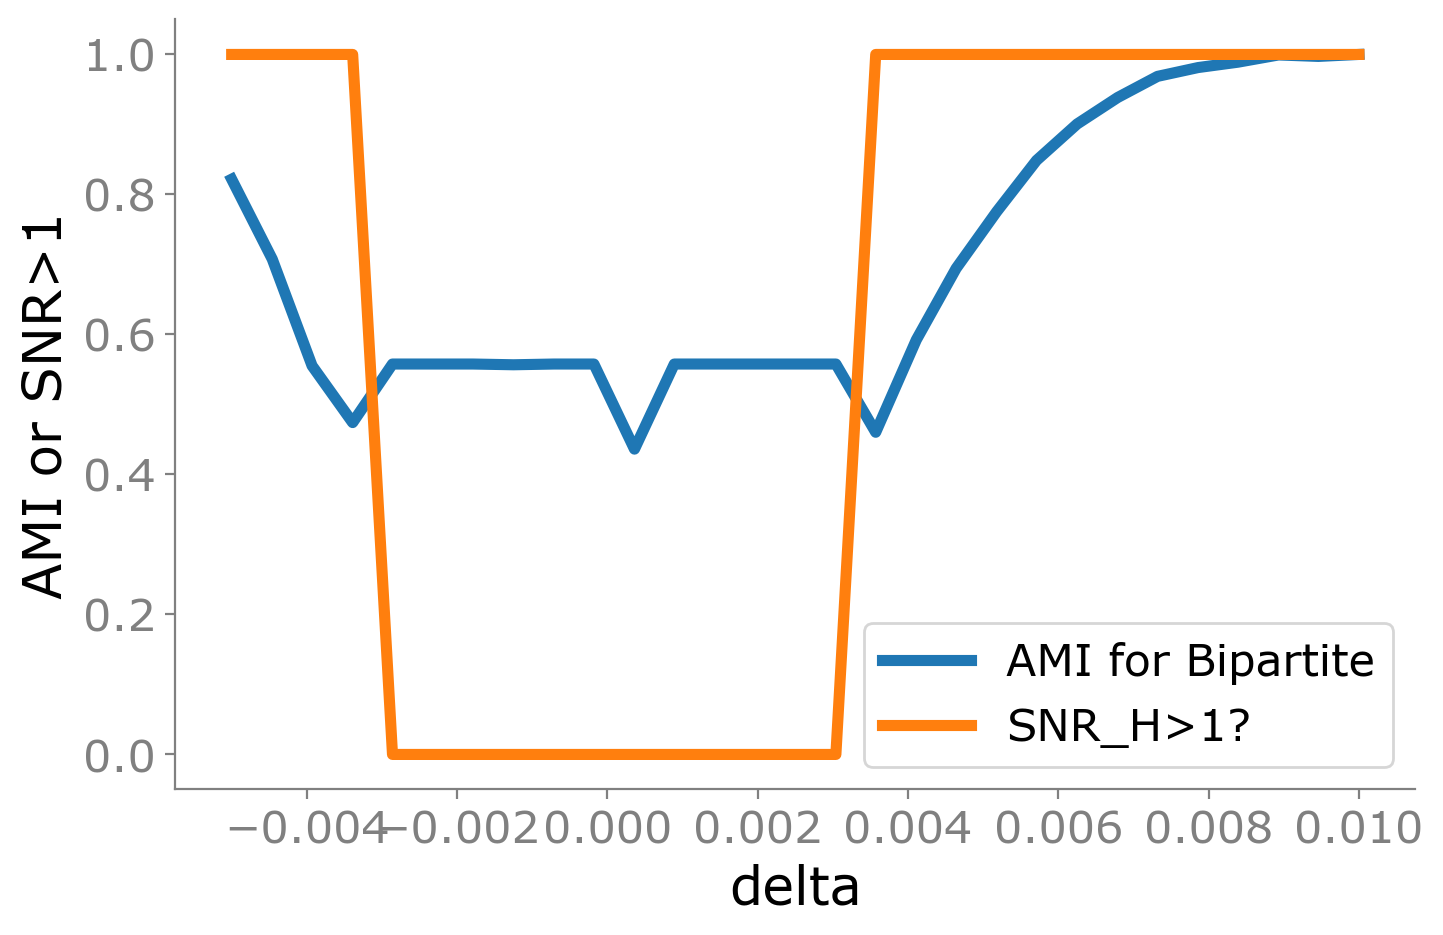

In [26]:
plt.plot(deltas, results, label='AMI for Bipartite')
plt.plot(deltas, SNR_Hs>1, label='SNR_H>1?')
plt.legend()
plt.xlabel('delta')
plt.ylabel('AMI or SNR>1')

# AMI result for bipartite given Number Groups

In [3]:
# For big n
n1 = n2 = 3000
k1 = k2 = 3
WithlambdaB = True
fileID = 'amiExp24.2.30' + f'_n1={n1}n2={n2}_k1={k1}k2={k2}_{"lambda" if WithlambdaB else ""}_givenNumgroups'
load_path = "./result/detectabilityBipartite/" + fileID + ".txt"
plot_ds, plot_deltas, results, lambdas = read_exp(load_path=load_path, WithlambdaB=WithlambdaB, num_result=10)
A_ami, A_num_group, Ahalf_ami, Ahalf_num_group, AA_ami, AA_num_group, AAhalf_ami, AAhalf_num_group, H_ami, H_num_group = \
results[0], results[1], results[2], results[3],results[4],results[5],results[6],results[7],results[8],results[9],

min A ami=0.38586 max A ami=1.0
min AA ami=0.385685 max AA ami=1.0
Range of SNR_A is min=10.0, max=30.0
Range of SNR_AA is min=0.03333333333333333, max=0.3
Range of SNR_HHT is min=3.888000000000001e-10, max=0.03333333333333333
min H ami=0.0 max H ami=1.0
min Ahalf ami=5.000000000000013e-06 max Ahalf ami=1.0
min AAhalf ami=0.0 max AAhalf ami=1.0


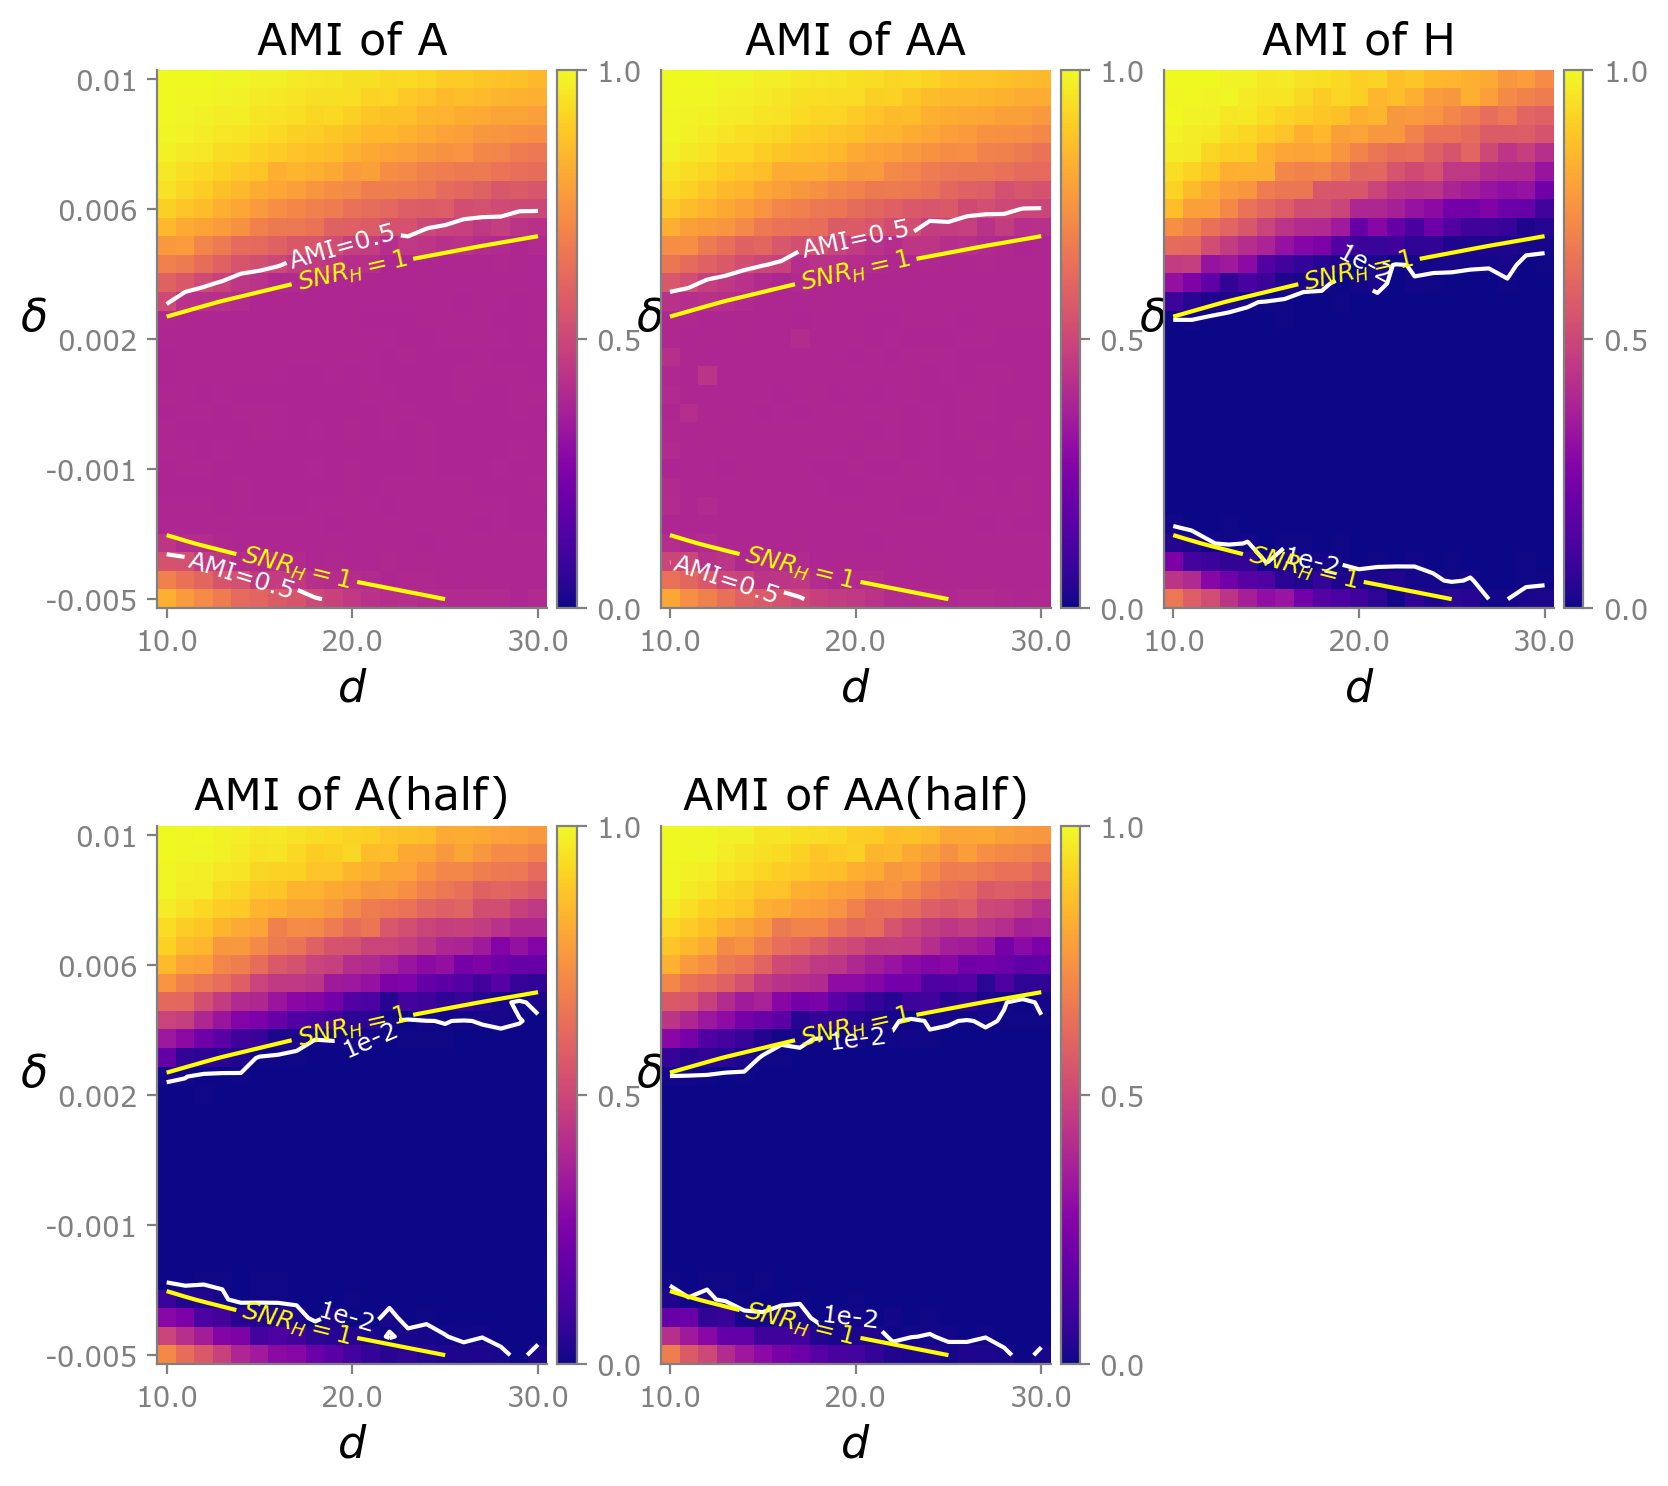

In [13]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(9.2, 9))
widths = [3, 3, 3]
heights = [3, 3]
spec5 = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_Aami = color_imshow_2d(plot_ds, plot_deltas, A_ami, z_center=zcenter, title="AMI of A", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
print(f'min A ami={np.min(np.abs(A_ami))} max A ami={np.max(np.abs(A_ami))}')

contour_data(plot_Aami, ax, levels=[0.5], fmt={0.5: r'AMI=0.5'}, color='white', inline=True)
# contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$SNR_A=1$'}, color='red', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)
# handels = []
# handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
# plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
# plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
# plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
# handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
# handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
# handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_AAami = color_imshow_2d(plot_ds, plot_deltas, AA_ami, z_center=zcenter, title="AMI of AA", xlabel=r'$d$', ylabel=r'$\delta$', 
                             min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
print(f'min AA ami={np.min(np.abs(AA_ami))} max AA ami={np.max(np.abs(AA_ami))}')
contour_data(plot_AAami, ax, levels=[0.5], fmt={0.5: r'AMI=0.5'}, color='white', inline=True)
print("Range of SNR_A is ", end="")
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_A=1$'}, color='red', inline=True, printrange=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)
print("Range of SNR_AA is ", end="")
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1**2 *  lambdas[:, 0]**2, z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_AA=1$'}, color='black', inline=True, printrange=True)
print("Range of SNR_HHT is ", end="")
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1**2 * lambdas[:, 1]**4 / lambdas[:, 0]**2, z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_HHT=1$'}, color='black', inline=True, printrange=True)


row = 0
col = 2
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_Hami = color_imshow_2d(plot_ds, plot_deltas, H_ami, z_center=zcenter, title="AMI of H", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
print(f'min H ami={np.min(np.abs(H_ami))} max H ami={np.max(np.abs(H_ami))}')
contour_data(plot_Hami, ax, levels=[1e-2], fmt={1e-2: r'1e-2'}, color='white', inline=True)
# contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$SNR_A=1$'}, color='red', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)


row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_Ahalfami = color_imshow_2d(plot_ds, plot_deltas, Ahalf_ami, z_center=zcenter, title="AMI of A(half)", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
print(f'min Ahalf ami={np.min(np.abs(Ahalf_ami))} max Ahalf ami={np.max(np.abs(Ahalf_ami))}')
contour_data(plot_Ahalfami, ax, levels=[1e-2], fmt={1e-2: r'1e-2'}, color='white', inline=True)
# contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$SNR_A=1$'}, color='red', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)

row = 1
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_AAhalfami = color_imshow_2d(plot_ds, plot_deltas, AAhalf_ami, z_center=zcenter, title="AMI of AA(half)", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
print(f'min AAhalf ami={np.min(np.abs(AAhalf_ami))} max AAhalf ami={np.max(np.abs(AAhalf_ami))}')
contour_data(plot_AAhalfami, ax, levels=[1e-2], fmt={1e-2: r'1e-2'}, color='white', inline=True)
# contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$SNR_A=1$'}, color='red', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)
# plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_" + f'Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

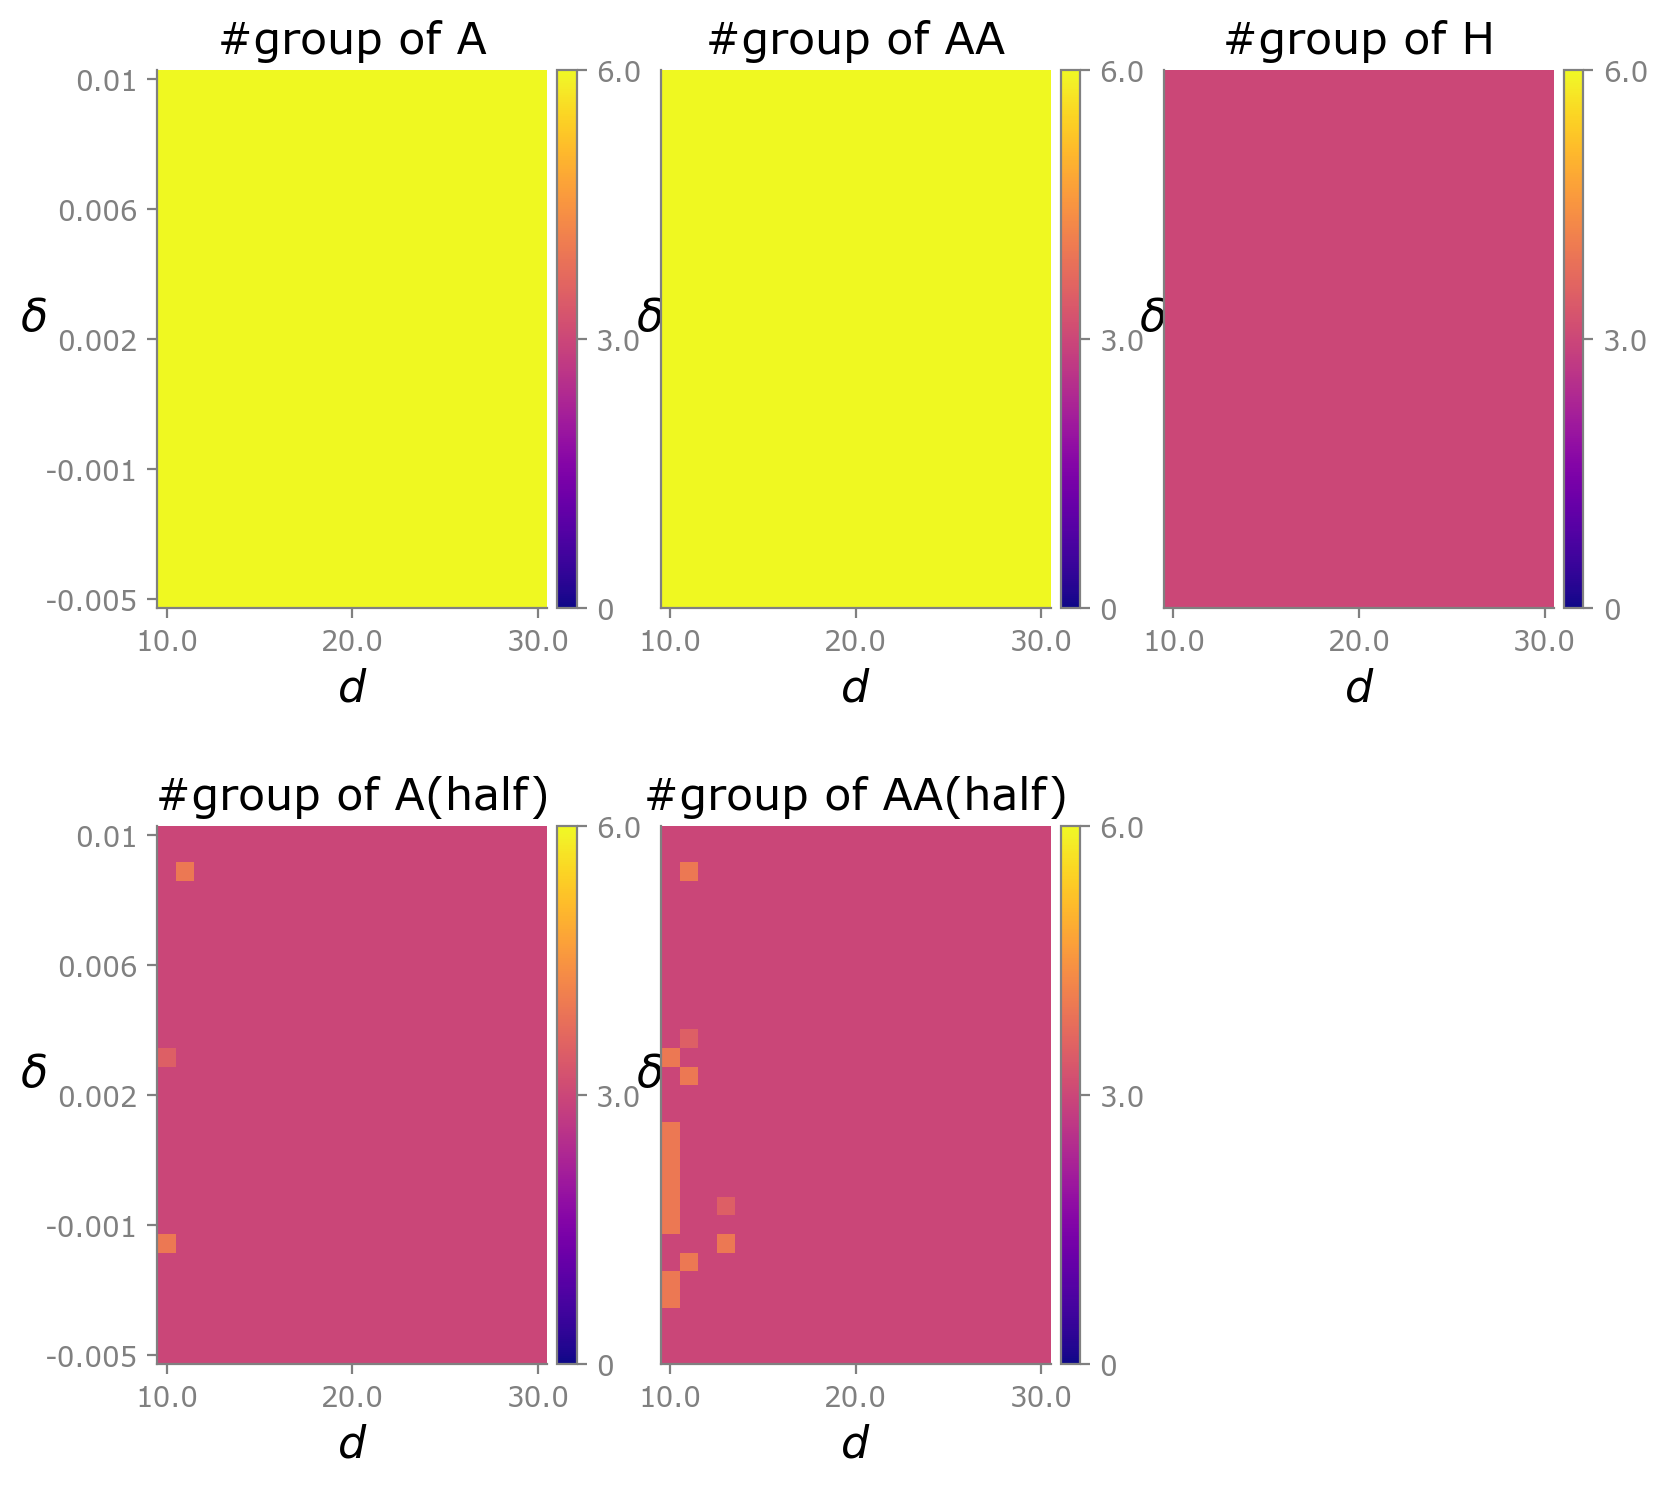

In [32]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(9.2, 9))
widths = [3, 3, 3]
heights = [3, 3]
spec5 = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_A_num_group = color_imshow_2d(plot_ds, plot_deltas, A_num_group, z_center=3, title="#group of A", xlabel=r'$d$', ylabel=r'$\delta$', 
                                   min_z=0, max_z=6, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=6, ytickprecision=3)

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_AA_num_group = color_imshow_2d(plot_ds, plot_deltas, AA_num_group, z_center=3, title="#group of AA", xlabel=r'$d$', ylabel=r'$\delta$', 
                             min_z=0, max_z=6, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=6, set_yticks=False, ytickprecision=3)

row = 0
col = 2
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_H_num_group = color_imshow_2d(plot_ds, plot_deltas, H_num_group, z_center=3, title="#group of H", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=6, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=6, set_yticks=False, ytickprecision=3)

row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_Ahalf_num_group = color_imshow_2d(plot_ds, plot_deltas, Ahalf_num_group, z_center=3, title="#group of A(half)", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=6, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=6, ytickprecision=3)

row = 1
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_AAhalf_num_group = color_imshow_2d(plot_ds, plot_deltas, AAhalf_num_group, z_center=3, title="#group of AA(half)", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=6, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=6, set_yticks=False, ytickprecision=3)

# plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_" + f'Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [15]:
print(np.unique(Ahalf_num_group, return_counts=True))
print(np.unique(AAhalf_num_group, return_counts=True))

(array([3. , 3.5, 4. ]), array([606,   1,   2], dtype=int64))
(array([3. , 3.5, 4. ]), array([594,   2,  13], dtype=int64))


In [11]:
def cm_for_bipartite_network(delta, d, n1, k1):
    pBo = d / n1 - delta / k1
    pBd = pBo + delta
    bsbm = symmetric_bipartite(n1, k1, pBd, pBo)
    A = bsbm.A
    k = bsbm.k1 + bsbm.k2
    A_BHpartition, A_BHnumgroups = CommunityDetect(A).BetheHessian(num_groups=k)
    AconfusionMatrix, _ = get_confusionmatrix(bsbm.groupId, A_BHpartition, k1 * 2, A_BHnumgroups)
    np.set_printoptions(suppress = True)
    print(f'd={d}, delta={delta} A AMI is {adjusted_mutual_info_score(bsbm.groupId, A_BHpartition)}, Confusion Matrix is\n {AconfusionMatrix}')
    AhalfconfusionMatrix, _ = get_confusionmatrix(bsbm.groupId[:n1], A_BHpartition[:n1], k1, np.size(np.unique(A_BHpartition[:n1])))
    print(f'd={d}, delta={delta} Ahalf AMI is {adjusted_mutual_info_score(bsbm.groupId[:n1], A_BHpartition[:n1])}, Confusion Matrix is\n {AhalfconfusionMatrix}')
    
    AA = bsbm.A.dot(bsbm.A)
    AA_WBHpartition, AA_WBHnumgroups = CommunityDetect(AA).BetheHessian(num_groups=k, weighted=True)
    AAconfusionMatrix, _ = get_confusionmatrix(bsbm.groupId, AA_WBHpartition, k1 * 2, AA_WBHnumgroups)
    print(f'd={d}, delta={delta} AA AMI is {adjusted_mutual_info_score(bsbm.groupId, AA_WBHpartition)}, Confusion Matrix is\n {AAconfusionMatrix}')
    AAhalfconfusionMatrix, _ = get_confusionmatrix(bsbm.groupId[:n1], AA_WBHpartition[:n1], k1, np.size(np.unique(AA_WBHpartition[:n1])))
    print(f'd={d}, delta={delta} AAhalf AMI is {adjusted_mutual_info_score(bsbm.groupId[:n1], AA_WBHpartition[:n1])}, Confusion Matrix is\n {AAhalfconfusionMatrix}')
    
    B = bsbm.A[:n1, n1:]  # TODO B is not undirected
    B_BHpartition, B_BHnumgroups = CommunityDetect(B).BetheHessian(num_groups=bsbm.k1)
    BconfusionMatrix, _ = get_confusionmatrix(bsbm.groupId[:n1], B_BHpartition, k1, B_BHnumgroups)
    print(f'd={d}, delta={delta} B AMI is {adjusted_mutual_info_score(bsbm.groupId[:n1], B_BHpartition)}, Confusion Matrix is\n {BconfusionMatrix}')
    
    BBT = AA[:n1, :n1]
    BBT_BHpartition, BBT_BHnumgroups = CommunityDetect(BBT).BetheHessian(num_groups=bsbm.k1, weighted=True)
    BBTconfusionMatrix, _ = get_confusionmatrix(bsbm.groupId[:n1], BBT_BHpartition, k1, BBT_BHnumgroups)
    print(f'd={d}, delta={delta} BB^T AMI is {adjusted_mutual_info_score(bsbm.groupId[:n1], BBT_BHpartition)}, Confusion Matrix is\n {BBTconfusionMatrix}')
    
    BTB = AA[n1:, n1:]
    BTB_BHpartition, BTB_BHnumgroups = CommunityDetect(BTB).BetheHessian(num_groups=bsbm.k1, weighted=True)
    BTBconfusionMatrix, _ = get_confusionmatrix(bsbm.groupId[n1:], BTB_BHpartition, k1, BTB_BHnumgroups)
    print(f'd={d}, delta={delta} B^TB AMI is {adjusted_mutual_info_score(bsbm.groupId[n1:], BTB_BHpartition)}, Confusion Matrix is\n {BTBconfusionMatrix}')
    
    
    fig = plt.figure(figsize=(4, 4))
    widths = [4]
    heights = [4]
    spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
    row = 0
    col = 0
    ax = fig.add_subplot(spec5[row, col])
    c = gen_colors(start=colors_red[0], end=colors_blue[0], n=6)
    _, indexes, counts = np.unique(bsbm.groupId, return_index=True, return_counts=True)
    counts = counts[np.argsort(indexes)]
    plot_block_matrix(bsbm.A.toarray(), partition_names=list(range(6)), partition_counts=counts, colors=c, ms=0.01)

True index is [0 1 2 3 4 5], Community detected index is [5 3 0 4 2 1]
d=15, delta=0.002 A AMI is 0.3865828609068753, Confusion Matrix is
 [[332. 345. 323.   0.   0.   0.]
 [310. 348. 342.   0.   0.   0.]
 [316. 344. 340.   0.   0.   0.]
 [  0.   0.   0. 342. 334. 324.]
 [  0.   0.   0. 306. 370. 324.]
 [  0.   0.   0. 324. 323. 353.]]
True index is [0 1 2], Community detected index is [2 1 0]
d=15, delta=0.002 Ahalf AMI is -0.00038225943351788015, Confusion Matrix is
 [[332. 345. 323.]
 [310. 348. 342.]
 [316. 344. 340.]]
r=15.393710837005264, Weighted BH build.
r=-15.393710837005264, Weighted BH build.
True index is [0 1 2 3 4 5], Community detected index is [0 3 1 4 2 5]
d=15, delta=0.002 AA AMI is 0.3955381792020005, Confusion Matrix is
 [[258. 211. 531.   0.   0.   0.]
 [206. 296. 498.   0.   0.   0.]
 [223. 248. 529.   0.   0.   0.]
 [  0.   0.   0. 262. 241. 497.]
 [  0.   0.   0. 202. 306. 492.]
 [  0.   0.   0. 237. 242. 521.]]
True index is [0 1 2], Community detected index i

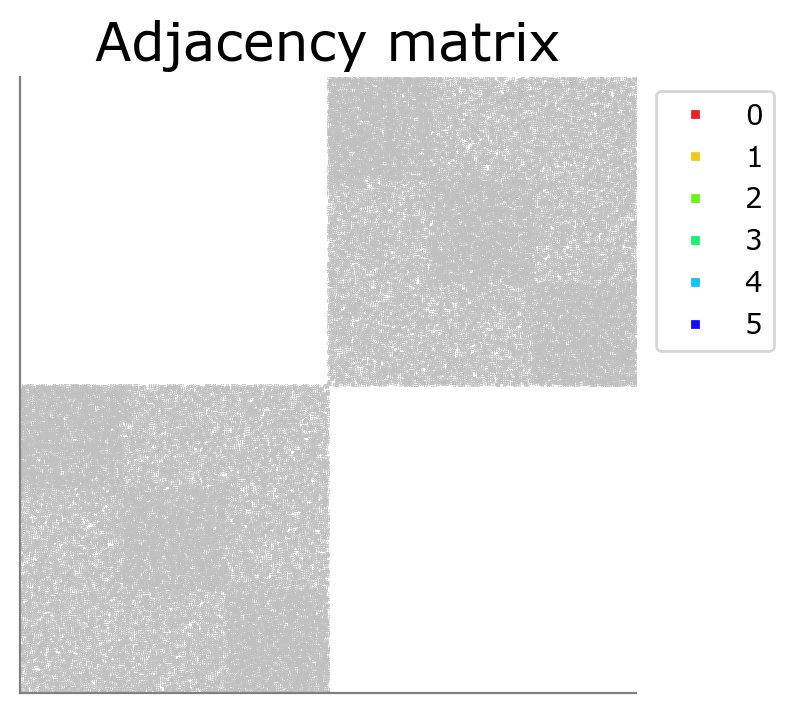

In [15]:
cm_for_bipartite_network(delta=0.002, d=15, n1=n1, k1=k1)

True index is [0 1 2 3 4 5], Community detected index is [4 2 0 1 5 3]
d=15, delta=0.006 A AMI is 0.7421589826765252, Confusion Matrix is
 [[878.  60.  62.   0.   0.   0.]
 [ 62. 896.  42.   0.   0.   0.]
 [ 48.  89. 863.   0.   0.   0.]
 [  0.   0.   0. 873.  67.  60.]
 [  0.   0.   0.  62. 882.  56.]
 [  0.   0.   0.  66.  76. 858.]]
True index is [0 1 2], Community detected index is [2 1 0]
d=15, delta=0.006 Ahalf AMI is 0.5905296107277851, Confusion Matrix is
 [[878.  60.  62.]
 [ 62. 896.  42.]
 [ 48.  89. 863.]]
r=15.429355138825471, Weighted BH build.
r=-15.429355138825471, Weighted BH build.
True index is [0 1 2 3 4 5], Community detected index is [3 4 0 1 5 2]
d=15, delta=0.006 AA AMI is 0.7238573975840247, Confusion Matrix is
 [[863.  67.  70.   0.   0.   0.]
 [ 64. 888.  48.   0.   0.   0.]
 [ 54.  95. 851.   0.   0.   0.]
 [  0.   0.   0. 855.  78.  67.]
 [  0.   0.   0.  61. 881.  58.]
 [  0.   0.   0.  73.  92. 835.]]
True index is [0 1 2], Community detected index is [1 

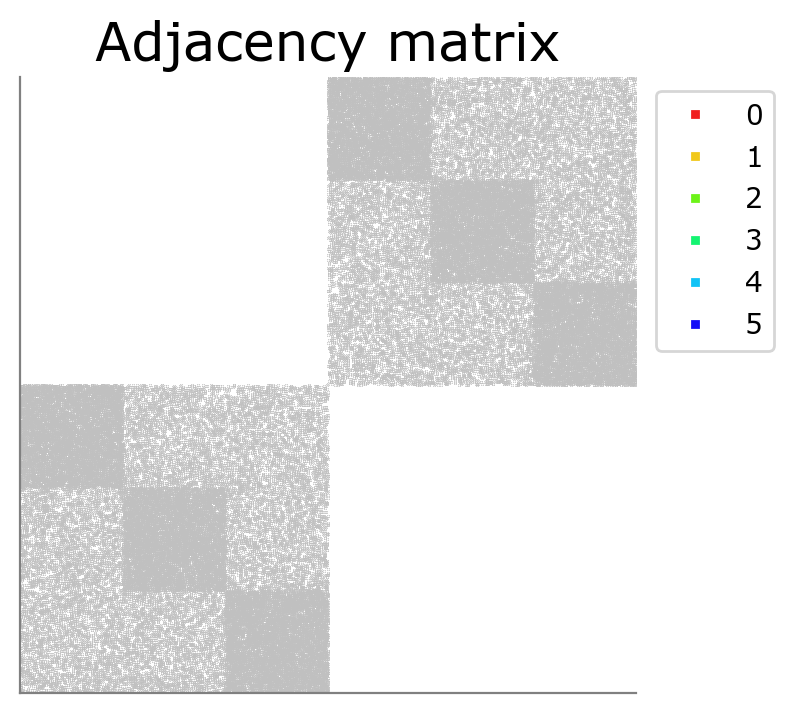

In [19]:
cm_for_bipartite_network(delta=0.006, d=15, n1=n1, k1=k1)

In [4]:
# For big n
n1 = n2 = 3000
k1 = k2 = 3
WithlambdaB = True
Htype = 0
fileID = 'amiExp24.3.4' + f'_n1={n1}n2={n2}_k1={k1}k2={k2}_{"lambda" if WithlambdaB else ""}_givenNumgroups_HHT'
load_path = "./result/detectabilityBipartite/" + fileID + ".txt"
plot_ds, plot_deltas, results, lambdas = read_exp(load_path=load_path, WithlambdaB=WithlambdaB, num_result=4)
BBT_ami, BBT_num_group, BTB_ami, BTB_num_group = \
results[0], results[1], results[2], results[3]

min A ami=0.38586 max A ami=1.0
min AA ami=0.385685 max AA ami=1.0
Range of SNR_A is min=10.0, max=30.0
Range of SNR_AA is min=0.03333333333333333, max=0.3
Range of SNR_HHT is min=3.888000000000001e-10, max=0.03333333333333333
Range of TEST is min=-inf, max=-inf


C:\Users\24391\AppData\Local\Temp\ipykernel_15532\2784705188.py:51: RuntimeWarning: overflow encountered in power
  contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1**2 * (k1 - (k1 - 1 / k1 * lambdas[:, 0]**2) ** n1), z_center=1, return_gridz=True),
D:\Work\PhD\_code\_nodeclassification\_FigureJiazeHelper.py:130: RuntimeWarning: invalid value encountered in scalar subtract
  norm_z[i] = (z[i] - minz) / (z_center - minz) * 0.5
D:\BackProgram\Anaconda\envs\network\Lib\site-packages\matplotlib\contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
D:\BackProgram\Anaconda\envs\network\Lib\site-packages\matplotlib\contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


min H ami=0.0 max H ami=1.0
min Ahalf ami=5.000000000000013e-06 max Ahalf ami=1.0
min AAhalf ami=0.0 max AAhalf ami=1.0
min BBT ami=1e-05 max BBT ami=1.0
min BTB ami=0.0 max BTB ami=1.0


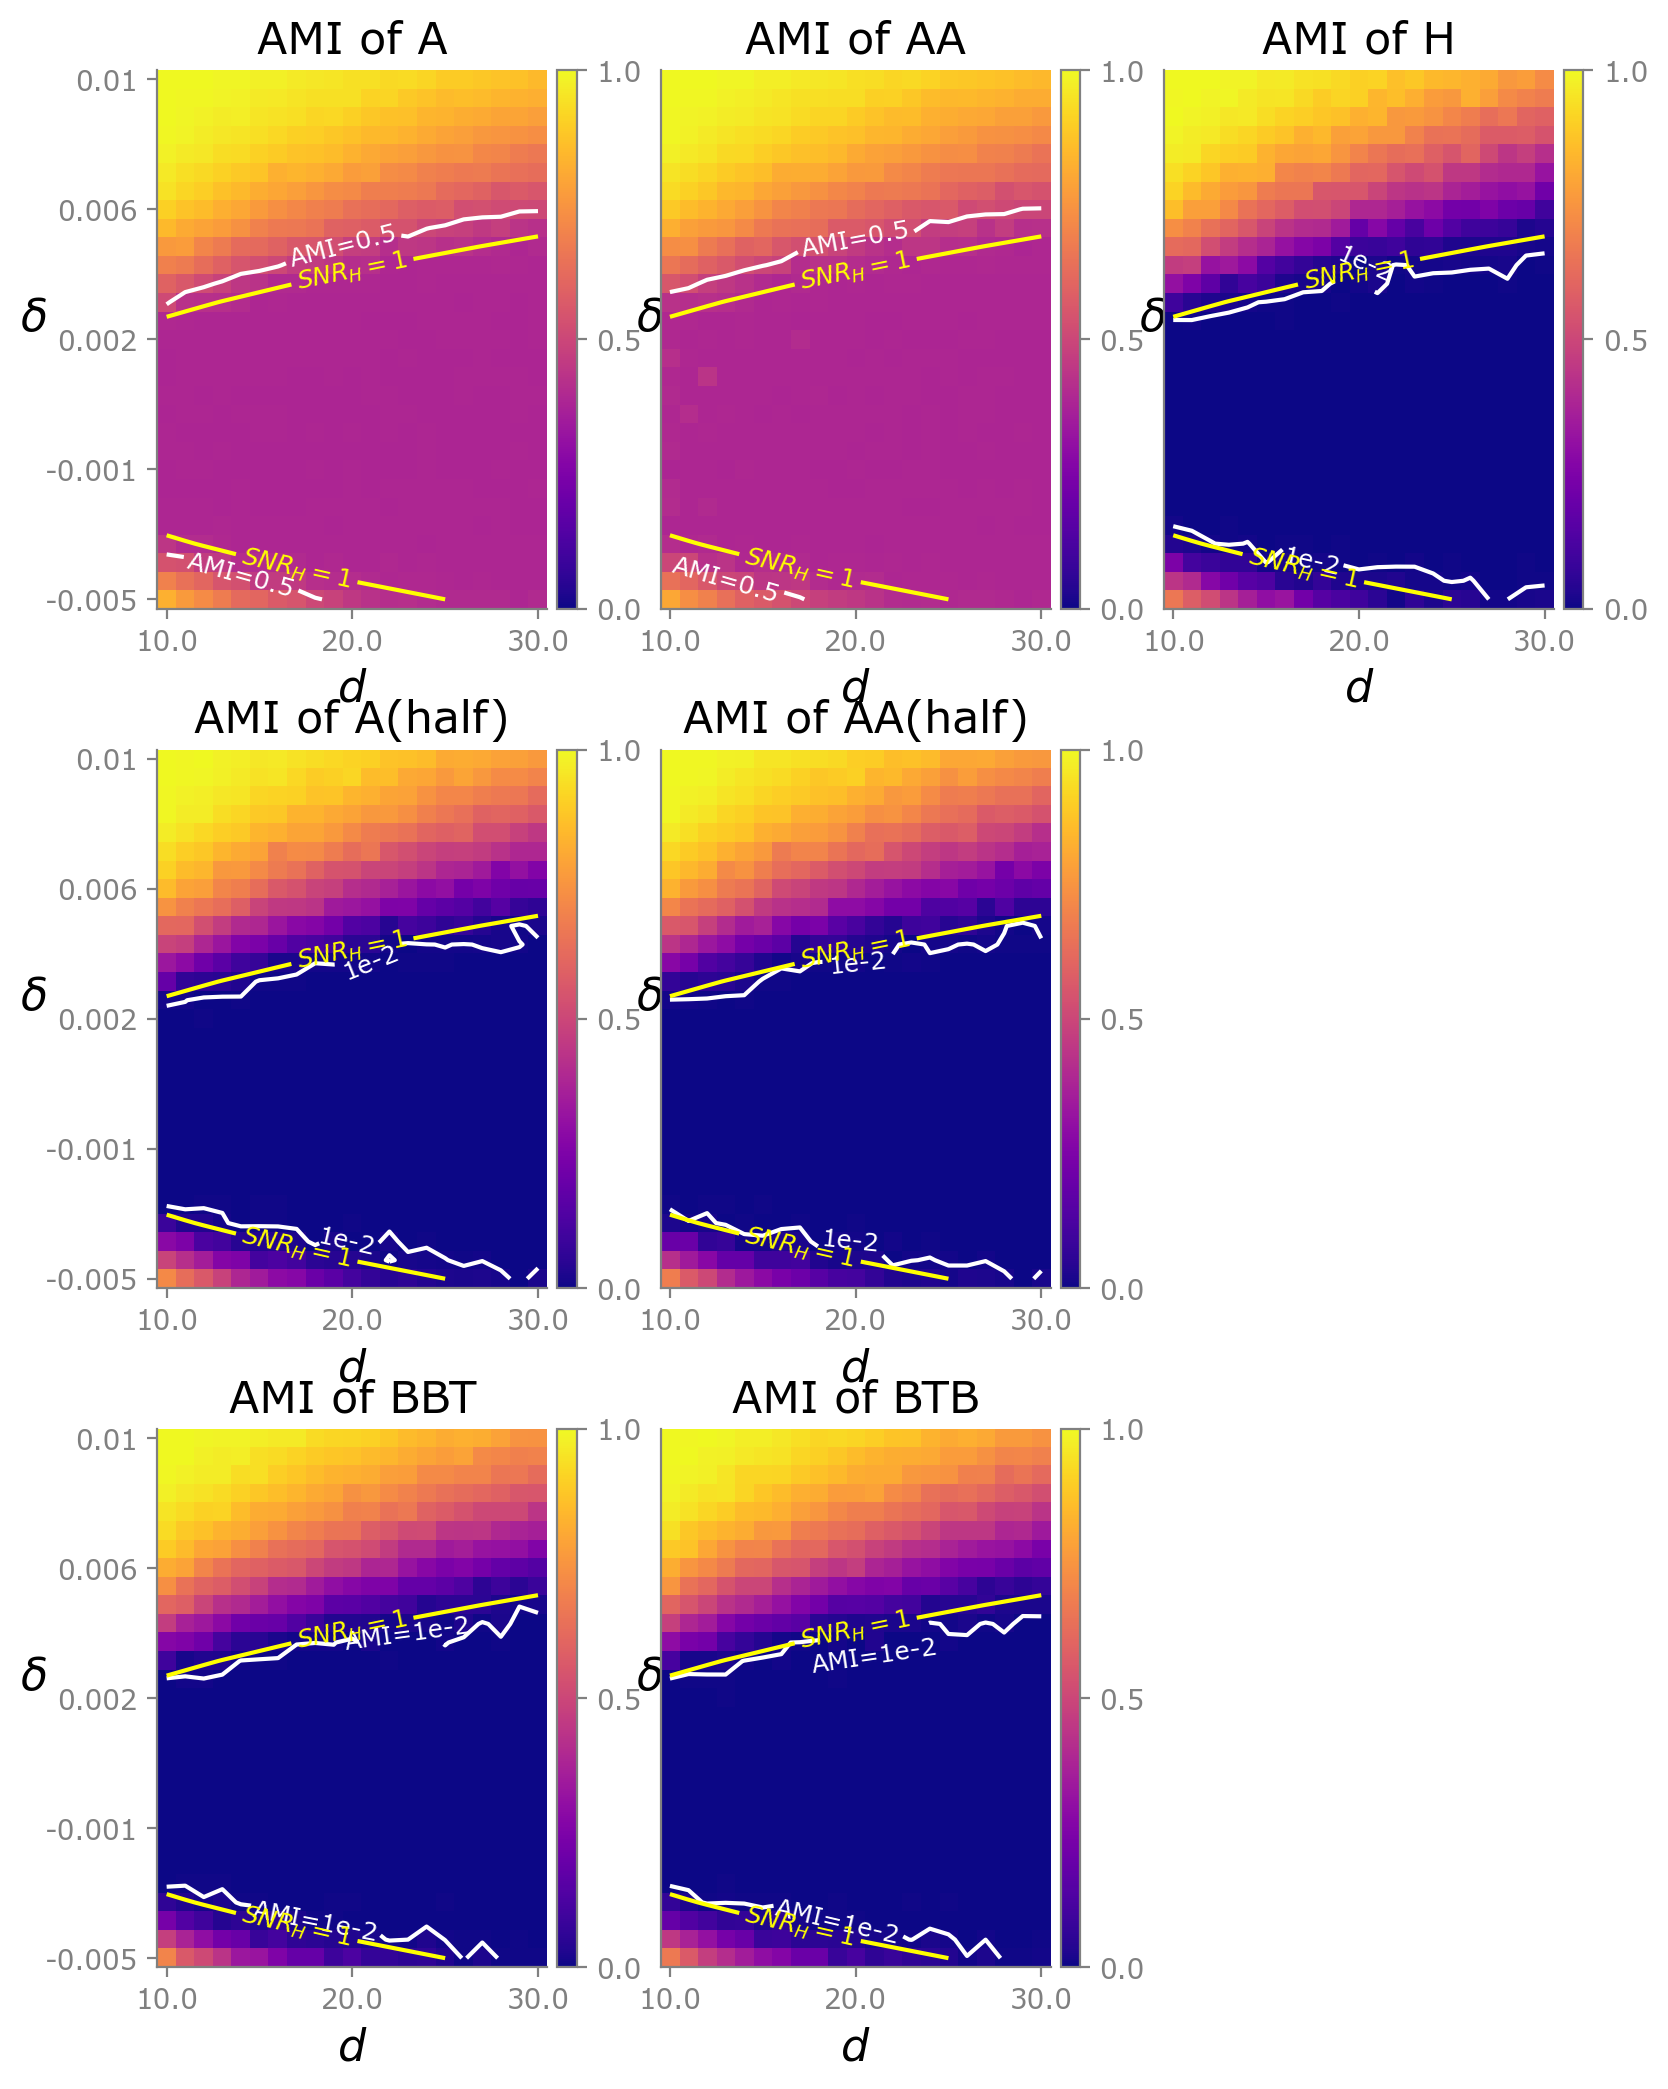

In [7]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(9.2, 12.5))
widths = [3, 3, 3]
heights = [3, 3, 3]
spec5 = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)

row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_Aami = color_imshow_2d(plot_ds, plot_deltas, A_ami, z_center=zcenter, title="AMI of A", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
print(f'min A ami={np.min(np.abs(A_ami))} max A ami={np.max(np.abs(A_ami))}')

contour_data(plot_Aami, ax, levels=[0.5], fmt={0.5: r'AMI=0.5'}, color='white', inline=True)
# contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$SNR_A=1$'}, color='red', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)
# handels = []
# handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
# plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
# plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
# plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
# handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
# handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
# handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_AAami = color_imshow_2d(plot_ds, plot_deltas, AA_ami, z_center=zcenter, title="AMI of AA", xlabel=r'$d$', ylabel=r'$\delta$', 
                             min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
print(f'min AA ami={np.min(np.abs(AA_ami))} max AA ami={np.max(np.abs(AA_ami))}')
contour_data(plot_AAami, ax, levels=[0.5], fmt={0.5: r'AMI=0.5'}, color='white', inline=True)
print("Range of SNR_A is ", end="")
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_A=1$'}, color='red', inline=True, printrange=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)
print("Range of SNR_AA is ", end="")
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1**2 *  lambdas[:, 0]**2, z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_AA=1$'}, color='black', inline=True, printrange=True)
print("Range of SNR_HHT is ", end="")
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1**2 * lambdas[:, 1]**4 / lambdas[:, 0]**2, z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_HHT=1$'}, color='black', inline=True, printrange=True)

# TEST
print("Range of TEST is ", end="")
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * (1 - (1 - 1 / (k1**2) * lambdas[:, 0]**2) ** n1), z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_HHT=1$'}, color='black', inline=True, printrange=True)


row = 0
col = 2
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_Hami = color_imshow_2d(plot_ds, plot_deltas, H_ami, z_center=zcenter, title="AMI of H", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
print(f'min H ami={np.min(np.abs(H_ami))} max H ami={np.max(np.abs(H_ami))}')
contour_data(plot_Hami, ax, levels=[1e-2], fmt={1e-2: r'1e-2'}, color='white', inline=True)
# contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$SNR_A=1$'}, color='red', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)


row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_Ahalfami = color_imshow_2d(plot_ds, plot_deltas, Ahalf_ami, z_center=zcenter, title="AMI of A(half)", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
print(f'min Ahalf ami={np.min(np.abs(Ahalf_ami))} max Ahalf ami={np.max(np.abs(Ahalf_ami))}')
contour_data(plot_Ahalfami, ax, levels=[1e-2], fmt={1e-2: r'1e-2'}, color='white', inline=True)
# contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$SNR_A=1$'}, color='red', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)

row = 1
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_AAhalfami = color_imshow_2d(plot_ds, plot_deltas, AAhalf_ami, z_center=zcenter, title="AMI of AA(half)", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
print(f'min AAhalf ami={np.min(np.abs(AAhalf_ami))} max AAhalf ami={np.max(np.abs(AAhalf_ami))}')
contour_data(plot_AAhalfami, ax, levels=[1e-2], fmt={1e-2: r'1e-2'}, color='white', inline=True)
# contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$SNR_A=1$'}, color='red', inline=True)
# contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)

row = 2
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_BBTami = color_imshow_2d(plot_ds, plot_deltas, BBT_ami, z_center=zcenter, title="AMI of BBT", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
print(f'min BBT ami={np.min(np.abs(BBT_ami))} max BBT ami={np.max(np.abs(BBT_ami))}')

contour_data(plot_BBTami, ax, levels=[1e-2], fmt={1e-2: r'AMI=1e-2'}, color='white', inline=True)
# contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$SNR_A=1$'}, color='red', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)

row = 2
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_BTBami = color_imshow_2d(plot_ds, plot_deltas, BTB_ami, z_center=zcenter, title="AMI of BTB", xlabel=r'$d$', ylabel=r'$\delta$', 
                             min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
print(f'min BTB ami={np.min(np.abs(BTB_ami))} max BTB ami={np.max(np.abs(BTB_ami))}')
contour_data(plot_BTBami, ax, levels=[1e-2], fmt={1e-2: r'AMI=1e-2'}, color='white', inline=True)
# print("Range of SNR_A is ", end="")
# contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$SNR_A=1$'}, color='red', inline=True, printrange=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_H=1$'}, color='yellow', inline=True)
# print("Range of SNR_AA is ", end="")
# contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1**2 *  lambdas[:, 0]**2, z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$SNR_AA=1$'}, color='black', inline=True, printrange=True)
# print("Range of SNR_HHT is ", end="")
# contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1**2 * lambdas[:, 1]**4 / lambdas[:, 0]**2, z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$SNR_HHT=1$'}, color='black', inline=True, printrange=True)

In [20]:
print(f'min BBT #group={np.min(np.abs(BBT_num_group))} max BBT #group={np.max(np.abs(BBT_num_group))}')
print(f'min BTB #group={np.min(np.abs(BTB_num_group))} max BTB #group={np.max(np.abs(BTB_num_group))}')

min BBT #group=3.0 max BBT #group=3.0
min BTB #group=3.0 max BTB #group=3.0


array([[ 1.58050e-02,  6.41150e-02,  5.54900e-02,  5.15050e-02,
         5.35450e-02,  2.19500e-02,  3.64200e-02,  8.72550e-02,
         1.05500e-02,  7.24000e-02, -1.72650e-02, -2.75000e-03,
        -2.25550e-02,  1.54000e-03, -2.49500e-02, -9.20000e-03,
         1.55650e-02, -5.75000e-04,  1.08600e-02, -1.81000e-03,
         1.34300e-02],
       [ 1.53700e-02,  4.19800e-02,  5.91150e-02,  4.22000e-02,
         5.72250e-02,  2.85700e-02,  2.11650e-02,  4.37700e-02,
        -2.91000e-03,  3.65000e-03,  1.00850e-02, -1.32000e-03,
         3.95000e-04,  7.18500e-03, -1.38350e-02,  1.89500e-03,
        -2.22500e-03,  2.15000e-03,  1.75000e-04, -2.14000e-03,
         8.75000e-04],
       [ 5.25950e-02,  1.07815e-01,  2.48500e-02,  6.39700e-02,
        -1.28000e-02,  9.81000e-03, -2.27450e-02,  5.09000e-03,
        -6.28500e-03,  1.64650e-02,  6.65000e-04, -1.11000e-03,
         1.48700e-02, -1.01500e-03,  5.47500e-03,  1.92500e-03,
        -2.72000e-03, -3.19500e-03, -4.05000e-04, -2.30500

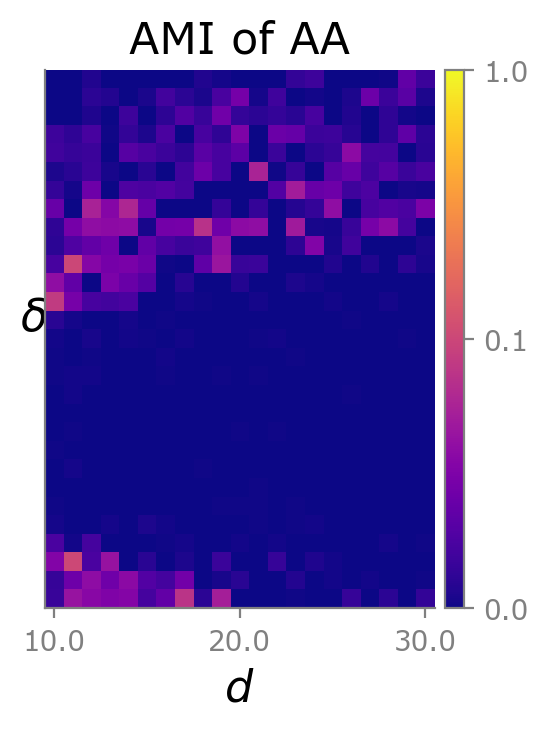

In [9]:
fig = plt.figure(figsize=(9.2, 12.5))
widths = [3, 3, 3]
heights = [3, 3, 3]
spec5 = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)

row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
_ = color_imshow_2d(plot_ds, plot_deltas, Ahalf_ami-BBT_ami, z_center=0.1, title="AMI of AA", xlabel=r'$d$', ylabel=r'$\delta$', 
                             min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)

In [10]:
print(np.min(Ahalf_ami-BBT_ami), np.max(Ahalf_ami-BBT_ami))

-0.06844 0.107815


In [21]:
n1 = 3000
k1 = 3
d = 25
min_delta, max_delta = range_delta(n1, k1, d)
print(f'Range of delta ({min_delta}, {max_delta})')
delta = 0.02
pBo = d / n1 - delta / k1
pBd = pBo + delta
bsbm = symmetric_bipartite(n1, k1, pBd, pBo)
A = bsbm.A
AA = bsbm.A.dot(bsbm.A)
AA_WBHpartition, AA_WBHnumgroups = CommunityDetect(AA).BetheHessian(weighted=True)
AAconfusionMatrix, _ = get_confusionmatrix(bsbm.groupId, AA_WBHpartition, k1 * 2, AA_WBHnumgroups)
print(f'd={d}, delta={delta} AA AMI is {adjusted_mutual_info_score(bsbm.groupId, AA_WBHpartition)}, Confusion Matrix is\n {AAconfusionMatrix}')

Range of delta (-0.0125, 0.025)
r=25.385803119066374, Weighted BH build.
r=-25.385803119066374, Weighted BH build.
Try first 100 eigenvalue...
Try first 1000 eigenvalue...
Try first 5999 eigenvalue...
Try first 100 eigenvalue...
Try first 1000 eigenvalue...
Try first 5999 eigenvalue...


KeyboardInterrupt: 

In [3]:
# For big n
n1 = n2 = 3000
k1 = k2 = 3
WithlambdaB = True
fileID = 'amiExp24.3.6' + f'_n1={n1}n2={n2}_k1={k1}k2={k2}_{"lambda" if WithlambdaB else ""}_givenNumgroups_modifyWBH'
load_path = "./result/detectabilityBipartite/" + fileID + ".txt"
plot_ds, plot_deltas, results, lambdas = read_exp(load_path=load_path, WithlambdaB=WithlambdaB, num_result=14)
A_ami, A_num_group, Ahalf_ami, Ahalf_num_group, AA_ami, AA_num_group, AAhalf_ami, AAhalf_num_group, H_ami, H_num_group, BBT_ami, BBT_num_group, BTB_ami, BTB_num_group = \
results[0], results[1], results[2], results[3],results[4],results[5],results[6],results[7],results[8],results[9],results[10],results[11],results[12],results[13]

min A ami=0.386111 max A ami=1.0
min AA ami=0.38631000000000004 max AA ami=1.0
Range of SNR_A is min=9.999999999999998, max=30.000000000000007
Range of SNR_AA is min=0.03333333333333332, max=0.3000000000000001
Range of SNR_HHT is min=3.888e-10, max=0.033333333333333326
min H ami=3.0000000000000187e-06 max H ami=1.0
min Ahalf ami=1.0000000000000002e-06 max Ahalf ami=1.0
min AAhalf ami=2.0000000000000025e-06 max AAhalf ami=1.0
min BBT ami=6.776263578034403e-22 max BBT ami=1.0
min BTB ami=9.999999999999917e-07 max BTB ami=1.0


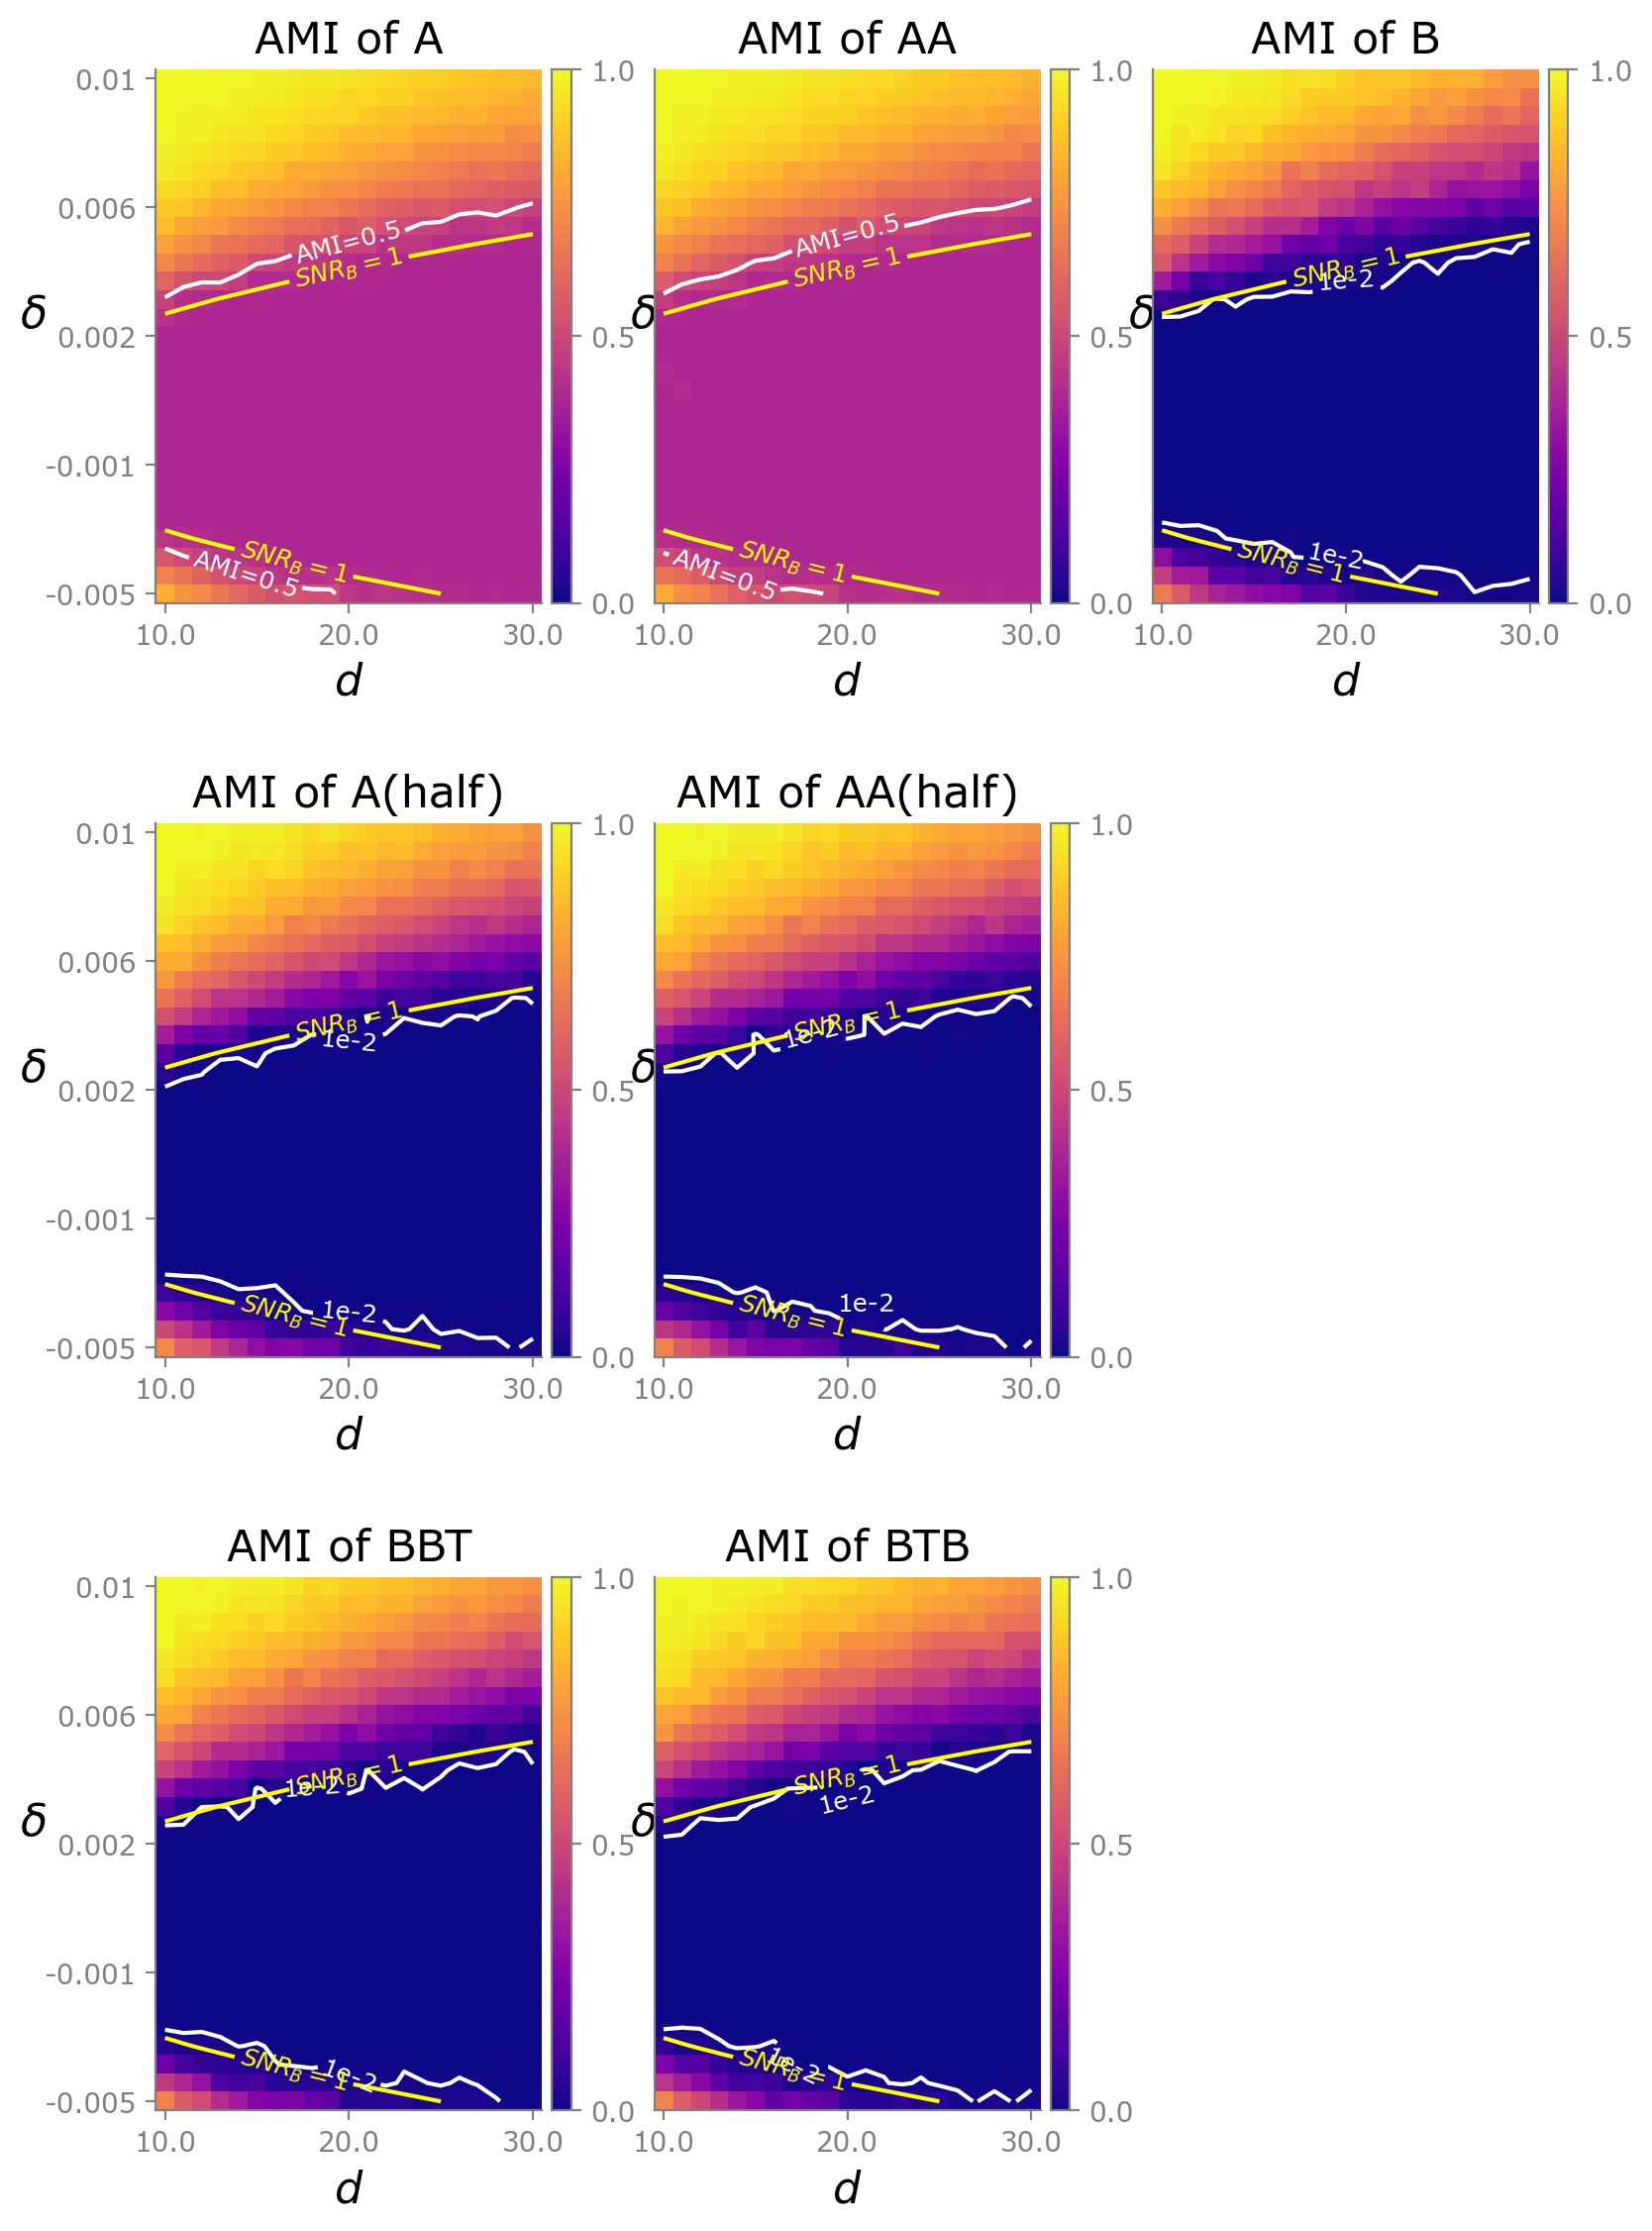

In [6]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(9.2, 14))
widths = [3, 3, 3]
heights = [3, 3, 3]
spec5 = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_Aami = color_imshow_2d(plot_ds, plot_deltas, A_ami, z_center=zcenter, title="AMI of A", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
print(f'min A ami={np.min(np.abs(A_ami))} max A ami={np.max(np.abs(A_ami))}')
contour_data(plot_Aami, ax, levels=[0.5], fmt={0.5: r'AMI=0.5'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_B=1$'}, color='yellow', inline=True)

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_AAami = color_imshow_2d(plot_ds, plot_deltas, AA_ami, z_center=zcenter, title="AMI of AA", xlabel=r'$d$', ylabel=r'$\delta$', 
                             min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
print(f'min AA ami={np.min(np.abs(AA_ami))} max AA ami={np.max(np.abs(AA_ami))}')
contour_data(plot_AAami, ax, levels=[0.5], fmt={0.5: r'AMI=0.5'}, color='white', inline=True)
print("Range of SNR_A is ", end="")
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_A=1$'}, color='red', inline=True, printrange=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_B=1$'}, color='yellow', inline=True)
print("Range of SNR_AA is ", end="")
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1**2 *  lambdas[:, 0]**2, z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_AA=1$'}, color='black', inline=True, printrange=True)
print("Range of SNR_HHT is ", end="")
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1**2 * lambdas[:, 1]**4 / lambdas[:, 0]**2, z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_HHT=1$'}, color='black', inline=True, printrange=True)


row = 0
col = 2
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_Hami = color_imshow_2d(plot_ds, plot_deltas, H_ami, z_center=zcenter, title="AMI of B", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
print(f'min H ami={np.min(np.abs(H_ami))} max H ami={np.max(np.abs(H_ami))}')
contour_data(plot_Hami, ax, levels=[1e-2], fmt={1e-2: r'1e-2'}, color='white', inline=True)
# contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$SNR_A=1$'}, color='red', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_B=1$'}, color='yellow', inline=True)


row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_Ahalfami = color_imshow_2d(plot_ds, plot_deltas, Ahalf_ami, z_center=zcenter, title="AMI of A(half)", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
print(f'min Ahalf ami={np.min(np.abs(Ahalf_ami))} max Ahalf ami={np.max(np.abs(Ahalf_ami))}')
contour_data(plot_Ahalfami, ax, levels=[1e-2], fmt={1e-2: r'1e-2'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_B=1$'}, color='yellow', inline=True)

row = 1
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_AAhalfami = color_imshow_2d(plot_ds, plot_deltas, AAhalf_ami, z_center=zcenter, title="AMI of AA(half)", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
print(f'min AAhalf ami={np.min(np.abs(AAhalf_ami))} max AAhalf ami={np.max(np.abs(AAhalf_ami))}')
contour_data(plot_AAhalfami, ax, levels=[1e-2], fmt={1e-2: r'1e-2'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_B=1$'}, color='yellow', inline=True)

row = 2
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_BBTami = color_imshow_2d(plot_ds, plot_deltas, BBT_ami, z_center=zcenter, title="AMI of BBT", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
print(f'min BBT ami={np.min(np.abs(BBT_ami))} max BBT ami={np.max(np.abs(BBT_ami))}')
contour_data(plot_BBTami, ax, levels=[1e-2], fmt={1e-2: r'1e-2'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_B=1$'}, color='yellow', inline=True)

row = 2
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
plot_BTBami = color_imshow_2d(plot_ds, plot_deltas, BTB_ami, z_center=zcenter, title="AMI of BTB", xlabel=r'$d$', ylabel=r'$\delta$', 
                            min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=0, vmax=1, ytickprecision=3)
print(f'min BTB ami={np.min(np.abs(BTB_ami))} max BTB ami={np.max(np.abs(BTB_ami))}')
contour_data(plot_BTBami, ax, levels=[1e-2], fmt={1e-2: r'1e-2'}, color='white', inline=True)
contour_data(color_imshow_2d(plot_ds, plot_deltas, n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0], z_center=1, return_gridz=True),
             ax, levels=[1], fmt={1: r'$SNR_B=1$'}, color='yellow', inline=True)
# plt.subplots_adjust(wspace=0.8)
save_path = "./_Figure/Bipartite/" + "FigureBipartiteAMISNR_" + f'n1_{n1}_n2_{n2}_k1_{k1}_k2_{k2}' + ".png"
# # plt.tight_layout()
plt.savefig(save_path, dpi=600, bbox_inches='tight')

# Asymmetric Htype=1 (k1=3,k2=4)

In [15]:
n1 = 3000
n2 = 4000
k1 = 3
k2 = 4
delta = -0.005
d = 10
p = (7 * d) / (8 * n1) + delta / 2
q = (7 * d) / (8 * n1) - delta / 2
p = np.around(p, 5)
q = np.around(q, 5)
min_delta, max_delta = generate_delta_range(n1, n2, k1, k2, d, Htype=1)
print(f'--For asymmetric case k1={k1} k2={k2}, d={d}, Range of delta ({min_delta}, {max_delta}). '
      f'Now delta={delta} which make p_diagonal_B={p}, p_offdiagonal_B={q}')
# Construct bipartite graph
sizes = [int(n1 / k1)] * k1 + [int(n2 / k2)] * k2
H = np.array([[p, p, q, q], [q, p, p, q], [q, q, p, p]])
bsbm = BipartiteSBM(k1, k2, sizes, H)

--For asymmetric case k1=3 k2=4, d=10, Range of delta (-0.005833333333333334, 0.005833333333333334). Now delta=-0.005 which make p_diagonal_B=0.00042, p_offdiagonal_B=0.00542


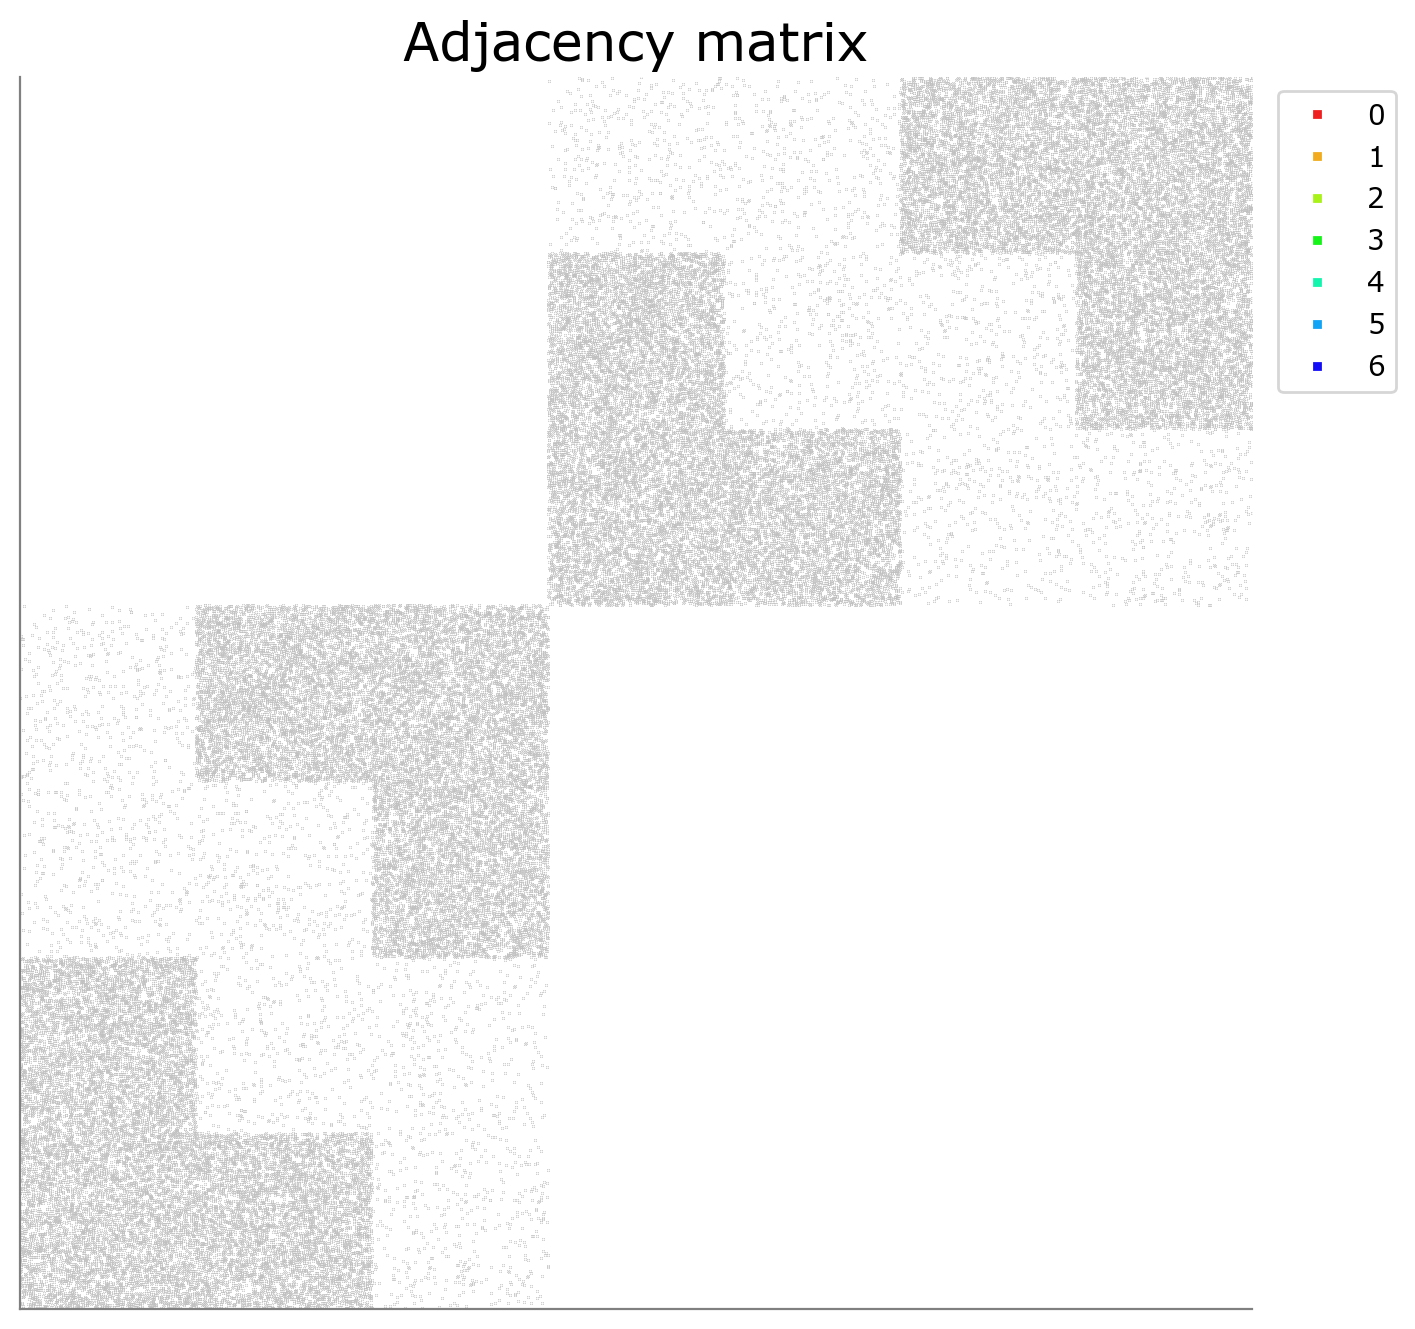

In [17]:
fig = plt.figure(figsize=(8, 8))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
# print(A.sum())
color = gen_colors(start=colors_red[0], end=colors_blue[0], n=len(bsbm.sizes))
plot_block_matrix(bsbm.A.toarray(), partition_names=list(range(len(bsbm.sizes))), partition_counts=bsbm.sizes, colors=color, ms=0.001)

In [18]:
start = time.time()
AA = bsbm.A.dot(bsbm.A)
BTB = AA[n1:, n1:]
BTB_BHpartition, BTB_BHnumgroups = CommunityDetect(BTB).BetheHessian(num_groups=bsbm.k2, weighted=True)
ami = adjusted_mutual_info_score(bsbm.groupId[n1:], BTB_BHpartition)
true_numberpartition = bsbm.k2
node_partition = BTB_BHpartition
node_numberpartition = np.size(np.unique(node_partition))
BTBcm, _ = get_confusionmatrix(bsbm.groupId[n1:], node_partition, true_numberpartition, node_numberpartition)
print(f"BH result in BTB: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(BTBcm)}) is: \n{BTBcm}")

r=10.537006216188733, Weighted BH build.
r=-10.537006216188733, Weighted BH build.
True index is [0 1 2 3], Community detected index is [0 1 2 3]
BH result in BTB: 0.4612727581732064. Time=32.73150444030762. Confusion Matrix((4, 4)) is: 
[[334. 393.   3. 270.]
 [ 14. 953.  14.  19.]
 [ 15.  19. 920.  46.]
 [365.   6. 318. 311.]]


In [23]:
start = time.time()
AA = bsbm.A.dot(bsbm.A)
BBT = AA[:n1, :n1]
BBT_BHpartition, BBT_BHnumgroups = CommunityDetect(BBT).BetheHessian(num_groups=bsbm.k1, weighted=True)
ami = adjusted_mutual_info_score(bsbm.groupId[:n1], BBT_BHpartition)
true_numberpartition = bsbm.k1
node_partition = BBT_BHpartition
node_numberpartition = np.size(np.unique(node_partition))
BBTcm, _ = get_confusionmatrix(bsbm.groupId[:n1], node_partition, true_numberpartition, node_numberpartition)
print(f"BH result in BBT: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(BBTcm)}) is: \n{BBTcm}")

r=11.079500590429758, Weighted BH build.
r=-11.079500590429758, Weighted BH build.
True index is [0 1 2], Community detected index is [0 2 1]
BH result in BBT: 0.5628459115412222. Time=16.954376935958862. Confusion Matrix((3, 3)) is: 
[[922.  78.   0.]
 [165. 665. 170.]
 [  0.  80. 920.]]


In [22]:
lambdas = bsbm.getSingulars()
print(lambdas)
print(f'SNR={n1/k1 * lambdas[1]**2/lambdas[0]}')
print(f'l_3^2/l_1={n1/k1 *lambdas[2]**2/lambdas[0]}')

[0.01058798 0.00707107 0.00390018]
SNR=4.722334390418352
l_3^2/l_1=1.436666267428207


([], [])

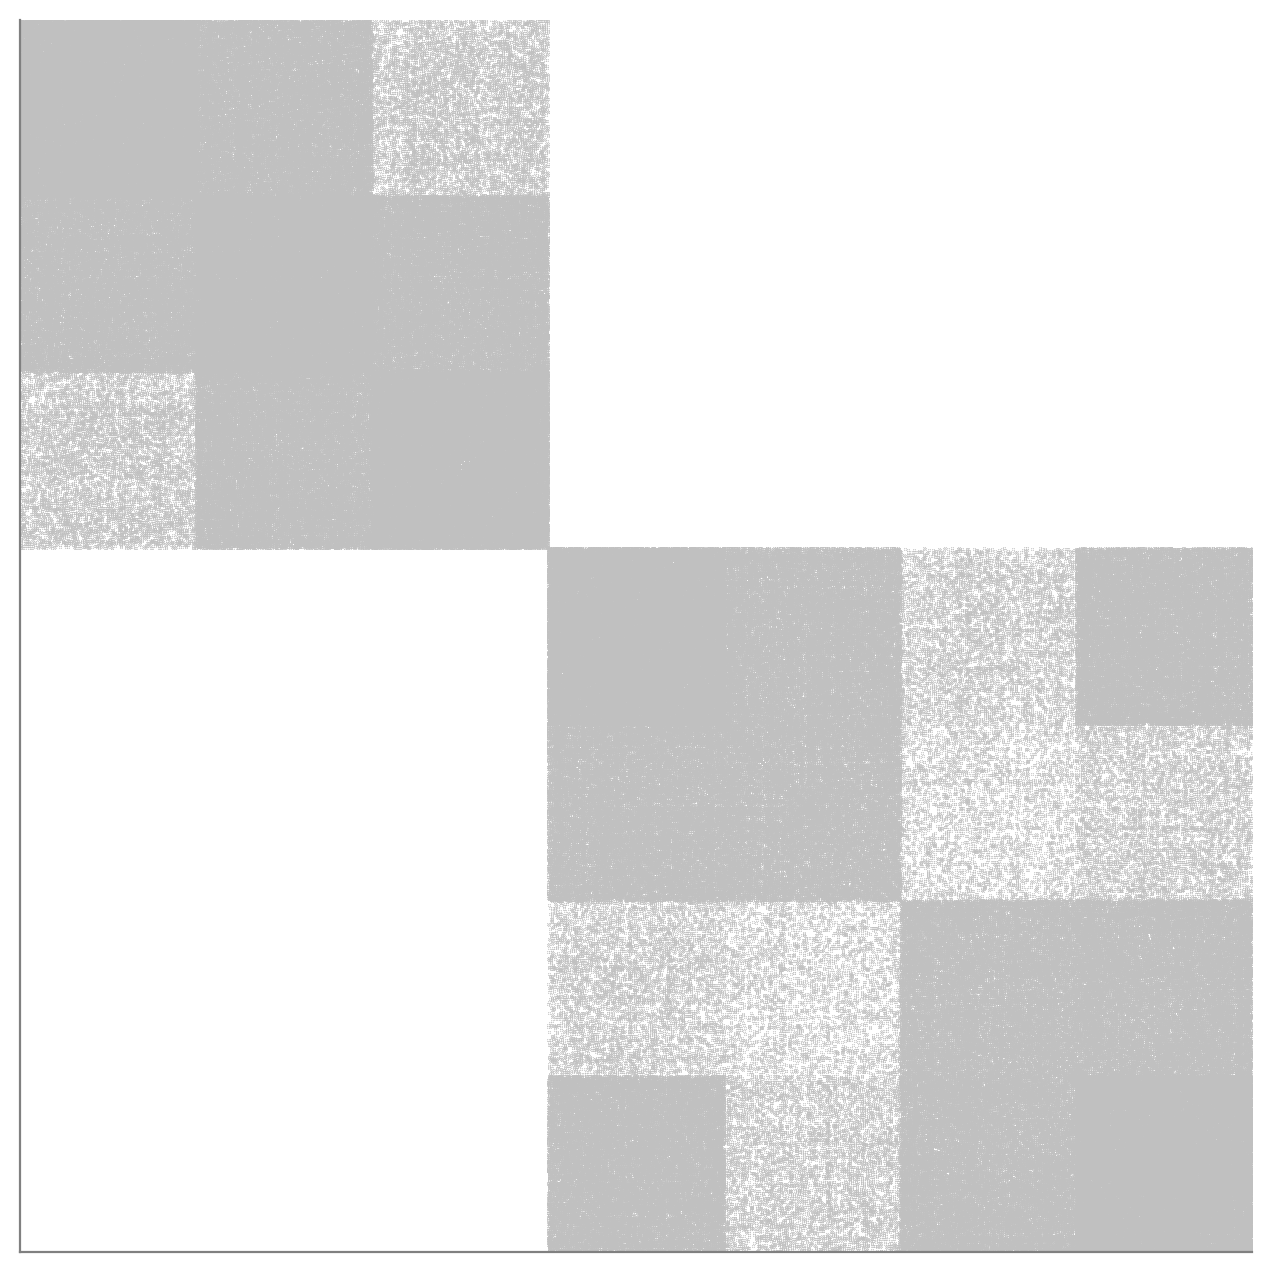

In [20]:
x, y = np.nonzero(AA.toarray())
plotAA = np.zeros(np.shape(AA))
for _x, _y in zip(x, y):
    plotAA[_x, _y] = 1
fig = plt.figure(figsize=(8, 8))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.spy(plotAA, markersize=1e-7, rasterized=True, color=gray)
plt.xticks([])
plt.yticks([])

In [6]:
# For big n
n1 = 3000
n2 = 4000
k1 = 3
k2 = 4
WithlambdaB = True
fileID = 'amiExp24.4.22' + f'_n1={n1}n2={n2}_k1={k1}k2={k2}_{"lambda" if WithlambdaB else ""}_asymmetric_givenNumgroups'
load_path = "./result/detectabilityBipartite/" + fileID + ".txt"
plot_ds, plot_deltas, results, lambdas = read_exp(load_path=load_path, WithlambdaB=WithlambdaB, num_result=16)
A_ami, A_num_group, Ahalf1_ami, Ahalf1_num_group, Ahalf2_ami, Ahalf2_num_group, AA_ami, AA_num_group, AAhalf1_ami, AAhalf1_num_group, AAhalf2_ami, AAhalf2_num_group, BBT_ami, BBT_num_group, BTB_ami, BTB_num_group = \
results[0], results[1], results[2], results[3],results[4],results[5],results[6],results[7],results[8],results[9],results[10],results[11],results[12],results[13], results[14], results[15]

In [9]:
def ami_contour(fig, ax, plot_x, plot_y, ami, addition_contour, ami_contour_value=0.5, zcenter=0.5, ami_label="", add_contour_label="", xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=True):
    cmap = mpl.colormaps["plasma"]
    zcenter = zcenter
    plot_ami = color_imshow_2d(plot_x, plot_y, ami, z_center=zcenter, title=f"AMI of {ami_label}", xlabel=xlabel, ylabel=ylabel, 
                                min_z=0, max_z=1, cmap=cmap, ax=ax, fig=fig, set_yticks=set_yticks, vmin=0, vmax=1, ytickprecision=3)
    print(f'min {ami_label} ami={np.min(np.abs(ami))} max {ami_label} ami={np.max(np.abs(ami))}')
    contour_data(plot_ami, ax, levels=[ami_contour_value], fmt={ami_contour_value: rf'AMI={ami_contour_value}'}, color='white', inline=True)
    contour_data(color_imshow_2d(plot_x, plot_y, addition_contour, z_center=1, return_gridz=True),
                 ax, levels=[1], fmt={1: f'{add_contour_label}=1'}, color='yellow', inline=True)
    contour_data(color_imshow_2d(plot_x, plot_y, addition_contour, z_center=1, return_gridz=True),
                 ax, levels=[2], fmt={2: f'{add_contour_label}=2'}, color='yellow', inline=True)
    contour_data(color_imshow_2d(plot_x, plot_y, addition_contour, z_center=1, return_gridz=True),
                 ax, levels=[3], fmt={3: f'{add_contour_label}=3'}, color='yellow', inline=True)

D:\BackProgram\Anaconda\envs\network\Lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


min A ami=0.350322 max A ami=0.8594060000000001
min Ahalf1 ami=1.9999999999999957e-06 max Ahalf1 ami=0.8305
min Ahalf2 ami=1.999999999999993e-06 max Ahalf2 ami=0.75525
min AA ami=0.35787 max AA ami=0.752012
min AAhalf1 ami=0.0 max AAhalf1 ami=0.7167
min AAhalf2 ami=9.486769009248163e-21 max AAhalf2 ami=0.569422
min BBT ami=5.999999999999999e-06 max BBT ami=0.75723
min BTB ami=0.0 max BTB ami=0.571118


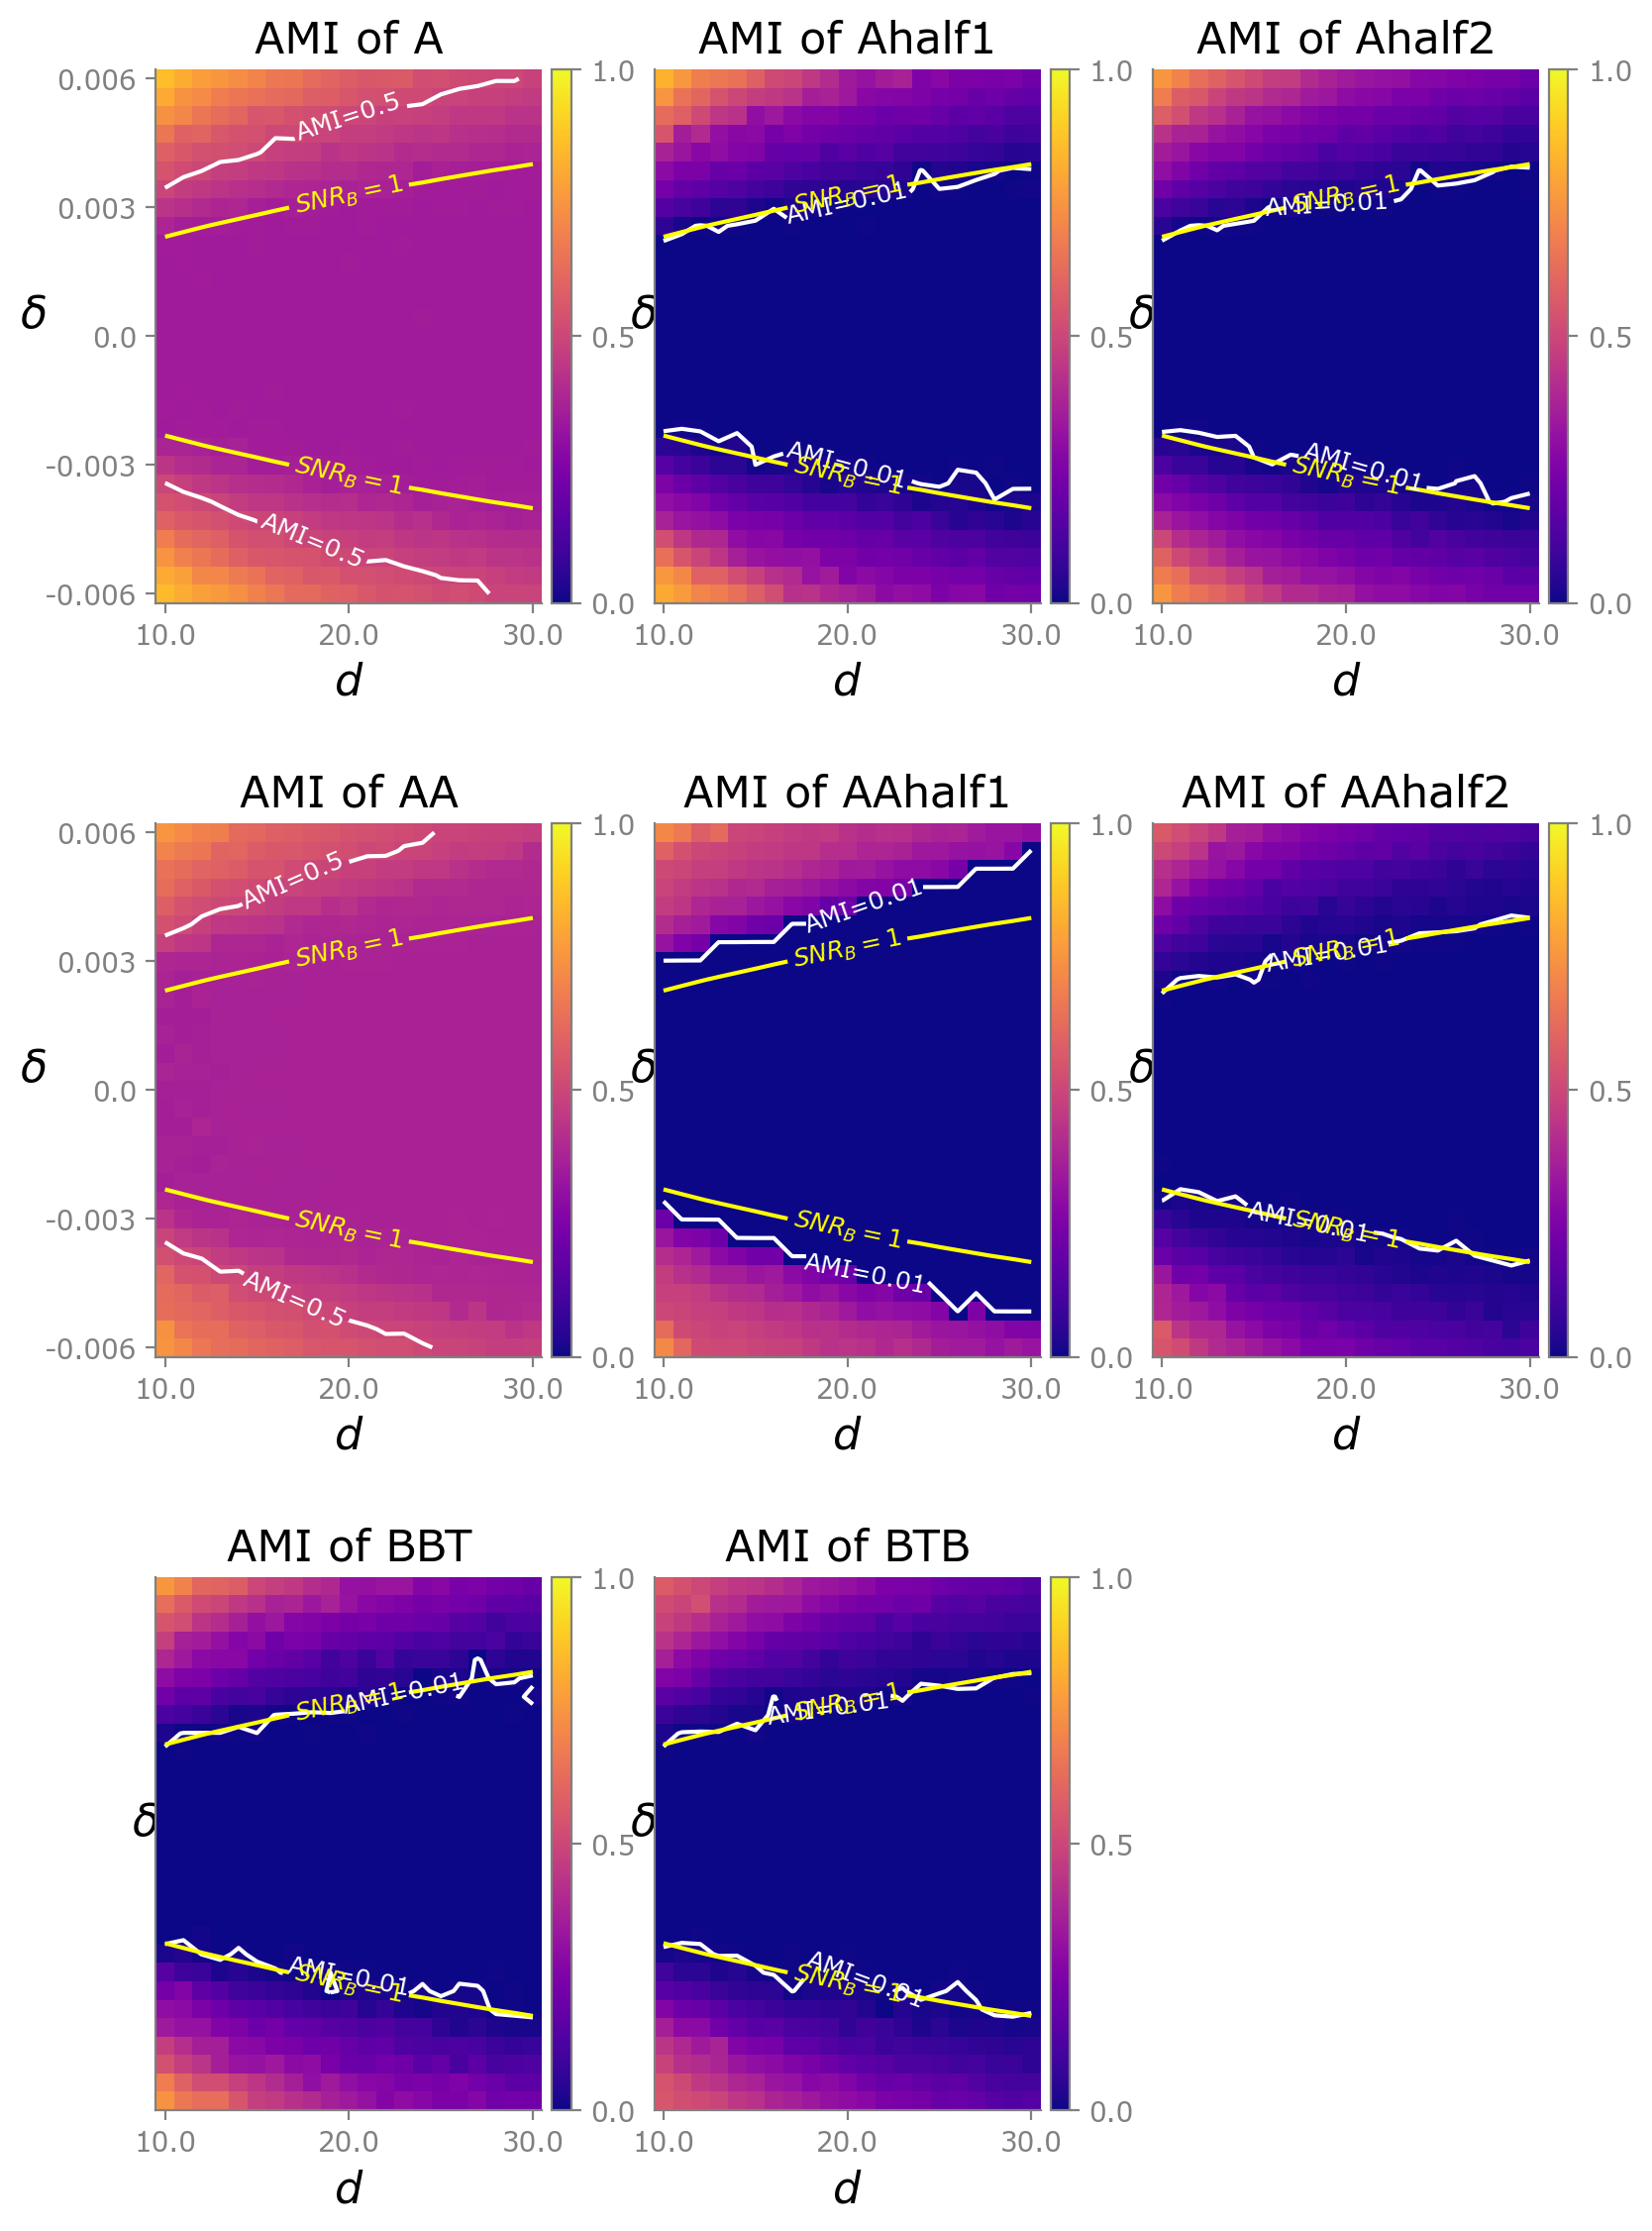

In [8]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(9.2, 14))
widths = [3, 3, 3]
heights = [3, 3, 3]
spec5 = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=A_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=0.5, ami_label="A", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=True)

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=Ahalf1_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="Ahalf1", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)


row = 0
col = 2
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=Ahalf2_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="Ahalf2", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)


row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=AA_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_label="AA", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=True)

row = 1
col = 1
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=AAhalf1_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="AAhalf1", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)

row = 1
col = 2
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=AAhalf2_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="AAhalf2", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)


row = 2
col = 0
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=BBT_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="BBT", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)

row = 2
col = 1
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=BTB_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="BTB", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)

# plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Bipartite/" + "FigureBipartiteAMISNR_" + f'n1_{n1}_n2_{n2}_k1_{k1}_k2_{k2}' + ".png"
# # # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_inches='tight')

In [7]:
def numgroup_contour(fig, ax, plot_x, plot_y, num, addition_contour, num_contour_value=0.5, zcenter=2, num_label="", add_contour_label="", xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=True):
    cmap = mpl.colormaps["cool"]
    zcenter = zcenter
    plot_ = color_imshow_2d(plot_x, plot_y, num, z_center=zcenter, title=f"Num of {num_label}", xlabel=xlabel, ylabel=ylabel, 
                                cmap=cmap, ax=ax, fig=fig, set_yticks=set_yticks, ytickprecision=3)
    print(f'min {num_label} num={np.min(np.abs(num))} max {num_label} num={np.max(np.abs(num))}')
    contour_data(plot_, ax, levels=[num_contour_value], fmt={num_contour_value: rf'NUM={num_contour_value}'}, color='white', inline=True)
    contour_data(color_imshow_2d(plot_x, plot_y, addition_contour, z_center=1, return_gridz=True),
                 ax, levels=[1], fmt={1: f'{add_contour_label}=1'}, color='yellow', inline=True)
    contour_data(color_imshow_2d(plot_x, plot_y, addition_contour, z_center=1, return_gridz=True),
                 ax, levels=[2], fmt={2: f'{add_contour_label}=2'}, color='yellow', inline=True)
    contour_data(color_imshow_2d(plot_x, plot_y, addition_contour, z_center=1, return_gridz=True),
                 ax, levels=[3], fmt={3: f'{add_contour_label}=3'}, color='yellow', inline=True)

min A num=7.0 max A num=7.0
min Ahalf1 num=3.0 max Ahalf1 num=4.0
min Ahalf2 num=4.0 max Ahalf2 num=4.0
min AA num=7.0 max AA num=7.0
min AAhalf1 num=1.0 max AAhalf1 num=4.0
min AAhalf2 num=4.0 max AAhalf2 num=7.0
min BBT num=3.0 max BBT num=3.0
min BTB num=4.0 max BTB num=4.0


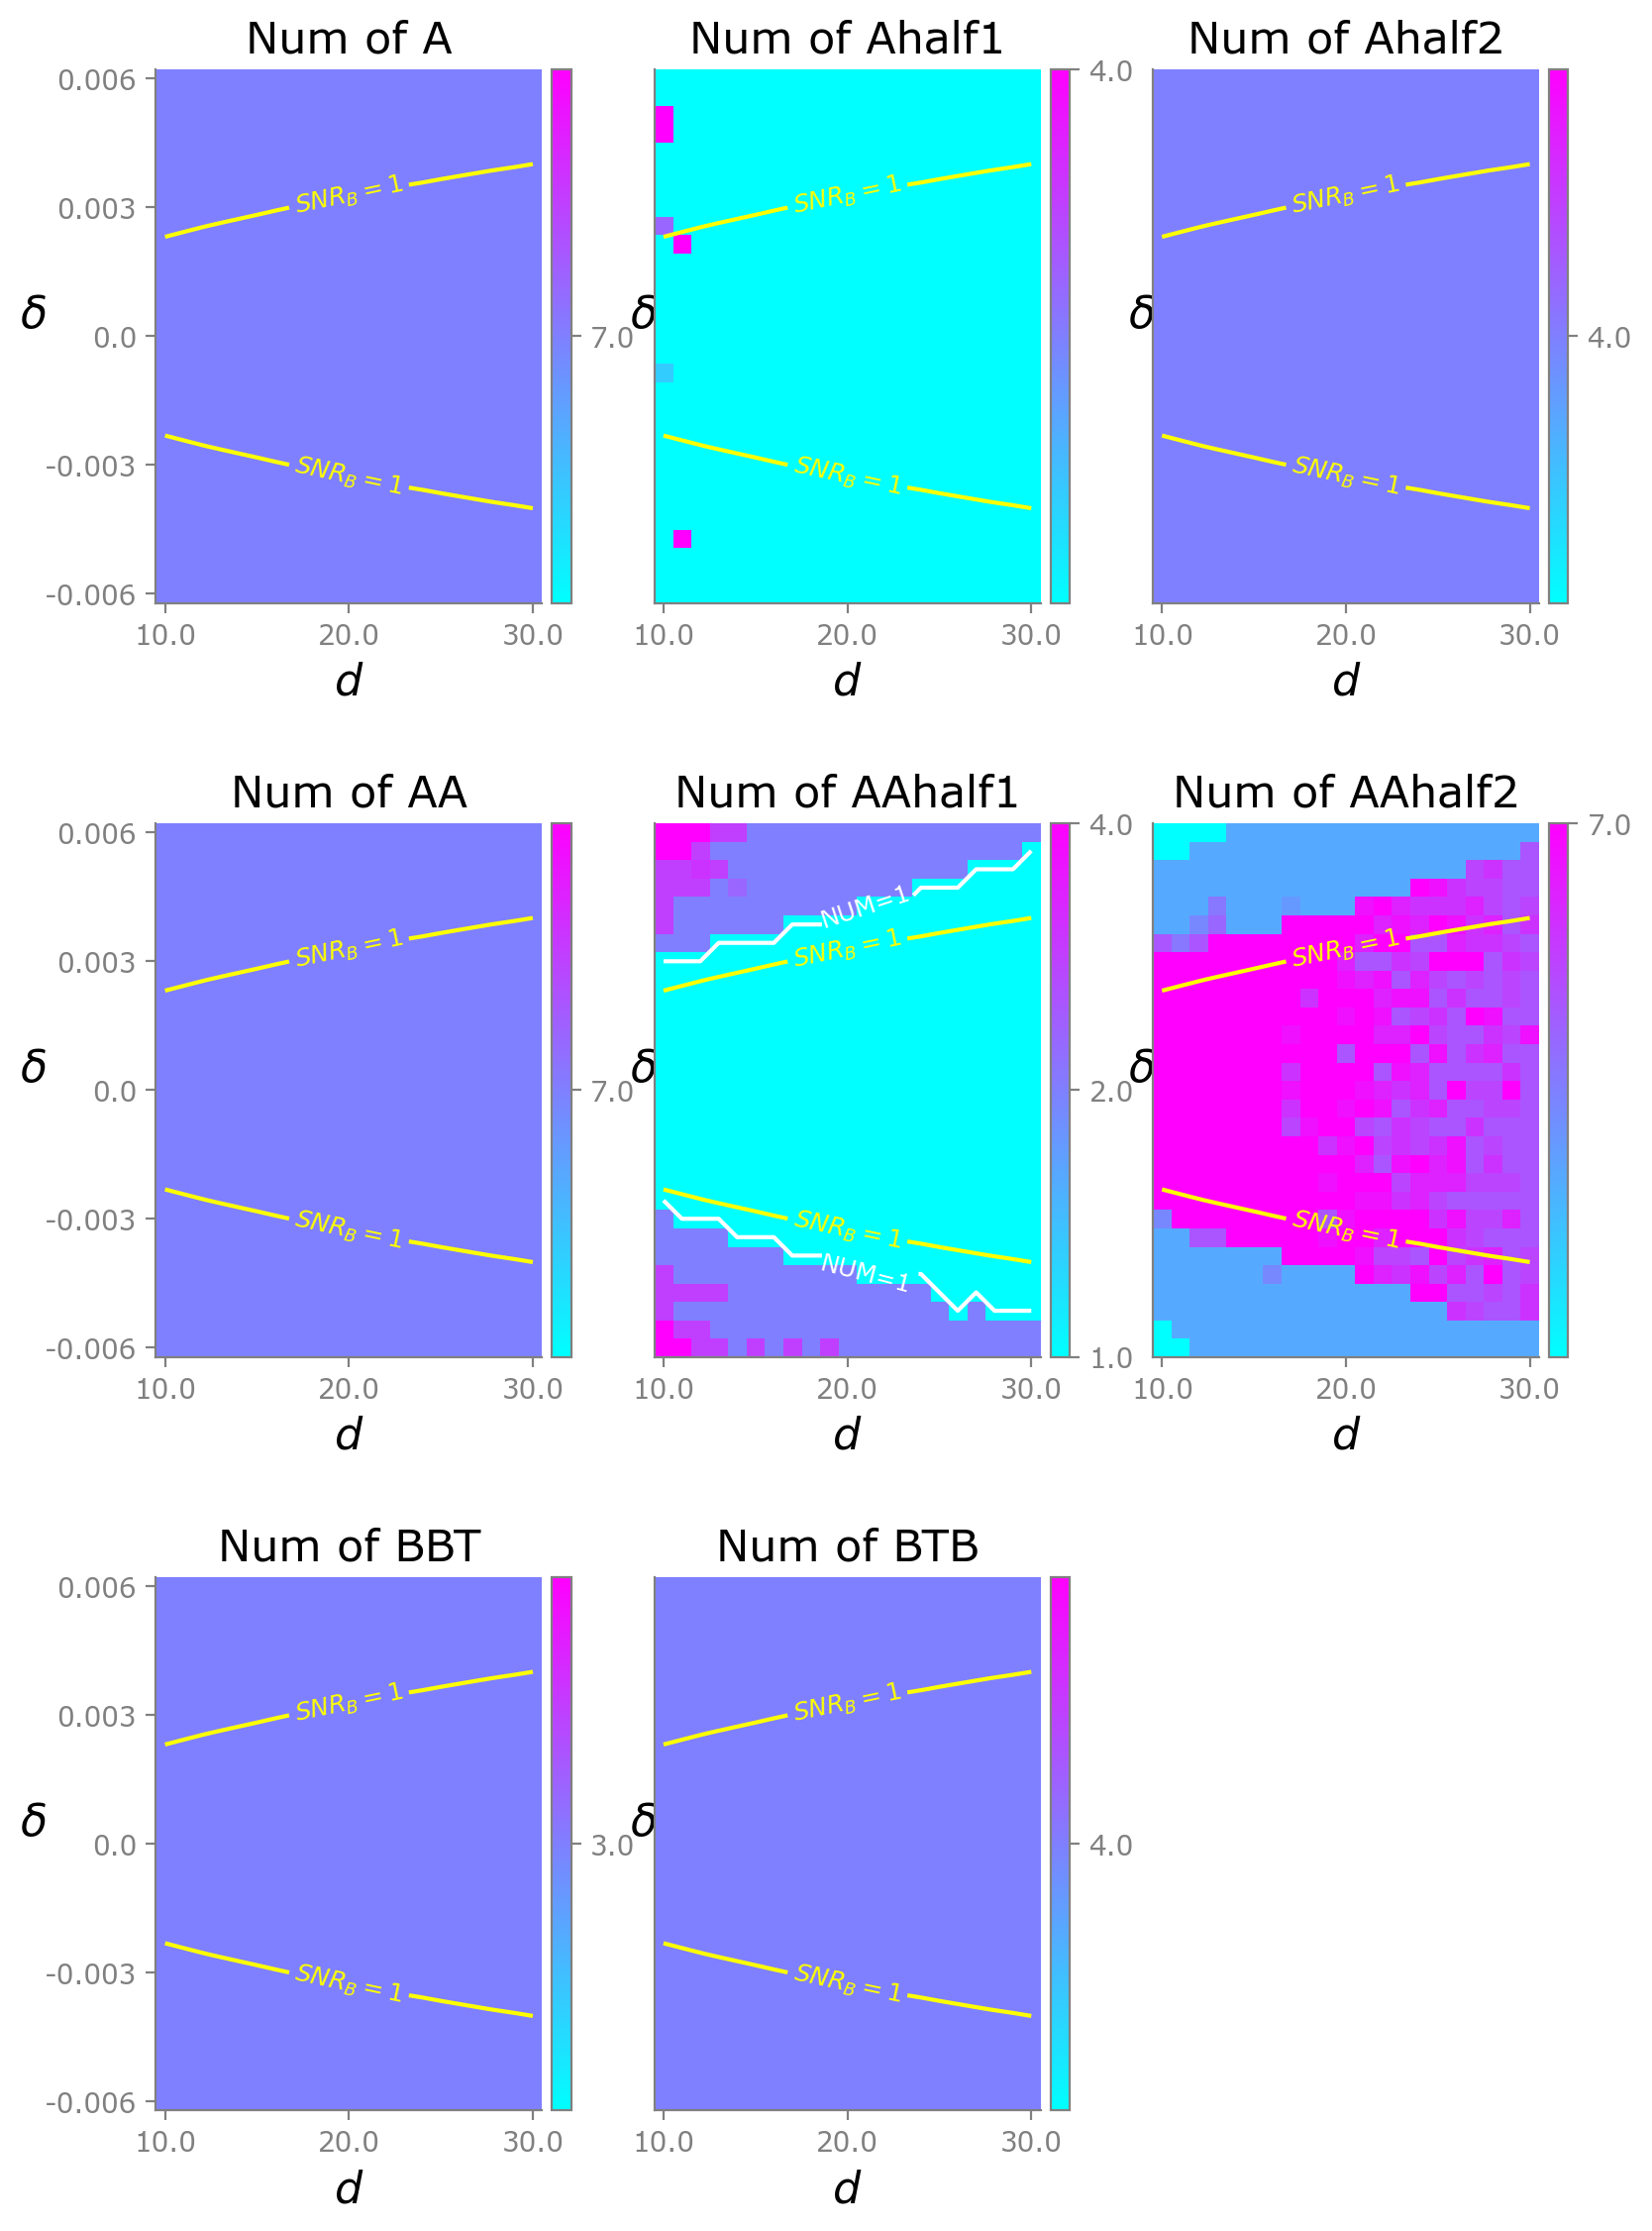

In [10]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(9.2, 14))
widths = [3, 3, 3]
heights = [3, 3, 3]
spec5 = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)
zcenter = 3
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
numgroup_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, num=A_num_group, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , num_contour_value=3, zcenter=zcenter, num_label="A", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=True)

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
numgroup_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, num=Ahalf1_num_group, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , num_contour_value=1, zcenter=1, num_label="Ahalf1", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)


row = 0
col = 2
ax = fig.add_subplot(spec5[row, col])
numgroup_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, num=Ahalf2_num_group, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , num_contour_value=2, zcenter=2, num_label="Ahalf2", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)


row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
numgroup_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, num=AA_num_group, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , num_contour_value=3, zcenter=zcenter, num_label="AA", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=True)

row = 1
col = 1
ax = fig.add_subplot(spec5[row, col])
numgroup_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, num=AAhalf1_num_group, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , num_contour_value=1, zcenter=2, num_label="AAhalf1", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)

row = 1
col = 2
ax = fig.add_subplot(spec5[row, col])
numgroup_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, num=AAhalf2_num_group, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , num_contour_value=1, zcenter=2, num_label="AAhalf2", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)


row = 2
col = 0
ax = fig.add_subplot(spec5[row, col])
numgroup_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, num=BBT_num_group, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , num_contour_value=1, zcenter=2, num_label="BBT", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=True)

row = 2
col = 1
ax = fig.add_subplot(spec5[row, col])
numgroup_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, num=BTB_num_group, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , num_contour_value=1, zcenter=2, num_label="BTB", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)

# plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Bipartite/" + "FigureBipartiteAMISNR_" + f'n1_{n1}_n2_{n2}_k1_{k1}_k2_{k2}' + ".png"
# # # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_inches='tight')

# Asymmetric Htype=2 (k1=4,k2=4)

In [4]:
# For big n
n1 = 4000
n2 = 4000
k1 = 4
k2 = 4
WithlambdaB = True
Htype=2
fileID = 'amiExp24.4.23' + f'_n1={n1}n2={n2}_k1={k1}k2={k2}Htype={Htype}_{"lambda" if WithlambdaB else ""}_asymmetric_givenNumgroups'
load_path = "./result/detectabilityBipartite/" + fileID + ".txt"
plot_ds, plot_deltas, results, lambdas = read_exp(load_path=load_path, WithlambdaB=WithlambdaB, num_result=16)
A_ami, A_num_group, Ahalf1_ami, Ahalf1_num_group, Ahalf2_ami, Ahalf2_num_group, AA_ami, AA_num_group, AAhalf1_ami, AAhalf1_num_group, AAhalf2_ami, AAhalf2_num_group, BBT_ami, BBT_num_group, BTB_ami, BTB_num_group = \
results[0], results[1], results[2], results[3],results[4],results[5],results[6],results[7],results[8],results[9],results[10],results[11],results[12],results[13], results[14], results[15]

D:\BackProgram\Anaconda\envs\network\Lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


min A ami=0.33261 max A ami=0.9569600000000001
min Ahalf1 ami=5.999999999999996e-06 max Ahalf1 ami=0.93582
min Ahalf2 ami=2.0000000000000025e-06 max Ahalf2 ami=0.93514
min AA ami=0.332734 max AA ami=0.950314
min AAhalf1 ami=2e-06 max AAhalf1 ami=0.9233139999999999
min AAhalf2 ami=6e-06 max AAhalf2 ami=0.9294520000000001
min BBT ami=3.999999999999999e-06 max BBT ami=0.9192079999999999
min BTB ami=1.9999999999999986e-06 max BTB ami=0.929098


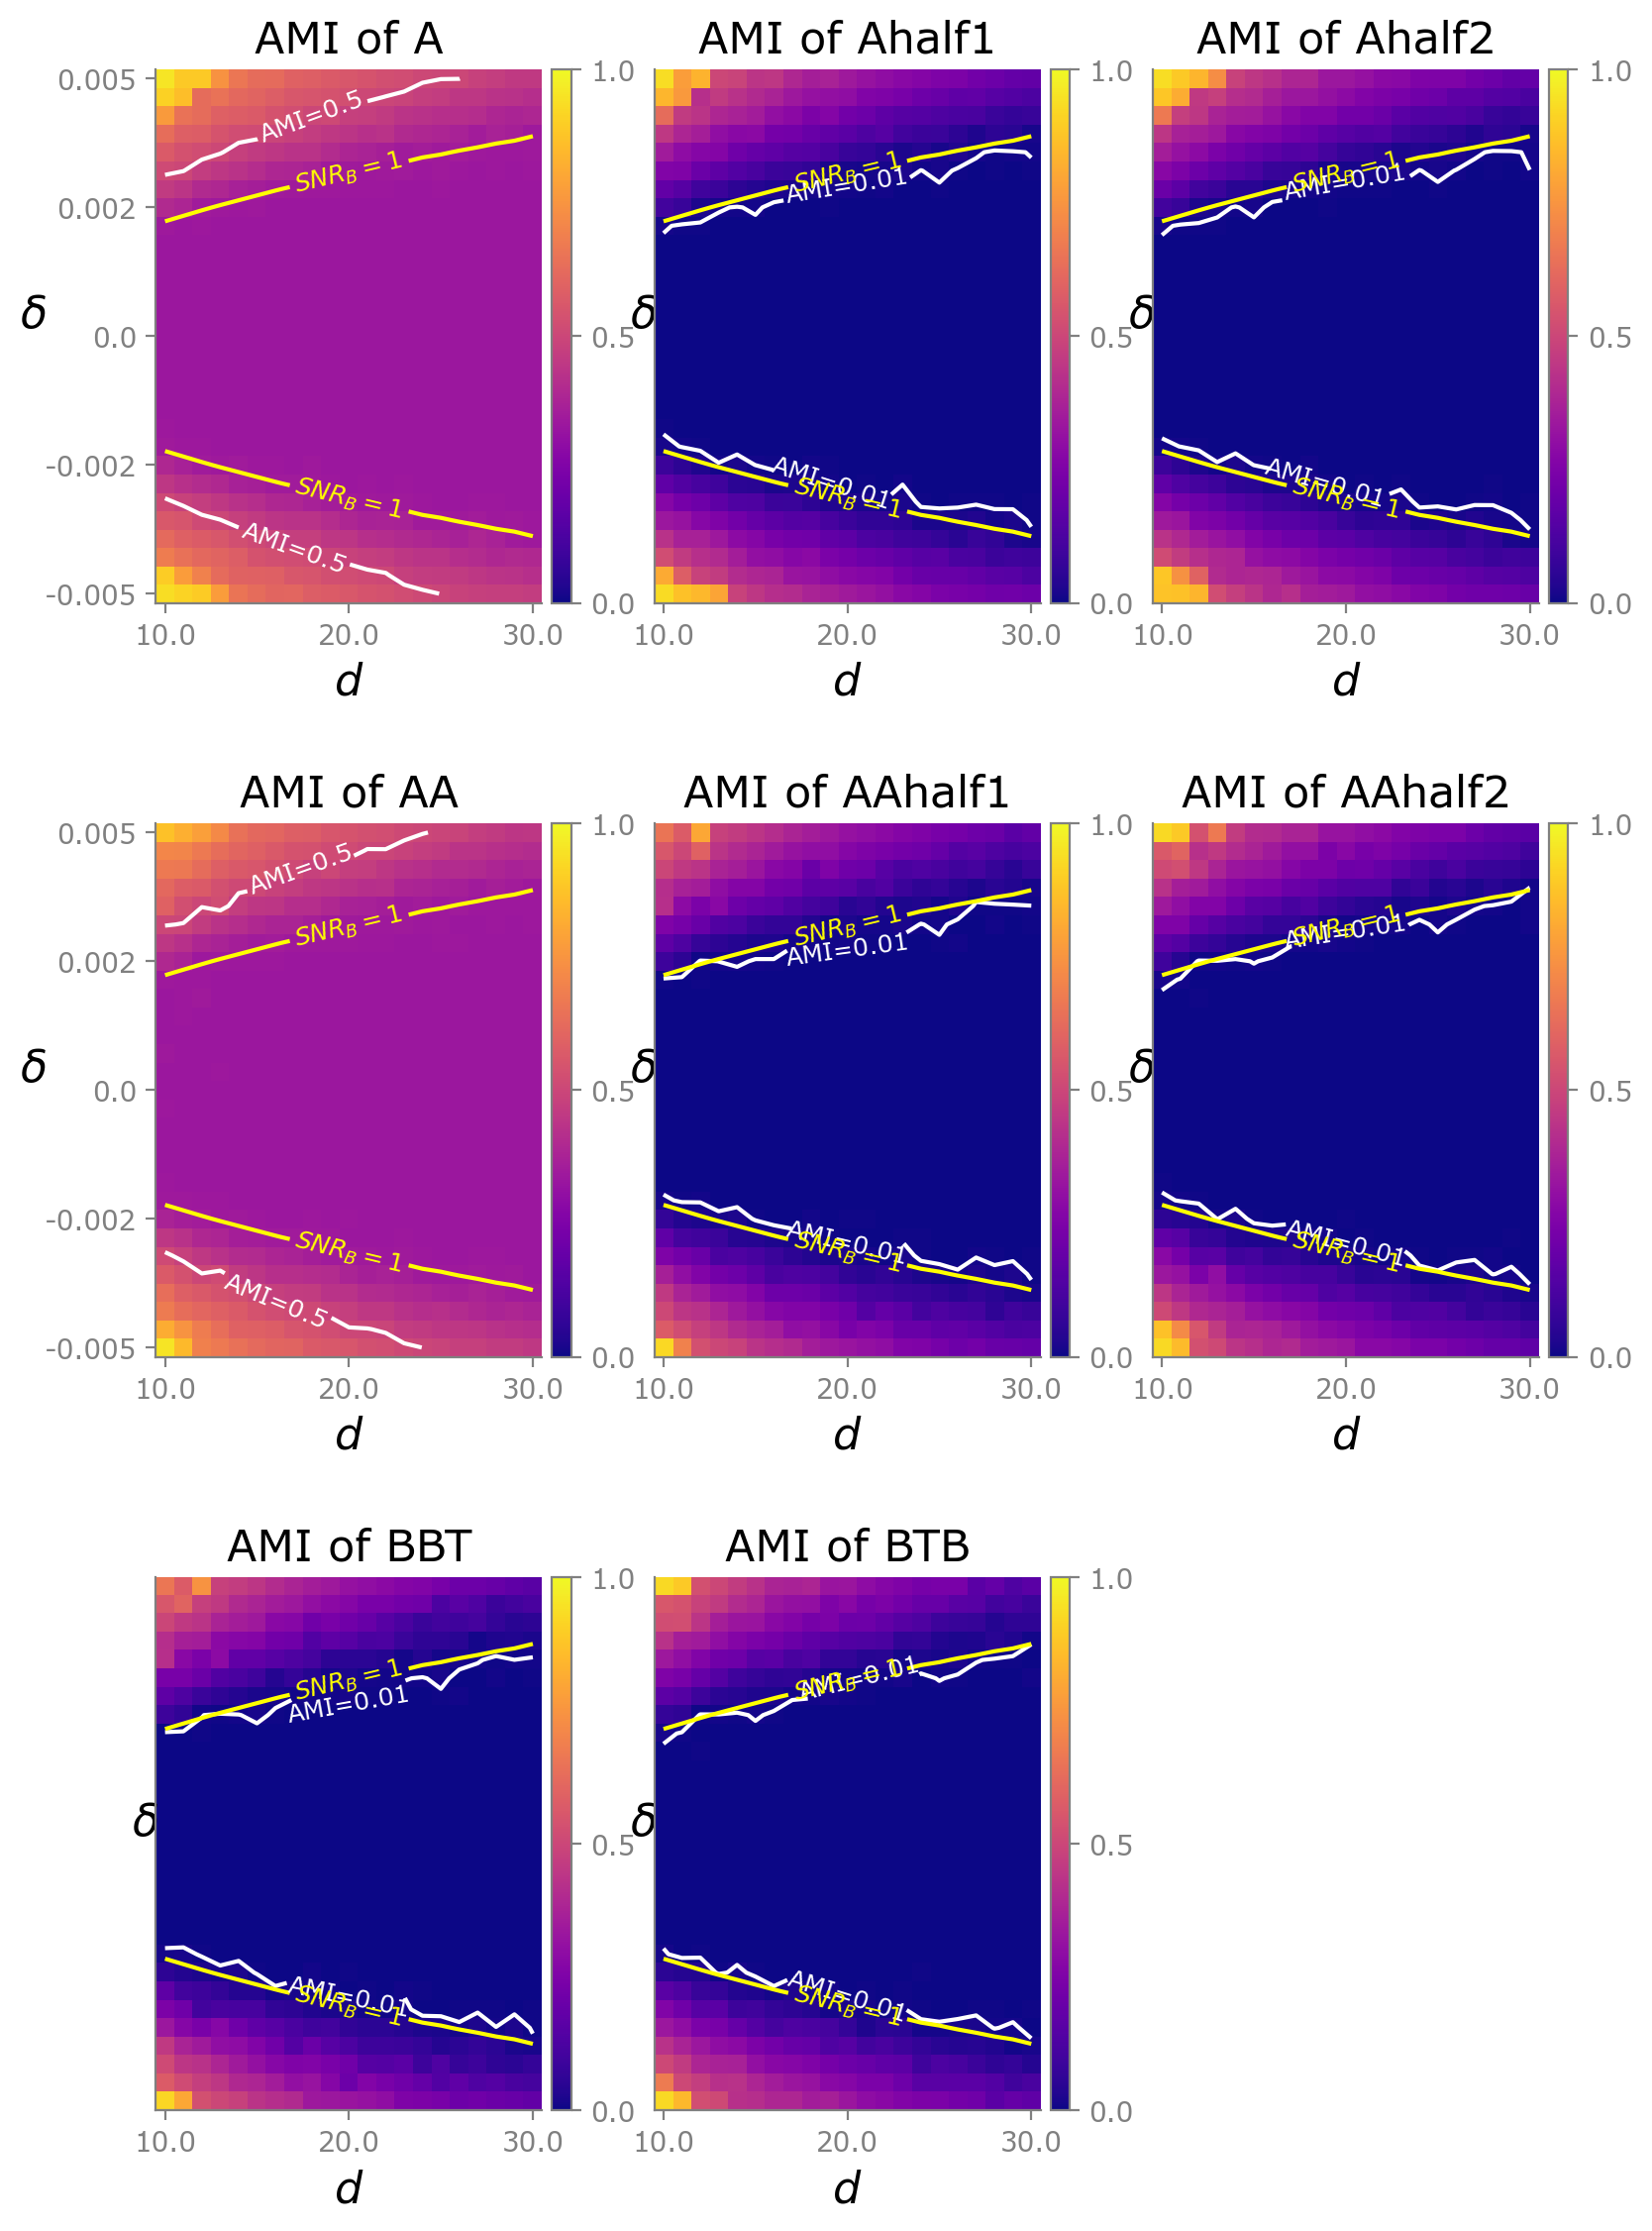

In [6]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(9.2, 14))
widths = [3, 3, 3]
heights = [3, 3, 3]
spec5 = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=A_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=0.5, ami_label="A", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=True)

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=Ahalf1_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="Ahalf1", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)


row = 0
col = 2
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=Ahalf2_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="Ahalf2", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)


row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=AA_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_label="AA", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=True)

row = 1
col = 1
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=AAhalf1_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="AAhalf1", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)

row = 1
col = 2
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=AAhalf2_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="AAhalf2", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)


row = 2
col = 0
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=BBT_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="BBT", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)

row = 2
col = 1
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=BTB_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="BTB", add_contour_label=r'$SNR_B=1$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)

# plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Bipartite/" + "FigureBipartiteAMISNR_" + f'n1_{n1}_n2_{n2}_k1_{k1}_k2_{k2}' + ".png"
# # # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_inches='tight')

# Asymmetric Htype=3 (k1=3,k2=6)

In [3]:
# For big n
n1 = 3000
n2 = 6000
k1 = 3
k2 = 6
WithlambdaB = True
Htype=3
fileID = 'amiExp24.4.26' + f'_n1={n1}n2={n2}_k1={k1}k2={k2}Htype={Htype}_{"lambda" if WithlambdaB else ""}_asymmetric_givenNumgroups'
load_path = "./result/detectabilityBipartite/" + fileID + ".txt"
plot_ds, plot_deltas, results, lambdas = read_exp(load_path=load_path, WithlambdaB=WithlambdaB, num_result=16)
A_ami, A_num_group, Ahalf1_ami, Ahalf1_num_group, Ahalf2_ami, Ahalf2_num_group, AA_ami, AA_num_group, AAhalf1_ami, AAhalf1_num_group, AAhalf2_ami, AAhalf2_num_group, BBT_ami, BBT_num_group, BTB_ami, BTB_num_group = \
results[0], results[1], results[2], results[3],results[4],results[5],results[6],results[7],results[8],results[9],results[10],results[11],results[12],results[13], results[14], results[15]

In [14]:
n1 = 3000
n2 = 6000
k1 = 3
k2 = 6
delta = -0.003
d = 10
bsbm = generate_bsbm(n1, n2, k1, k2, d, delta, Htype=3)
ami_2part = adjusted_mutual_info_score(bsbm.groupId, np.array(([0] * n1 + [1] * n2)))
print(ami_2part)
ami_2part = round(ami_2part, 2)

--For asymmetric case k1=3 k2=6, d=10, Range of delta (-0.00375, 0.0075). Now delta=-0.003 which make p_diagonal_B=0.0005, p_offdiagonal_B=0.0035
0.449066909321002


min A ami=0.29085 max A ami=0.7988
min Ahalf1 ami=1.0842021724855045e-20 max Ahalf1 ami=1.0
min Ahalf2 ami=1.9999999999999944e-06 max Ahalf2 ami=0.6499839999999999
min AA ami=0.295926 max AA ami=0.79177
min AAhalf1 ami=0.0 max AAhalf1 ami=1.0
min AAhalf2 ami=5.999999999999994e-06 max AAhalf2 ami=0.613484
min BBT ami=6.000000000000002e-06 max BBT ami=1.0
min BTB ami=7.999999999999996e-06 max BTB ami=0.6161199999999999


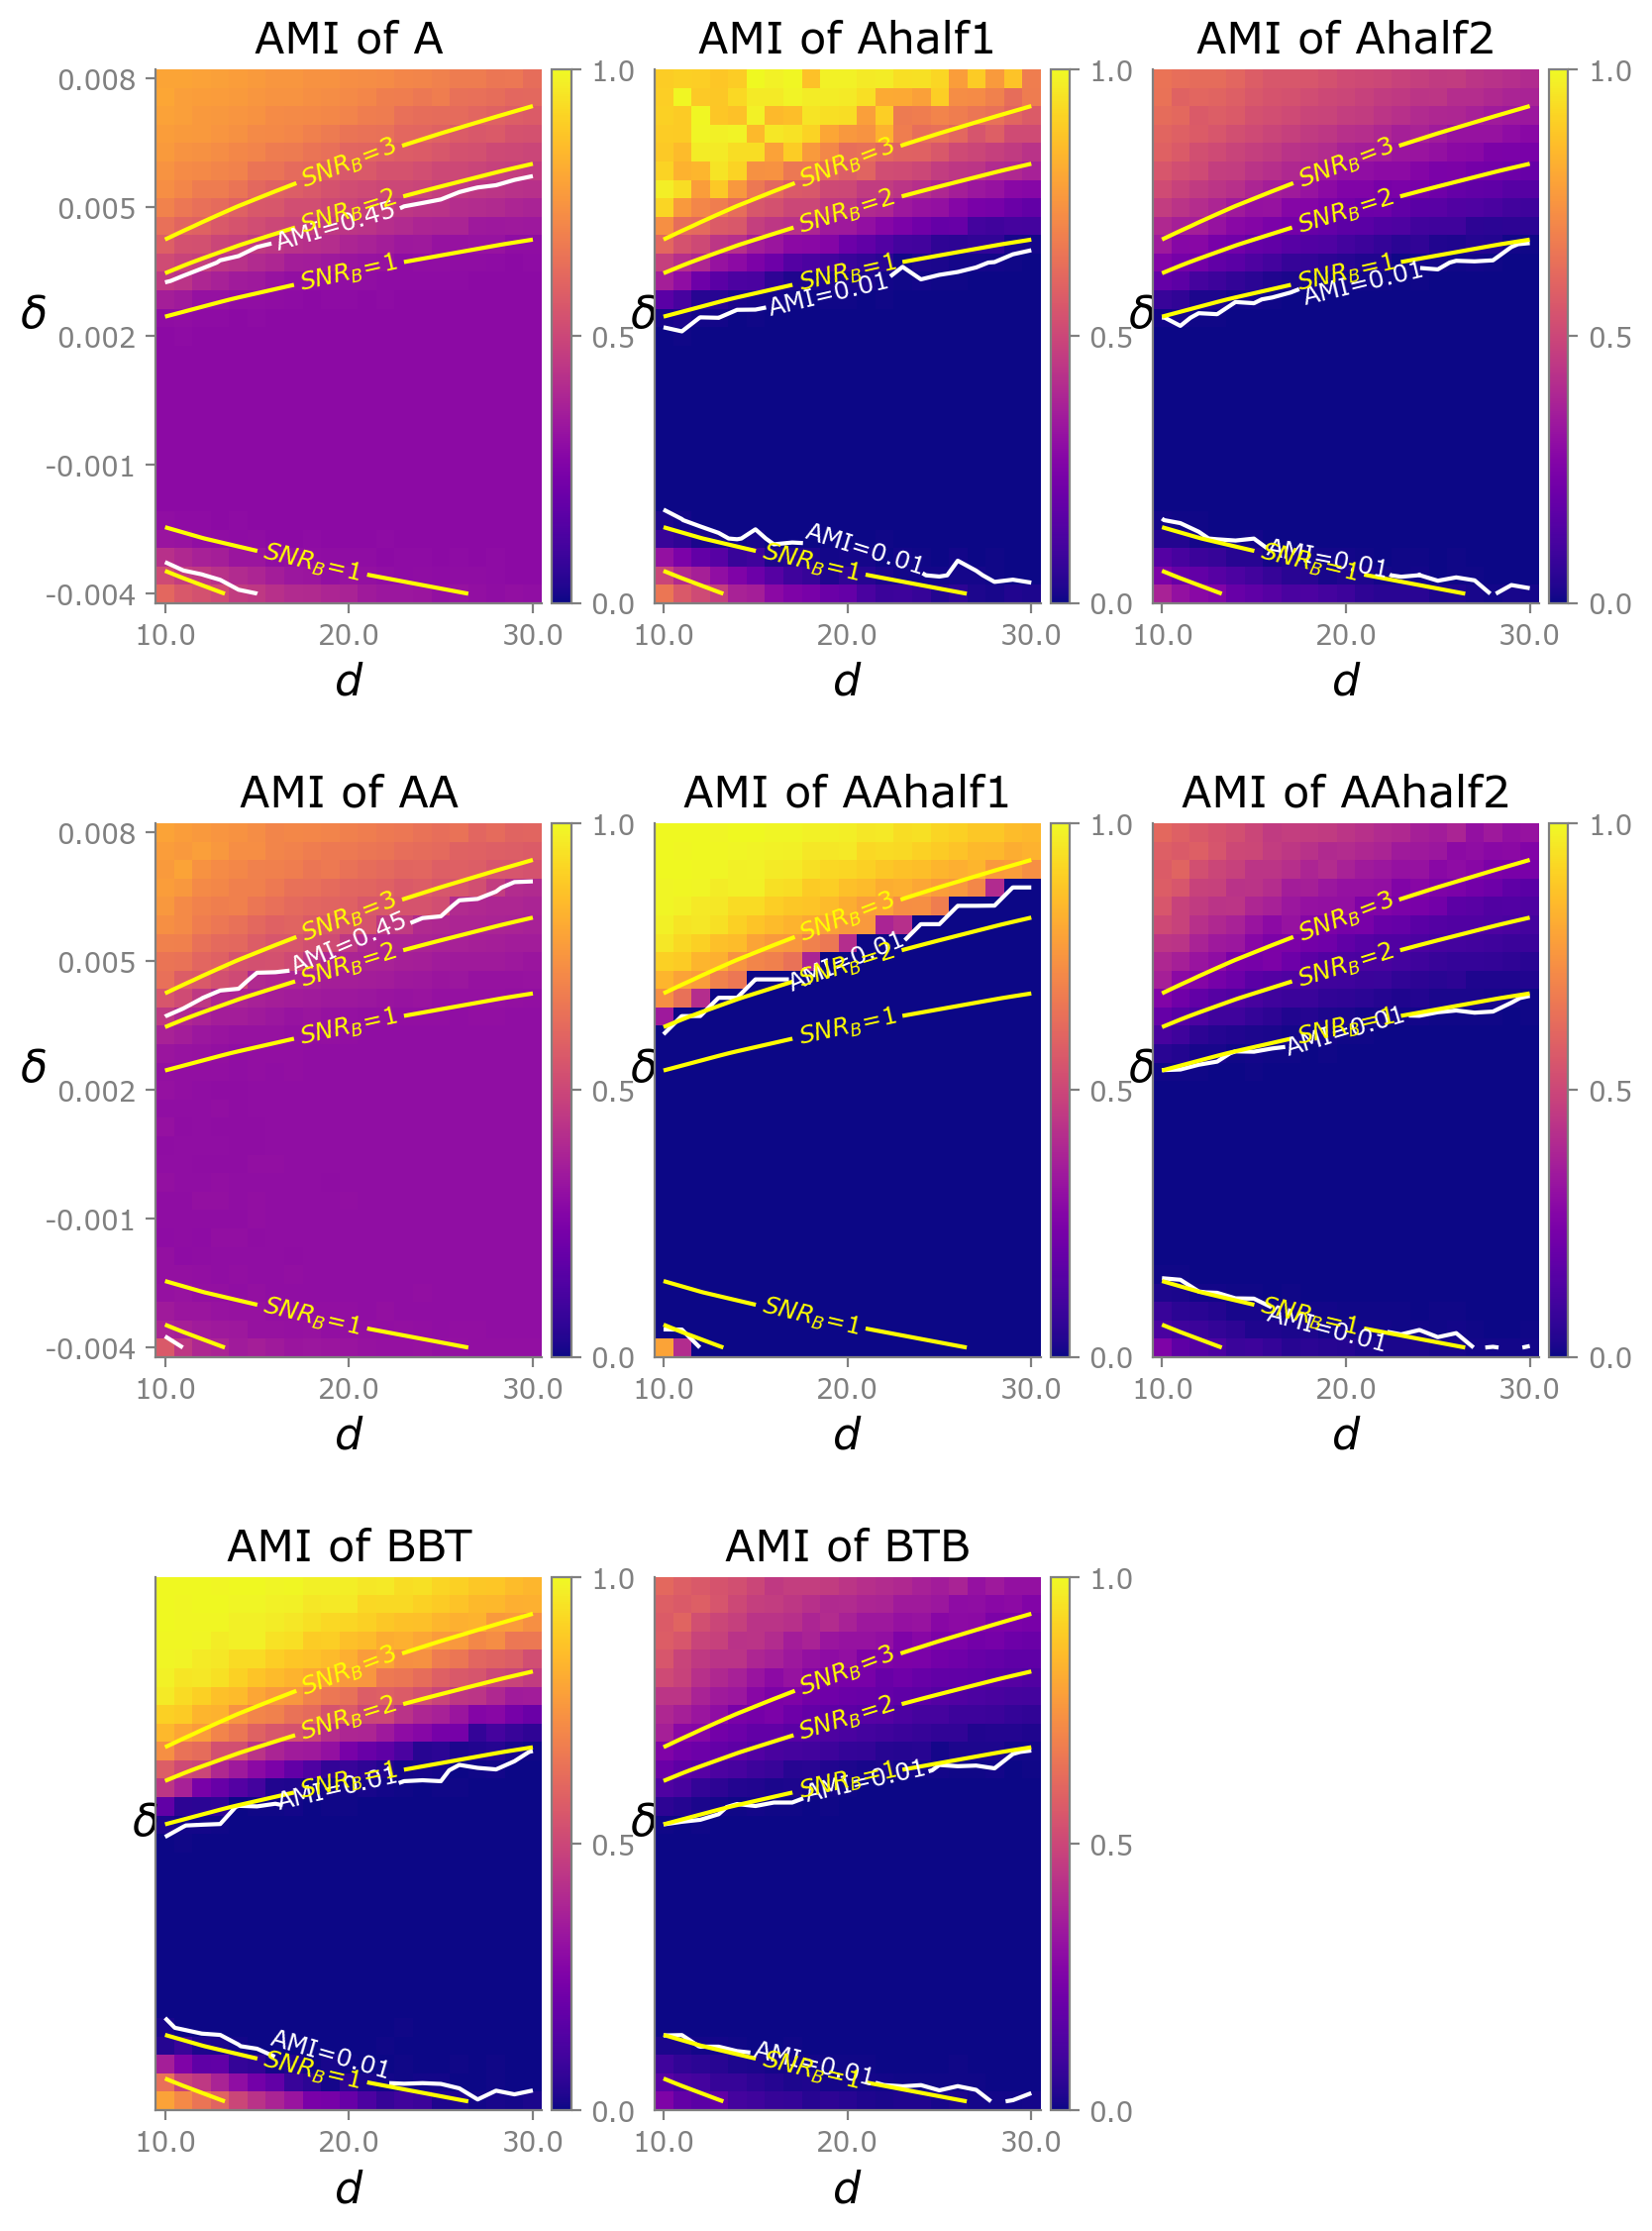

In [15]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(9.2, 14))
widths = [3, 3, 3]
heights = [3, 3, 3]
spec5 = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=A_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=ami_2part, ami_label="A", add_contour_label=r'$SNR_B$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=True)

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=Ahalf1_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="Ahalf1", add_contour_label=r'$SNR_B$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)


row = 0
col = 2
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=Ahalf2_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="Ahalf2", add_contour_label=r'$SNR_B$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)


row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=AA_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=ami_2part, ami_label="AA", add_contour_label=r'$SNR_B$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=True)

row = 1
col = 1
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=AAhalf1_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="AAhalf1", add_contour_label=r'$SNR_B$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)

row = 1
col = 2
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=AAhalf2_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="AAhalf2", add_contour_label=r'$SNR_B$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)


row = 2
col = 0
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=BBT_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="BBT", add_contour_label=r'$SNR_B$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)

row = 2
col = 1
ax = fig.add_subplot(spec5[row, col])
ami_contour(fig, ax, plot_x=plot_ds, plot_y=plot_deltas, ami=BTB_ami, addition_contour=n1 / k1 * lambdas[:, 1]**2 / lambdas[:, 0]
            , ami_contour_value=1e-2, ami_label="BTB", add_contour_label=r'$SNR_B$', xlabel=r'$d$', ylabel=r'$\delta$', set_yticks=False)

# plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Bipartite/" + "FigureBipartiteAMISNR_" + f'n1_{n1}_n2_{n2}_k1_{k1}_k2_{k2}' + ".png"
# # # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_inches='tight')

In [17]:
n1 = 3000
n2 = 6000
k1 = 3
k2 = 6
delta = -0.003
d = 10
bsbm = generate_bsbm(n1, n2, k1, k2, d, delta, Htype=3)

--For asymmetric case k1=3 k2=6, d=10, Range of delta (-0.00375, 0.0075). Now delta=-0.003 which make p_diagonal_B=0.0005, p_offdiagonal_B=0.0035


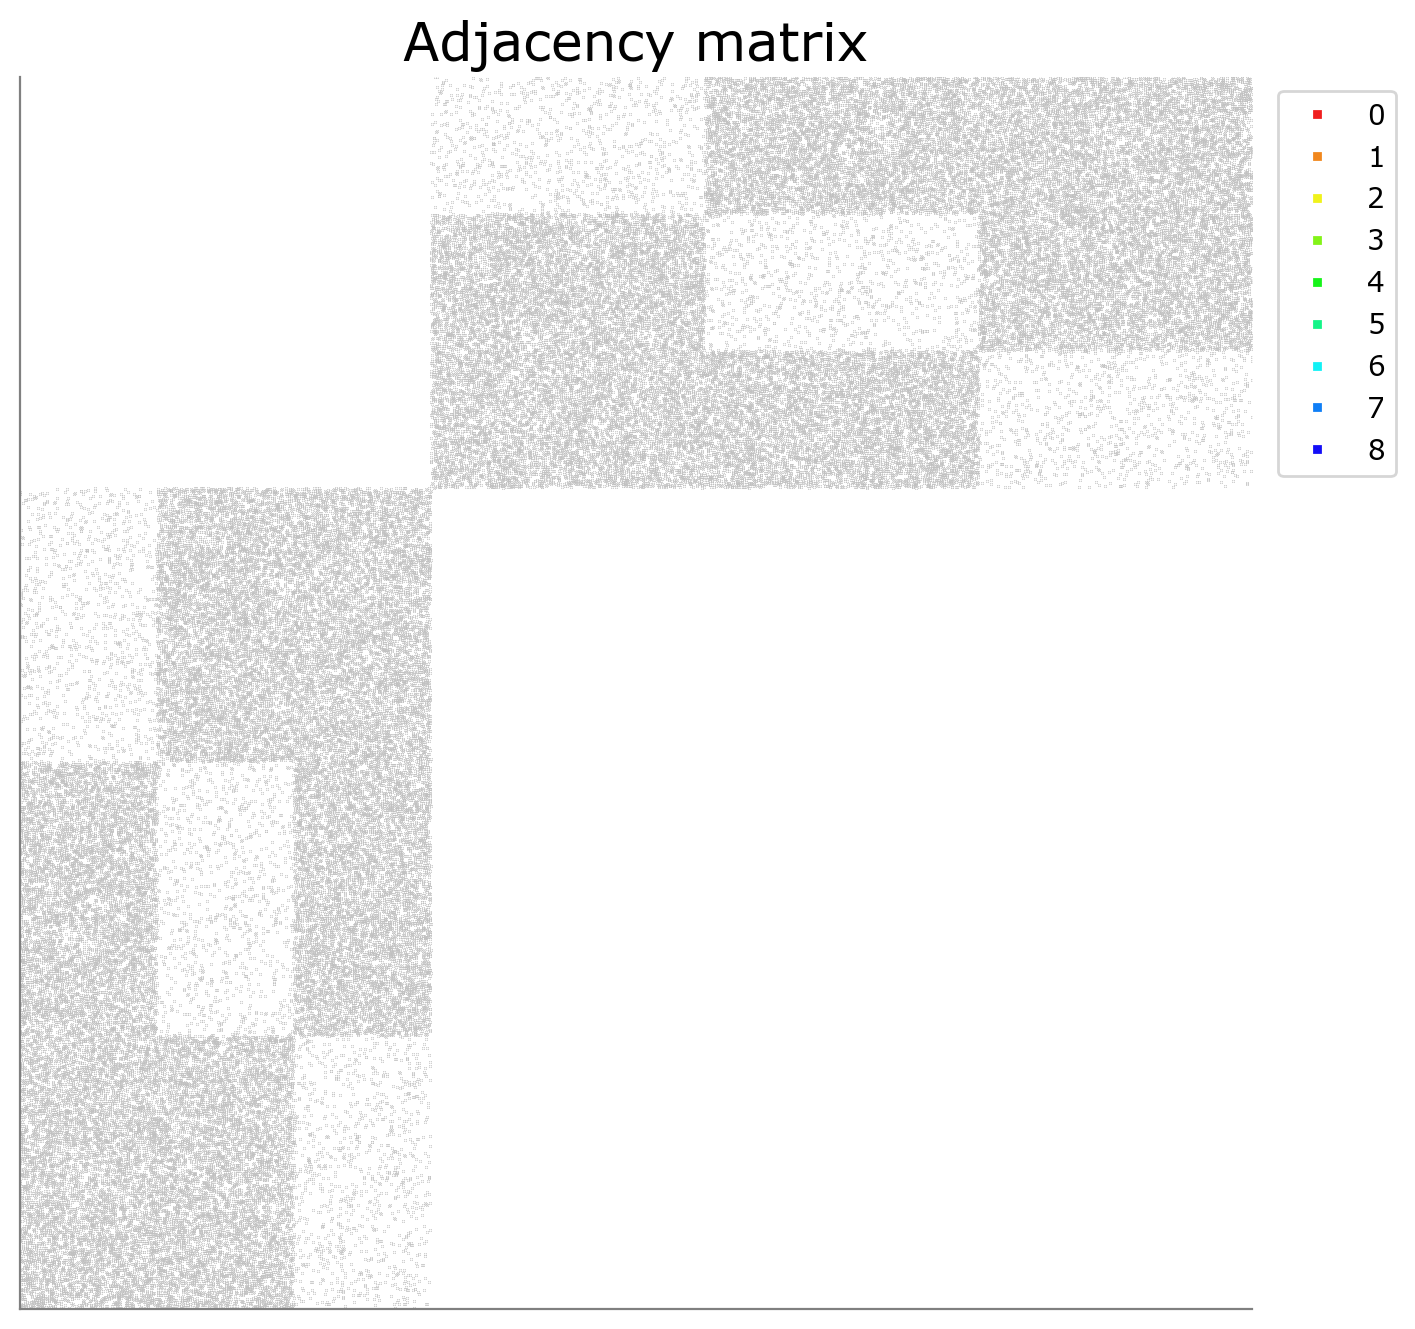

In [18]:
fig = plt.figure(figsize=(8, 8))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
# print(A.sum())
color = gen_colors(start=colors_red[0], end=colors_blue[0], n=len(bsbm.sizes))
plot_block_matrix(bsbm.A.toarray(), partition_names=list(range(len(bsbm.sizes))), partition_counts=bsbm.sizes, colors=color, ms=0.001)

In [19]:
start = time.time()
AA = bsbm.A.dot(bsbm.A)
BTB = AA[n1:, n1:]
BTB_BHpartition, BTB_BHnumgroups = CommunityDetect(BTB).BetheHessian(num_groups=bsbm.k2, weighted=True)
ami = adjusted_mutual_info_score(bsbm.groupId[n1:], BTB_BHpartition)
true_numberpartition = bsbm.k2
node_partition = BTB_BHpartition
node_numberpartition = np.size(np.unique(node_partition))
BTBcm, _ = get_confusionmatrix(bsbm.groupId[n1:], node_partition, true_numberpartition, node_numberpartition)
print(f"BH result in BTB: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(BTBcm)}) is: \n{BTBcm}")

r=10.875047892614848, Weighted BH build.
r=-10.875047892614848, Weighted BH build.
True index is [0 1 2 3 4 5], Community detected index is [5 4 1 3 2 0]
BH result in BTB: 0.06216396416405931. Time=83.45680594444275. Confusion Matrix((6, 6)) is: 
[[142. 387.  64. 142. 128. 137.]
 [141. 399.  63. 159. 114. 124.]
 [ 87. 138. 393. 270.  71.  41.]
 [ 82. 166. 348. 293.  74.  37.]
 [ 50. 311. 197.  87. 205. 150.]
 [ 59. 289. 191.  87. 190. 184.]]


In [20]:
start = time.time()
AA = bsbm.A.dot(bsbm.A)
BBT = AA[:n1, :n1]
BBT_BHpartition, BBT_BHnumgroups = CommunityDetect(BBT).BetheHessian(num_groups=bsbm.k1, weighted=True)
ami = adjusted_mutual_info_score(bsbm.groupId[:n1], BBT_BHpartition)
true_numberpartition = bsbm.k1
node_partition = BBT_BHpartition
node_numberpartition = np.size(np.unique(node_partition))
BBTcm, _ = get_confusionmatrix(bsbm.groupId[:n1], node_partition, true_numberpartition, node_numberpartition)
print(f"BH result in BBT: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(BBTcm)}) is: \n{BBTcm}")

r=11.193807812059903, Weighted BH build.
r=-11.193807812059903, Weighted BH build.
True index is [0 1 2], Community detected index is [1 2 0]
BH result in BBT: 0.36749750572905404. Time=15.412298440933228. Confusion Matrix((3, 3)) is: 
[[759. 151.  90.]
 [ 73. 797. 130.]
 [137. 112. 751.]]


In [21]:
lambdas = bsbm.getSingulars()
print(lambdas)
print(f'SNR={n1/k1 * lambdas[1]**2/lambdas[0]}')
print(f'l_3^2/l_1={n1/k1 *lambdas[2]**2/lambdas[0]}')

[0.0106066  0.00424264 0.00424264]
SNR=1.6970562748477145
l_3^2/l_1=1.6970562748477134


# Spectral of WBH

In [5]:
n1= n2 = 300
k1 = k2 = 3
d = 5
Htype = 0
min_delta, max_delta = generate_delta_range(n1, n2, k1, k2, d, Htype)
print(min_delta, max_delta)
delta = 0.04
bsbm = generate_bsbm(n1, n2, k1, k2, d, delta, Htype=0)
lambdas = bsbm.getSingulars()
print(f"SNR_H={n1/k1*lambdas[1]**2 / lambdas[0]}")

-0.025 0.05
--For symmetric case n1=300, k1=3, d=5, Range of delta (-0.025, 0.05). Now delta=0.04 which make p_diagonal_B=0.043333333333333335, p_offdiagonal_B=0.0033333333333333322
SNR_H=3.2000000000000024


D:\BackProgram\Anaconda\envs\network\Lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


([], [])

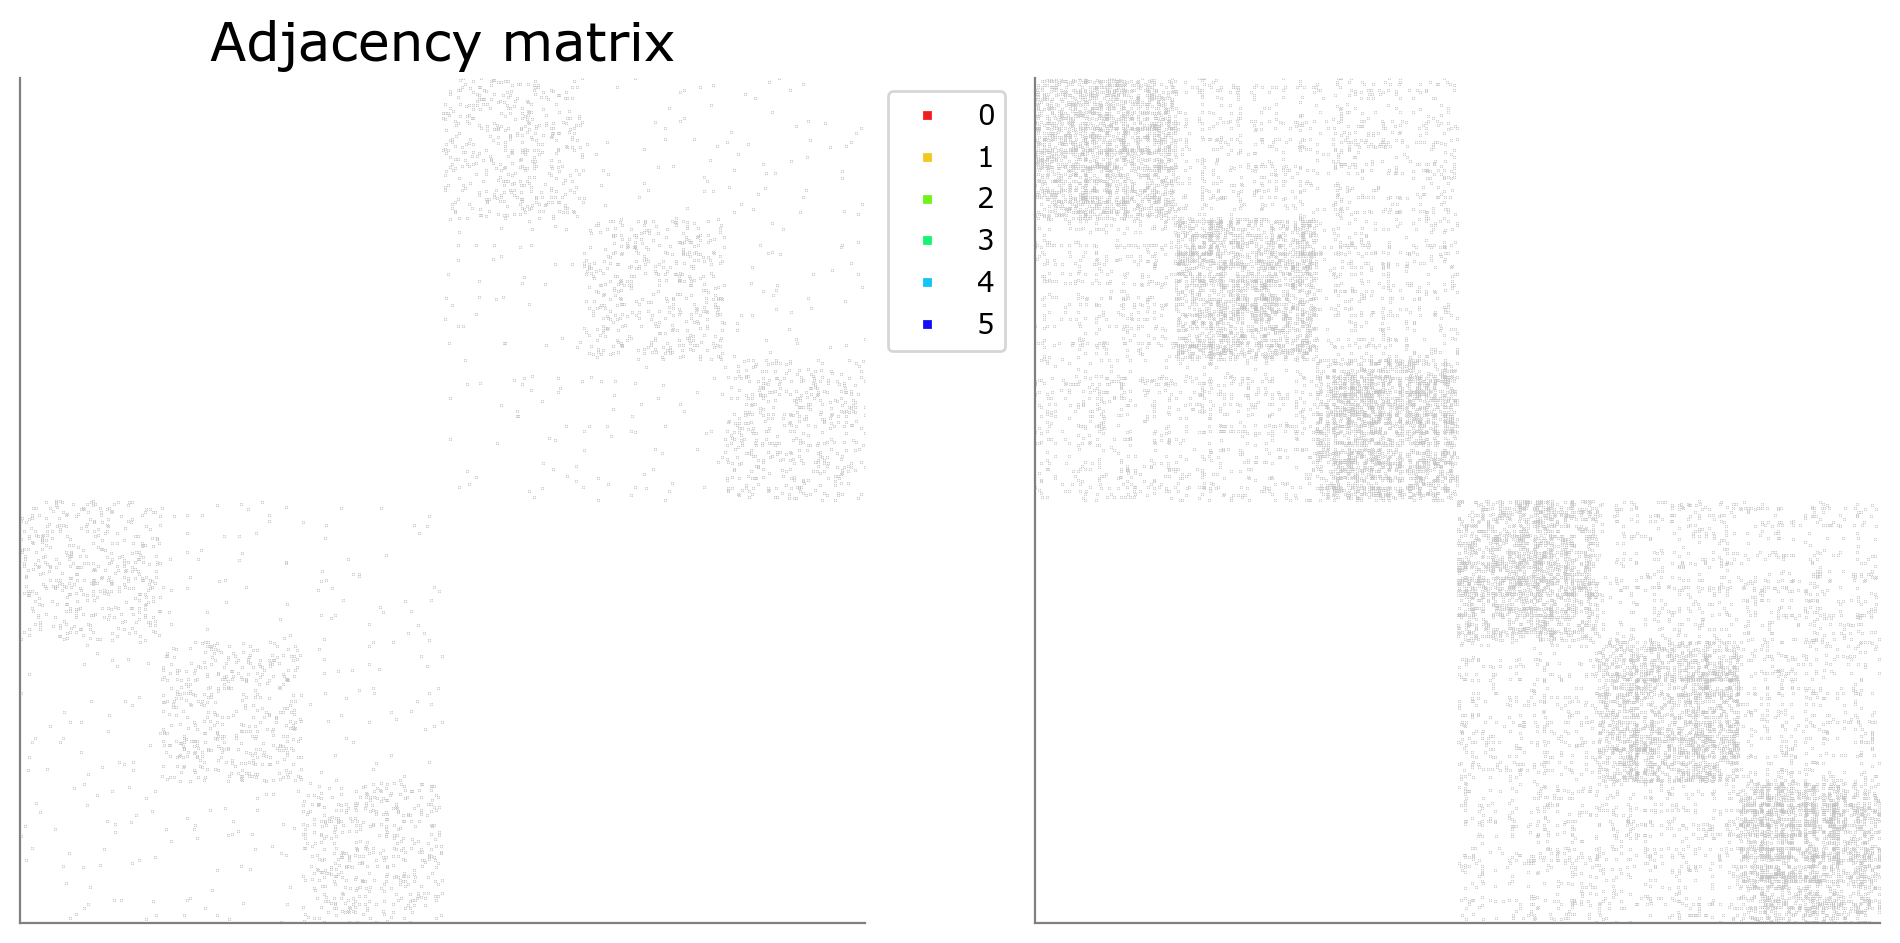

In [6]:
fig = plt.figure(figsize=(12, 6))
widths = [4, 4]
heights = [4]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
# print(A.sum())
color = gen_colors(start=colors_red[0], end=colors_blue[0], n=len(bsbm.sizes))
plot_block_matrix(bsbm.A.toarray(), partition_names=list(range(len(bsbm.sizes))), partition_counts=bsbm.sizes, colors=color, ms=0.01)

AA = bsbm.A.dot(bsbm.A)
AA = AA - diags(np.diag(AA.toarray()), 0)
x, y = np.nonzero(AA.toarray())
plotAA = np.zeros(np.shape(AA))
for _x, _y in zip(x, y):
    plotAA[_x, _y] = 1
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
plt.spy(plotAA, markersize=1e-7, rasterized=True, color=gray)
plt.xticks([])
plt.yticks([])

In [3]:
def scatter_spectral(eigvalue, fig=None, ax=None, title='Spectrum'):
    # Construct scatter coordinate
    x = []
    y = []
    for _w in eigvalue:
        _x = _w.real if isinstance(_w, complex) else _w
        _y = _w.imag if isinstance(_w, complex) else 0
        x.append(_x)
        y.append(_y)
    if fig is None and ax is None:
        fig = plt.figure(figsize=(8, 8))
        widths = [4]
        heights = [4]
        spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
        row = 0
        col = 0
        ax = fig.add_subplot(spec5[row, col])
    plt.axis('equal')
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data', 0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data', 0))
    ax.scatter(x, y, s=6)
    ax.set_title(title)

In [8]:
def plot_spectral_NBBH(sbm, d):
#     print(f'SNR={sbm.get_SNR()}, d={d}')
    AA = bsbm.A.dot(bsbm.A)
    AA = AA - diags(np.diag(AA.toarray()), 0)
    BBT = AA[:n1, :n1]
    BBT = BBT.tanh()
    R = np.sqrt((BBT**2).sum() / BBT.shape[0])
    NB = sbm.get_projection_operator(projection_matrix=BBT, operator='WNB')
    print(np.shape(NB), NB.sum())
    eig_B, _ = eig(NB.toarray())
    info_eig = []
    for e in eig_B:
        if abs(e) > d and e.imag == 0:
            info_eig.append(e)
    print(info_eig)
    fig = plt.figure(figsize=(8, 4))
    widths = [5]
    heights = [5]
    spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
    row = 0
    col = 0
    ax = fig.add_subplot(spec5[row, col])
    
    scatter_spectral(eig_B, fig=fig, ax=ax, title="Spectrum of NB")
    ax.add_patch(Circle(xy = (0.0, 0.0), radius=R, alpha=0.2))
    
    bh_samples = 40
    c = gen_colors(start=colors_red[0], end=colors_green[0], n=bh_samples)
    i = 0
    eig_BHs = dict()
    for r in np.linspace(R, max(info_eig).real+1, bh_samples):
        BH = sbm.get_projection_operator(projection_matrix=BBT, operator='WBH', r=r)
        eig_BH, _ = eig(BH.toarray())
        eig_BHs[r] = eig_BH
        x = []
        y = []
        for _w in eig_BH:
            _y = _w.real if isinstance(_w, complex) else _w
            x.append(r)
            y.append(_y)
        ax.scatter(x, y, s=1, c=c[i])
        i += 1
    ax.set_ylim(-np.sqrt(d), 2 * np.sqrt(d))
    x1, x2, y1, y2 = R, 10, -0.6, 0.05  # subregion of the original image
    axins = ax.inset_axes(
        [0.5, 0.6, 0.47, 0.37],
        xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
    sub_points_x = []
    sub_points_y = []
    sub_points_c = []
    sub_points_s = []
    i = 0
    for r in eig_BHs.keys():
        if x1 < r < x2:
            for e in eig_BHs[r]:
                if y1 < e < y2:
                    sub_points_x.append(r)
                    sub_points_y.append(e)
                    sub_points_c.append(c[i])
                    sub_points_s.append(1)
        i += 1
    for _w in eig_B:
        _x = _w.real if isinstance(_w, complex) else _w
        _y = _w.imag if isinstance(_w, complex) else 0
        if x1 < _x < x2 and y1 < _y < y2:
            sub_points_x.append(_x)
            sub_points_y.append(_y)
            sub_points_c.append('blue')
            sub_points_s.append(6)
    axins.scatter(sub_points_x, sub_points_y, s=sub_points_s, c=sub_points_c)
    axins.axhline(0, color='grey', lw=1, ls=':')
    ax.indicate_inset_zoom(axins, edgecolor="black")

(7394, 7394) 225551.0
[(31.04994769513612+0j), (22.2505591418909+0j), (19.118902043699496+0j), (10.39910403771122+0j), (9.610070369048373+0j), (9.410275498992434+0j), (8.499432114522703+0j), (8.291678580655542+0j), (7.424090076631579+0j), (7.231637324557703+0j)]


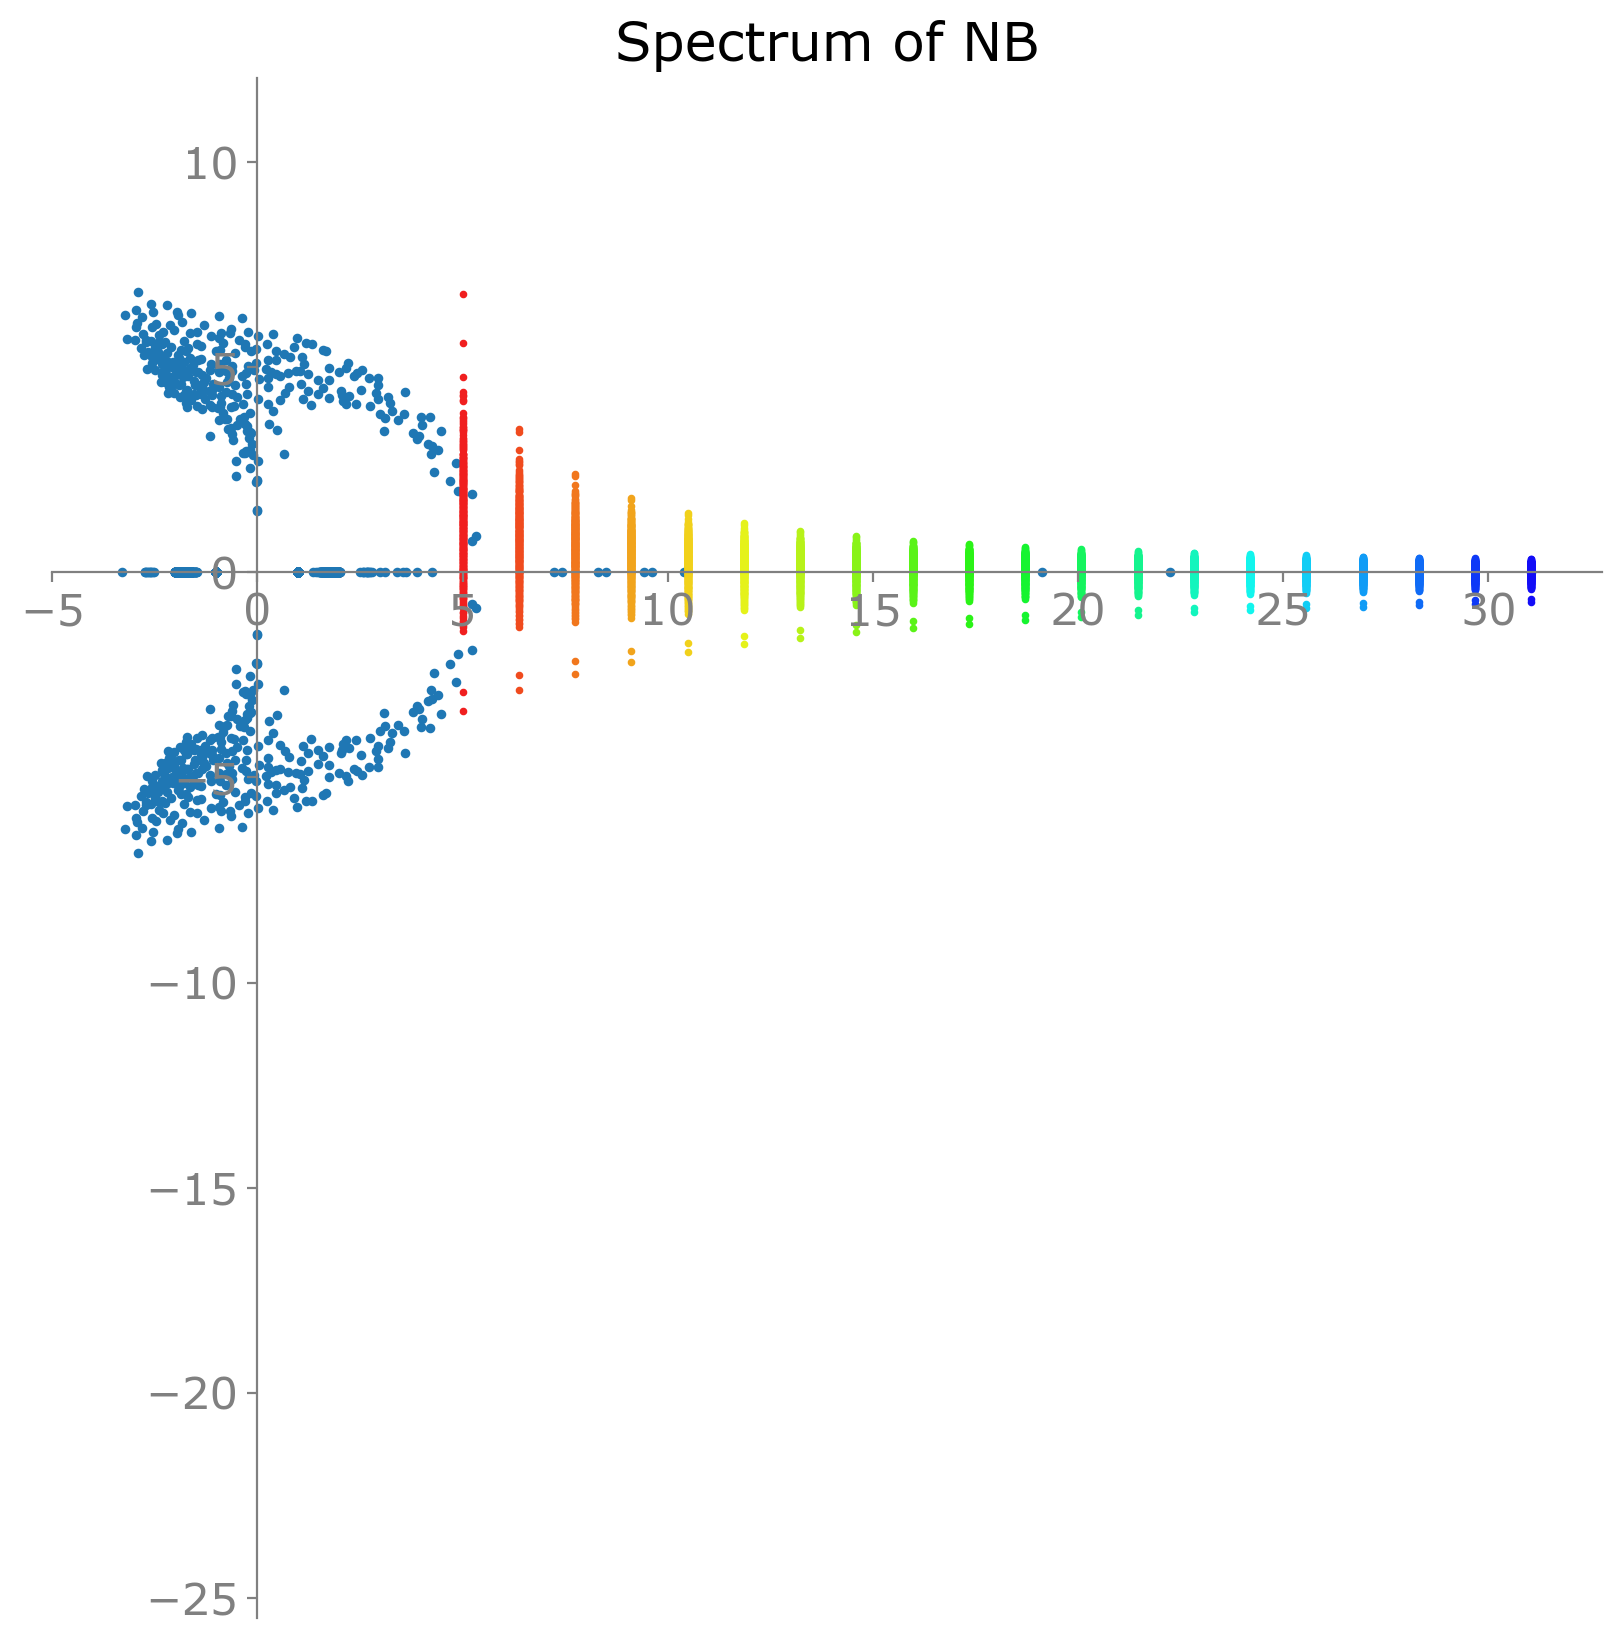

In [53]:
plot_spectral_NBBH(bsbm, d)  # Original onemode projection weight

(7242, 7242) 155261.88577126176
[(21.646862549240034+0j), (15.08218875124965+0j), (12.217382074567247+0j), (7.872593599695951+0j), (7.4070650944801235+0j), (6.570907424394411+0j), (6.381428452351309+0j), (5.942470218705265+0j), (5.161544779507439+0j)]


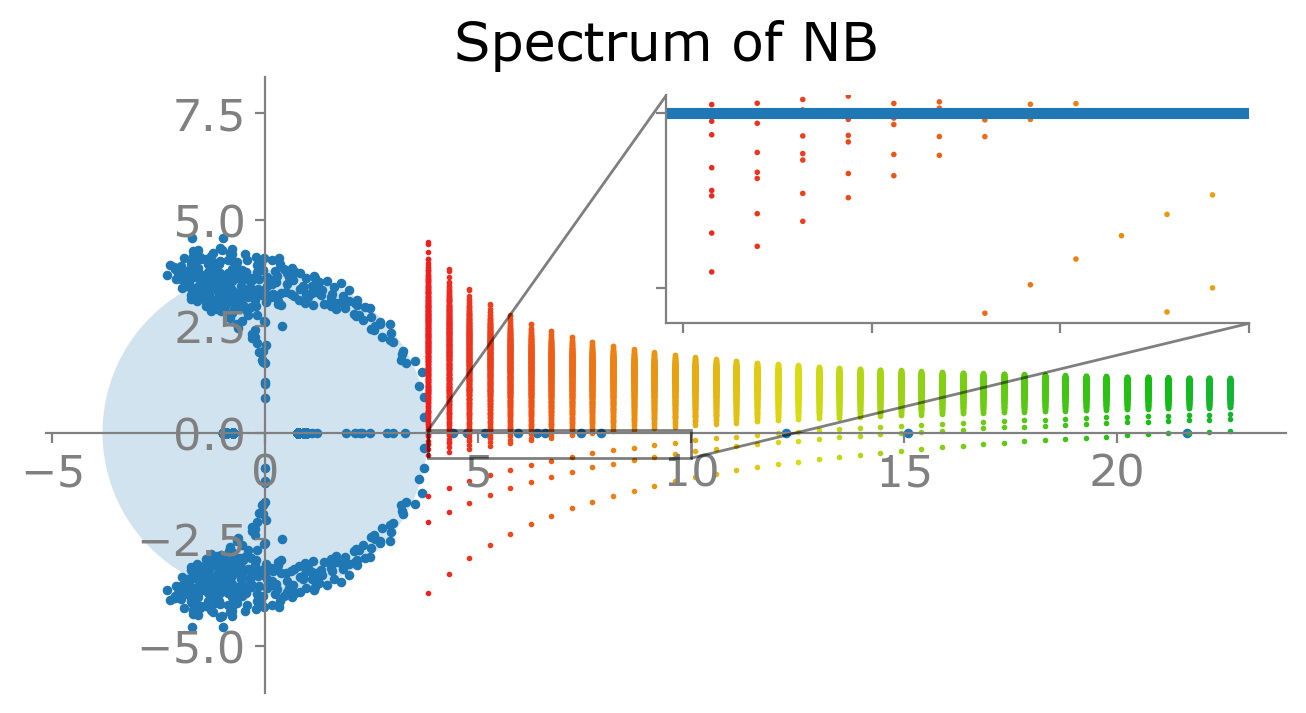

In [27]:
# Correct Bug in BetheHessian: D + identity(n1) not D + ones(n1)
plot_spectral_NBBH(bsbm, d)  # tanh() onemode projection weight

In [7]:
BBT = AA[:n1, :n1]
BBT_d = np.sqrt((BBT.tanh()).sum() / BBT.shape[0])
BBT_r = np.sqrt(((BBT.tanh())**2).sum() / BBT.shape[0])
print(f'BBT_d={BBT_d}, BBT_r={BBT_r}')
# plot_spectral_NBBH(bsbm, d=BBT_d)  # tanh() onemode projection weight

BBT_d=4.3891384450613575, BBT_r=3.8757553705622896


(7242, 7242) 155261.88577126176
[(21.646862549240034+0j), (15.08218875124965+0j), (12.217382074567247+0j), (7.872593599695951+0j), (7.4070650944801235+0j), (6.570907424394411+0j), (6.381428452351309+0j), (5.942470218705265+0j), (5.161544779507439+0j), (4.727041571362891+0j), (4.402990837730794+0j)]


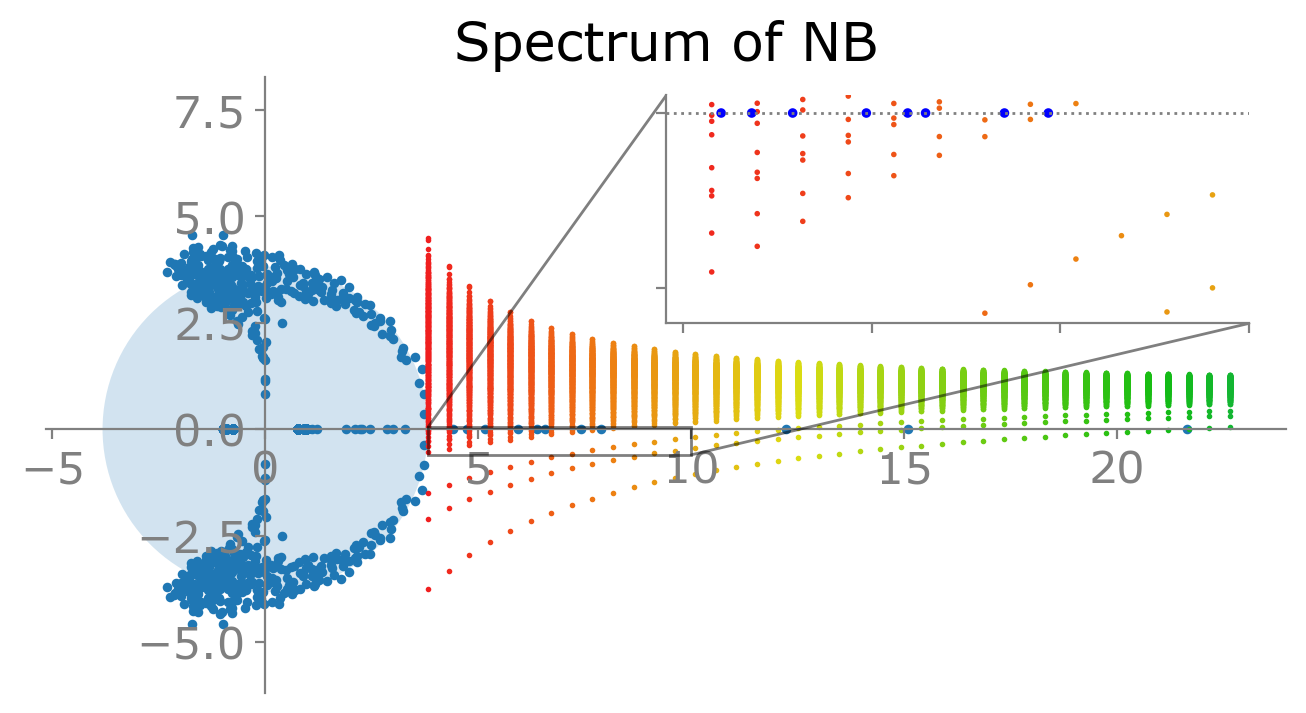

In [31]:
# Correct Bug in NB: B_{i, j} = w_i\delta_{i[1], j[0]}(1-\delta_{i[0], j[1]}), not w_j
plot_spectral_NBBH(bsbm, BBT_d)  # tanh() onemode projection weight
save_path = "./_Figure/Bipartite/" + "WNBWBHspectrum.pdf"
plt.savefig(save_path, dpi=600)

In [ ]:
plot_spectral_NBBH(bsbm, BBT)